In [1]:
import pandas as pd 
import numpy as np 
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
multi_act = pd.read_csv("ATUS DATA 03-19/atus_activity_0319.dat", 
                        dtype= {"TRCODEP": object, "TRTIER1P": object, "TRTIER2P": object}) #using 2003-2019 activity file
#multi_act

In [3]:
multi_act.columns  #CC = childcare, EC = elderly care

Index(['TUCASEID', 'TUACTIVITY_N', 'TUACTDUR24', 'TUCC5', 'TUCC5B',
       'TRTCCTOT_LN', 'TRTCC_LN', 'TRTCOC_LN', 'TUSTARTTIM', 'TUSTOPTIME',
       'TRCODEP', 'TRTIER1P', 'TRTIER2P', 'TUCC8', 'TUCUMDUR', 'TUCUMDUR24',
       'TUACTDUR', 'TR_03CC57', 'TRTO_LN', 'TRTONHH_LN', 'TRTOHH_LN',
       'TRTHH_LN', 'TRTNOHH_LN', 'TEWHERE', 'TUCC7', 'TRWBELIG', 'TRTEC_LN',
       'TUEC24', 'TUDURSTOP'],
      dtype='object')

In [4]:
multi_resp = pd.read_csv("ATUS DATA 03-19/atus_resp_0319.dat")
#multi_resp

In [5]:
#multi_resp.columns.to_list()

In [6]:
multi_merged = pd.merge(multi_act, multi_resp, on="TUCASEID")
multi_merged = multi_merged.filter(["TUCASEID","TUACTDUR24","TUCUMDUR","TRTIER1P","TRTIER2P","TRCODEP", 
                                    "TEWHERE","TELFS", "TUFNWGTP","TUSTARTTIM","TUSTOPTIME", "TUYEAR"])
#multi_merged

In [7]:
#TELFS = employment status 
multi_merged["TELFS"].unique()

array([2, 1, 4, 5, 3])

# Employed Population

In [8]:
employed_codes = [1,2] # 1= Employed - at work, 2 = Employed - absent
multi_merged_employed = multi_merged[multi_merged["TELFS"].isin(employed_codes)]
multi_merged_employed["TELFS"].unique()

array([2, 1])

# 2003-2019 Residential -Employed

In [9]:
#only residential location from 2003-2019
residential_location = [1,3]
atus_multi_yr_res_emp = multi_merged_employed[multi_merged_employed["TEWHERE"].isin(residential_location)]
#atus_multi_yr_res_employed

In [10]:
#atus residential year seperation by employed population 
atus_2003_res_emp = atus_multi_yr_res_emp[atus_multi_yr_res_emp["TUCASEID"].apply(str).str.startswith("2003")]
atus_2004_res_emp = atus_multi_yr_res_emp[atus_multi_yr_res_emp["TUCASEID"].apply(str).str.startswith("2004")]
atus_2005_res_emp = atus_multi_yr_res_emp[atus_multi_yr_res_emp["TUCASEID"].apply(str).str.startswith("2005")]
atus_2006_res_emp = atus_multi_yr_res_emp[atus_multi_yr_res_emp["TUCASEID"].apply(str).str.startswith("2006")]
atus_2007_res_emp = atus_multi_yr_res_emp[atus_multi_yr_res_emp["TUCASEID"].apply(str).str.startswith("2007")]
atus_2008_res_emp = atus_multi_yr_res_emp[atus_multi_yr_res_emp["TUCASEID"].apply(str).str.startswith("2008")]
atus_2009_res_emp = atus_multi_yr_res_emp[atus_multi_yr_res_emp["TUCASEID"].apply(str).str.startswith("2009")]
atus_2010_res_emp = atus_multi_yr_res_emp[atus_multi_yr_res_emp["TUCASEID"].apply(str).str.startswith("2010")]
atus_2011_res_emp = atus_multi_yr_res_emp[atus_multi_yr_res_emp["TUCASEID"].apply(str).str.startswith("2011")]
atus_2012_res_emp = atus_multi_yr_res_emp[atus_multi_yr_res_emp["TUCASEID"].apply(str).str.startswith("2012")]
atus_2013_res_emp = atus_multi_yr_res_emp[atus_multi_yr_res_emp["TUCASEID"].apply(str).str.startswith("2013")]
atus_2014_res_emp = atus_multi_yr_res_emp[atus_multi_yr_res_emp["TUCASEID"].apply(str).str.startswith("2014")]
atus_2015_res_emp = atus_multi_yr_res_emp[atus_multi_yr_res_emp["TUCASEID"].apply(str).str.startswith("2015")]
atus_2016_res_emp = atus_multi_yr_res_emp[atus_multi_yr_res_emp["TUCASEID"].apply(str).str.startswith("2016")]
atus_2017_res_emp = atus_multi_yr_res_emp[atus_multi_yr_res_emp["TUCASEID"].apply(str).str.startswith("2017")]
atus_2018_res_emp = atus_multi_yr_res_emp[atus_multi_yr_res_emp["TUCASEID"].apply(str).str.startswith("2018")]
atus_2019_res_emp = atus_multi_yr_res_emp[atus_multi_yr_res_emp["TUCASEID"].apply(str).str.startswith("2019")]
#atus_2003_res_emp

In [11]:
#atus year seperation for all employed respondants
atus_2003 = multi_merged_employed[multi_merged_employed["TUCASEID"].apply(str).str.startswith("2003")]
atus_2004 = multi_merged_employed[multi_merged_employed["TUCASEID"].apply(str).str.startswith("2004")]
atus_2005 = multi_merged_employed[multi_merged_employed["TUCASEID"].apply(str).str.startswith("2005")]
atus_2006 = multi_merged_employed[multi_merged_employed["TUCASEID"].apply(str).str.startswith("2006")]
atus_2007 = multi_merged_employed[multi_merged_employed["TUCASEID"].apply(str).str.startswith("2007")]
atus_2008 = multi_merged_employed[multi_merged_employed["TUCASEID"].apply(str).str.startswith("2008")]
atus_2009 = multi_merged_employed[multi_merged_employed["TUCASEID"].apply(str).str.startswith("2009")]
atus_2010 = multi_merged_employed[multi_merged_employed["TUCASEID"].apply(str).str.startswith("2010")]
atus_2011 = multi_merged_employed[multi_merged_employed["TUCASEID"].apply(str).str.startswith("2011")]
atus_2012 = multi_merged_employed[multi_merged_employed["TUCASEID"].apply(str).str.startswith("2012")]
atus_2013 = multi_merged_employed[multi_merged_employed["TUCASEID"].apply(str).str.startswith("2013")]
atus_2014 = multi_merged_employed[multi_merged_employed["TUCASEID"].apply(str).str.startswith("2014")]
atus_2015 = multi_merged_employed[multi_merged_employed["TUCASEID"].apply(str).str.startswith("2015")]
atus_2016 = multi_merged_employed[multi_merged_employed["TUCASEID"].apply(str).str.startswith("2016")]
atus_2017 = multi_merged_employed[multi_merged_employed["TUCASEID"].apply(str).str.startswith("2017")]
atus_2018 = multi_merged_employed[multi_merged_employed["TUCASEID"].apply(str).str.startswith("2018")]
atus_2019 = multi_merged_employed[multi_merged_employed["TUCASEID"].apply(str).str.startswith("2019")]

In [12]:
#weight for all respondants in from 2003-2019 (by dropping duplicate respondent)
atus_2003_drop = atus_2003.drop_duplicates(subset=["TUCASEID"])
all_2003_weight = atus_2003_drop["TUFNWGTP"].sum()
all_2003_weight

53187186872.01529

In [13]:
#employed_codes = [1,2] # 1= Employed - at work, 2 = Employed - absent
#multi_merged_employed = multi_merged[multi_merged["TELFS"].isin(employed_codes)]
#residential_location = [1,3]
#atus_multi_yr_res_emp = multi_merged_employed[multi_merged_employed["TEWHERE"].isin(residential_location)]
#atus_2003_res_emp = atus_multi_yr_res_emp[atus_multi_yr_res_emp["TUCASEID"].apply(str).str.startswith("2003")]
#atus_2003 = multi_merged_employed[multi_merged_employed["TUCASEID"].apply(str).str.startswith("2003")]

## 2003-2019 Work, Main Job

### 2003 Work, Main Job

In [14]:
#050101 is Work, main job
atus_2003_res_work_emp = atus_2003_res_emp.loc[atus_2003_res_emp.TRCODEP == "050101"]
#atus_2003_res_work_emp

In [15]:
work = atus_2003_res_work_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#work

In [16]:
work_2003_res_emp_merge = pd.merge(work, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#work_2003_res_emp_merge

In [17]:
work_2003_res_emp_merge["Mutiplied Weighted"] = work_2003_res_emp_merge["TUACTDUR24"] * work_2003_res_emp_merge["TUFNWGTP"]
#work_2003_res_emp_merge

In [18]:
work_2003_res_emp_weight = work_2003_res_emp_merge["Mutiplied Weighted"].sum()
work_2003_res_emp_weight

991523271995.9087

In [19]:
#weight from all respondants in from 2003
atus_2003_drop = atus_2003.drop_duplicates(subset=["TUCASEID"])
all_2003_emp_weight = atus_2003_drop["TUFNWGTP"].sum()
all_2003_emp_weight

53187186872.01529

In [20]:
work_2003_res_emp_minutes_per_day = work_2003_res_emp_weight/all_2003_emp_weight
work_2003_res_emp_minutes_per_day

18.64214541712496

In [21]:
work_2003_res_emp_hr_per_day = work_2003_res_emp_minutes_per_day / 60
work_2003_res_emp_hr_per_day

0.31070242361874933

### 2004 Work, Main Job

In [22]:
atus_2004_res_work_emp = atus_2004_res_emp.loc[atus_2004_res_emp.TRCODEP == "050101"]
work = atus_2004_res_work_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
work_2004_res_emp_merge = pd.merge(work, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
work_2004_res_emp_merge["Mutiplied Weighted"] = work_2004_res_emp_merge["TUACTDUR24"] * work_2004_res_emp_merge["TUFNWGTP"]

In [23]:
work_2004_res_emp_weight = work_2004_res_emp_merge["Mutiplied Weighted"].sum()

atus_2004_drop = atus_2004.drop_duplicates(subset=["TUCASEID"])
all_2004_emp_weight = atus_2004_drop["TUFNWGTP"].sum()

In [24]:
work_2004_res_emp_hr_per_day = work_2004_res_emp_weight/all_2004_emp_weight/60
work_2004_res_emp_hr_per_day

0.3746587969120332

### 2005 Work, Main Job

In [25]:
atus_2005_res_work_emp = atus_2005_res_emp.loc[atus_2005_res_emp.TRCODEP == "050101"]
work = atus_2005_res_work_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
work_2005_res_emp_merge = pd.merge(work, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
work_2005_res_emp_merge["Mutiplied Weighted"] = work_2005_res_emp_merge["TUACTDUR24"] * work_2005_res_emp_merge["TUFNWGTP"]

In [26]:
work_2005_res_emp_weight = work_2005_res_emp_merge["Mutiplied Weighted"].sum()

atus_2005_drop = atus_2005.drop_duplicates(subset=["TUCASEID"])
all_2005_emp_weight = atus_2005_drop["TUFNWGTP"].sum()

In [27]:
work_2005_res_emp_hr_per_day = work_2005_res_emp_weight/all_2005_emp_weight/60
work_2005_res_emp_hr_per_day

0.34322997144732337

### 2006 Work, Main Job

In [28]:
atus_2006_res_work_emp = atus_2006_res_emp.loc[atus_2006_res_emp.TRCODEP == "050101"]
work = atus_2006_res_work_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
work_2006_res_emp_merge = pd.merge(work, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
work_2006_res_emp_merge["Mutiplied Weighted"] = work_2006_res_emp_merge["TUACTDUR24"] * work_2006_res_emp_merge["TUFNWGTP"]

In [29]:
work_2006_res_emp_weight = work_2006_res_emp_merge["Mutiplied Weighted"].sum()

atus_2006_drop = atus_2006.drop_duplicates(subset=["TUCASEID"])
all_2006_emp_weight = atus_2006_drop["TUFNWGTP"].sum()

In [30]:
work_2006_res_emp_hr_per_day = work_2006_res_emp_weight/all_2006_emp_weight/60
work_2006_res_emp_hr_per_day

0.3546750828682425

### 2007 Work, Main Job

In [31]:
atus_2007_res_work_emp = atus_2007_res_emp.loc[atus_2007_res_emp.TRCODEP == "050101"]
work = atus_2007_res_work_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
work_2007_res_emp_merge = pd.merge(work, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
work_2007_res_emp_merge["Mutiplied Weighted"] = work_2007_res_emp_merge["TUACTDUR24"] * work_2007_res_emp_merge["TUFNWGTP"]

In [32]:
work_2007_res_emp_weight = work_2007_res_emp_merge["Mutiplied Weighted"].sum()

atus_2007_drop = atus_2007.drop_duplicates(subset=["TUCASEID"])
all_2007_emp_weight = atus_2007_drop["TUFNWGTP"].sum()

In [33]:
work_2007_res_emp_hr_per_day = work_2007_res_emp_weight/all_2007_emp_weight/60
work_2007_res_emp_hr_per_day

0.38824574036612003

### 2008 Work, Main Job

In [34]:
atus_2008_res_work_emp = atus_2008_res_emp.loc[atus_2008_res_emp.TRCODEP == "050101"]
work = atus_2008_res_work_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
work_2008_res_emp_merge = pd.merge(work, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
work_2008_res_emp_merge["Mutiplied Weighted"] = work_2008_res_emp_merge["TUACTDUR24"] * work_2008_res_emp_merge["TUFNWGTP"]

In [35]:
work_2008_res_emp_weight = work_2008_res_emp_merge["Mutiplied Weighted"].sum()

atus_2008_drop = atus_2008.drop_duplicates(subset=["TUCASEID"])
all_2008_emp_weight = atus_2008_drop["TUFNWGTP"].sum()

In [36]:
work_2008_res_emp_hr_per_day = work_2008_res_emp_weight/all_2008_emp_weight/60
work_2008_res_emp_hr_per_day

0.3991974075917517

### 2009 Work, Main Job

In [37]:
atus_2009_res_work_emp = atus_2009_res_emp.loc[atus_2009_res_emp.TRCODEP == "050101"]
work = atus_2009_res_work_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
work_2009_res_emp_merge = pd.merge(work, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
work_2009_res_emp_merge["Mutiplied Weighted"] = work_2009_res_emp_merge["TUACTDUR24"] * work_2009_res_emp_merge["TUFNWGTP"]

In [38]:
work_2009_res_emp_weight = work_2009_res_emp_merge["Mutiplied Weighted"].sum()

atus_2009_drop = atus_2009.drop_duplicates(subset=["TUCASEID"])
all_2009_emp_weight = atus_2009_drop["TUFNWGTP"].sum()

In [39]:
work_2009_res_emp_hr_per_day = work_2009_res_emp_weight/all_2009_emp_weight/60
work_2009_res_emp_hr_per_day

0.4796813407793066

### 2010 Work, Main Job

In [40]:
atus_2010_res_work_emp = atus_2010_res_emp.loc[atus_2010_res_emp.TRCODEP == "050101"]
work = atus_2010_res_work_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
work_2010_res_emp_merge = pd.merge(work, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
work_2010_res_emp_merge["Mutiplied Weighted"] = work_2010_res_emp_merge["TUACTDUR24"] * work_2010_res_emp_merge["TUFNWGTP"]

In [41]:
work_2010_res_emp_weight = work_2010_res_emp_merge["Mutiplied Weighted"].sum()

atus_2010_drop = atus_2010.drop_duplicates(subset=["TUCASEID"])
all_2010_emp_weight = atus_2010_drop["TUFNWGTP"].sum()

In [42]:
work_2010_res_emp_hr_per_day = work_2010_res_emp_weight/all_2010_emp_weight/60
work_2010_res_emp_hr_per_day

0.48231686643751154

### 2011 Work, Main Job

In [43]:
atus_2011_res_work_emp = atus_2011_res_emp.loc[atus_2011_res_emp.TRCODEP == "050101"]
work = atus_2011_res_work_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
work_2011_res_emp_merge = pd.merge(work, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
work_2011_res_emp_merge["Mutiplied Weighted"] = work_2011_res_emp_merge["TUACTDUR24"] * work_2011_res_emp_merge["TUFNWGTP"]

In [44]:
work_2011_res_emp_weight = work_2011_res_emp_merge["Mutiplied Weighted"].sum()

atus_2011_drop = atus_2011.drop_duplicates(subset=["TUCASEID"])
all_2011_emp_weight = atus_2011_drop["TUFNWGTP"].sum()

In [45]:
work_2011_res_emp_hr_per_day = work_2011_res_emp_weight/all_2011_emp_weight/60
work_2011_res_emp_hr_per_day

0.44697595131295986

### 2012 Work, Main Job 

In [46]:
atus_2012_res_work_emp = atus_2012_res_emp.loc[atus_2012_res_emp.TRCODEP == "050101"]
work = atus_2012_res_work_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
work_2012_res_emp_merge = pd.merge(work, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
work_2012_res_emp_merge["Mutiplied Weighted"] = work_2012_res_emp_merge["TUACTDUR24"] * work_2012_res_emp_merge["TUFNWGTP"]

In [47]:
work_2012_res_emp_weight = work_2012_res_emp_merge["Mutiplied Weighted"].sum()

atus_2012_drop = atus_2012.drop_duplicates(subset=["TUCASEID"])
all_2012_emp_weight = atus_2012_drop["TUFNWGTP"].sum()

In [48]:
work_2012_res_emp_hr_per_day = work_2012_res_emp_weight/all_2012_emp_weight/60
work_2012_res_emp_hr_per_day

0.49838165929179656

### 2013 Work, Main Job

In [49]:
atus_2013_res_work_emp = atus_2013_res_emp.loc[atus_2013_res_emp.TRCODEP == "050101"]
work = atus_2013_res_work_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
work_2013_res_emp_merge = pd.merge(work, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
work_2013_res_emp_merge["Mutiplied Weighted"] = work_2013_res_emp_merge["TUACTDUR24"] * work_2013_res_emp_merge["TUFNWGTP"]

In [50]:
work_2013_res_emp_weight = work_2013_res_emp_merge["Mutiplied Weighted"].sum()

atus_2013_drop = atus_2013.drop_duplicates(subset=["TUCASEID"])
all_2013_emp_weight = atus_2013_drop["TUFNWGTP"].sum()

In [51]:
work_2013_res_emp_hr_per_day = work_2013_res_emp_weight/all_2013_emp_weight/60
work_2013_res_emp_hr_per_day

0.4914855338135969

### 2014 Work, Main Job

In [52]:
atus_2014_res_work_emp = atus_2014_res_emp.loc[atus_2014_res_emp.TRCODEP == "050101"]
work = atus_2014_res_work_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
work_2014_res_emp_merge = pd.merge(work, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
work_2014_res_emp_merge["Mutiplied Weighted"] = work_2014_res_emp_merge["TUACTDUR24"] * work_2014_res_emp_merge["TUFNWGTP"]

In [53]:
work_2014_res_emp_weight = work_2014_res_emp_merge["Mutiplied Weighted"].sum()

atus_2014_drop = atus_2014.drop_duplicates(subset=["TUCASEID"])
all_2014_emp_weight = atus_2014_drop["TUFNWGTP"].sum()

In [54]:
work_2014_res_emp_hr_per_day = work_2014_res_emp_weight/all_2014_emp_weight/60
work_2014_res_emp_hr_per_day

0.5086661965128918

### 2015 Work, Main Job

In [55]:
atus_2015_res_work_emp = atus_2015_res_emp.loc[atus_2015_res_emp.TRCODEP == "050101"]
work = atus_2015_res_work_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
work_2015_res_emp_merge = pd.merge(work, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
work_2015_res_emp_merge["Mutiplied Weighted"] = work_2015_res_emp_merge["TUACTDUR24"] * work_2015_res_emp_merge["TUFNWGTP"]

In [56]:
work_2015_res_emp_weight = work_2015_res_emp_merge["Mutiplied Weighted"].sum()

atus_2015_drop = atus_2015.drop_duplicates(subset=["TUCASEID"])
all_2015_emp_weight = atus_2015_drop["TUFNWGTP"].sum()

In [57]:
work_2015_res_emp_hr_per_day = work_2015_res_emp_weight/all_2015_emp_weight/60
work_2015_res_emp_hr_per_day

0.5324948613133272

### 2016 Work, Main Job

In [58]:
atus_2016_res_work_emp = atus_2016_res_emp.loc[atus_2016_res_emp.TRCODEP == "050101"]
work = atus_2016_res_work_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
work_2016_res_emp_merge = pd.merge(work, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
work_2016_res_emp_merge["Mutiplied Weighted"] = work_2016_res_emp_merge["TUACTDUR24"] * work_2016_res_emp_merge["TUFNWGTP"]

In [59]:
work_2016_res_emp_weight = work_2016_res_emp_merge["Mutiplied Weighted"].sum()

atus_2016_drop = atus_2016.drop_duplicates(subset=["TUCASEID"])
all_2016_emp_weight = atus_2016_drop["TUFNWGTP"].sum()

In [60]:
work_2016_res_emp_hr_per_day = work_2016_res_emp_weight/all_2016_emp_weight/60
work_2016_res_emp_hr_per_day

0.47966184719856203

### 2017 Work, Main Job

In [61]:
atus_2017_res_work_emp = atus_2017_res_emp.loc[atus_2017_res_emp.TRCODEP == "050101"]
work = atus_2017_res_work_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
work_2017_res_emp_merge = pd.merge(work, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
work_2017_res_emp_merge["Mutiplied Weighted"] = work_2017_res_emp_merge["TUACTDUR24"] * work_2017_res_emp_merge["TUFNWGTP"]

In [62]:
work_2017_res_emp_weight = work_2017_res_emp_merge["Mutiplied Weighted"].sum()

atus_2017_drop = atus_2017.drop_duplicates(subset=["TUCASEID"])
all_2017_emp_weight = atus_2017_drop["TUFNWGTP"].sum()

In [63]:
work_2017_res_emp_hr_per_day = work_2017_res_emp_weight/all_2017_emp_weight/60
work_2017_res_emp_hr_per_day

0.5056467487838024

### 2018 Work, Main Job

In [64]:
atus_2018_res_work_emp = atus_2018_res_emp.loc[atus_2018_res_emp.TRCODEP == "050101"]
work = atus_2018_res_work_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
work_2018_res_emp_merge = pd.merge(work, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
work_2018_res_emp_merge["Mutiplied Weighted"] = work_2018_res_emp_merge["TUACTDUR24"] * work_2018_res_emp_merge["TUFNWGTP"]

In [65]:
work_2018_res_emp_weight = work_2018_res_emp_merge["Mutiplied Weighted"].sum()

atus_2018_drop = atus_2018.drop_duplicates(subset=["TUCASEID"])
all_2018_emp_weight = atus_2018_drop["TUFNWGTP"].sum()

In [66]:
work_2018_res_emp_hr_per_day = work_2018_res_emp_weight/all_2018_emp_weight/60
work_2018_res_emp_hr_per_day

0.49696152043770375

### 2019 Work, Main Job

In [67]:
atus_2019_res_work_emp = atus_2019_res_emp.loc[atus_2019_res_emp.TRCODEP == "050101"]
work = atus_2019_res_work_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
work_2019_res_emp_merge = pd.merge(work, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
work_2019_res_emp_merge["Mutiplied Weighted"] = work_2019_res_emp_merge["TUACTDUR24"] * work_2019_res_emp_merge["TUFNWGTP"]

In [68]:
work_2019_res_emp_weight = work_2019_res_emp_merge["Mutiplied Weighted"].sum()

atus_2019_drop = atus_2019.drop_duplicates(subset=["TUCASEID"])
all_2019_emp_weight = atus_2019_drop["TUFNWGTP"].sum()

In [69]:
work_2019_res_emp_hr_per_day = work_2019_res_emp_weight/all_2019_emp_weight/60
work_2019_res_emp_hr_per_day

0.5693888238140974

### Work, Main Job Linear Regresssion 

##### 2003-2012 Regression

In [70]:
year = np.array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012]).reshape((-1, 1))
activity_hours_per_day = np.array([work_2003_res_emp_hr_per_day, work_2004_res_emp_hr_per_day, work_2005_res_emp_hr_per_day, work_2006_res_emp_hr_per_day, work_2007_res_emp_hr_per_day,work_2008_res_emp_hr_per_day, work_2009_res_emp_hr_per_day, work_2010_res_emp_hr_per_day, work_2011_res_emp_hr_per_day,work_2012_res_emp_hr_per_day]).reshape((-1, 1))

activity_hours_per_yr = [i * 365 for i in activity_hours_per_day]
activity_hours_per_yr

[array([113.40638462]),
 array([136.75046087]),
 array([125.27893958]),
 array([129.45640525]),
 array([141.70969523]),
 array([145.70705377]),
 array([175.08368938]),
 array([176.04565625]),
 array([163.14622223]),
 array([181.90930564])]

In [71]:
x = year
y = activity_hours_per_yr
x, y = np.array(x), np.array(y)

In [72]:
model = LinearRegression().fit(x, y)

In [73]:
y_pred = model.predict(x)  # make predictions

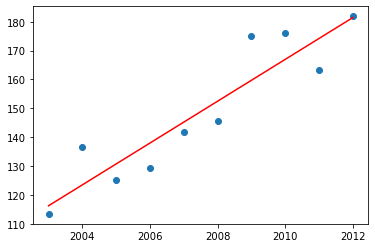

In [74]:
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()
#look to 

In [75]:
coefficient_of_determination = model.score(x,y) #R sqaure value 
coefficient_of_determination

0.8465596340525738

In [76]:
intercept = model.intercept_ #everthing else is correct but the interception 
intercept

array([-14402.59847673])

In [77]:
work_res_emp_2003_2012_slope = model.coef_
work_res_emp_2003_2012_slope

array([[7.2485419]])

#### 2003-2019 Work, Regression

In [78]:
year = np.array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]).reshape((-1, 1))
activity_hours_per_day = np.array([work_2003_res_emp_hr_per_day, work_2004_res_emp_hr_per_day, work_2005_res_emp_hr_per_day, work_2006_res_emp_hr_per_day, work_2007_res_emp_hr_per_day,work_2008_res_emp_hr_per_day, work_2009_res_emp_hr_per_day, work_2010_res_emp_hr_per_day, work_2011_res_emp_hr_per_day,work_2012_res_emp_hr_per_day, work_2013_res_emp_hr_per_day, work_2014_res_emp_hr_per_day, work_2015_res_emp_hr_per_day, work_2016_res_emp_hr_per_day, work_2017_res_emp_hr_per_day, work_2018_res_emp_hr_per_day, work_2019_res_emp_hr_per_day]).reshape((-1, 1))

activity_hours_per_yr = [i * 365 for i in activity_hours_per_day]
#activity_hours_per_yr

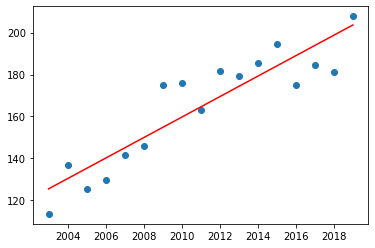

In [79]:
x = year
y = activity_hours_per_yr
x, y = np.array(x), np.array(y)

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)  

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [80]:
coefficient_of_determination = model.score(x,y) #R sqaure value 
coefficient_of_determination

0.8274599848904041

In [81]:
work_res_emp_2003_2019_slope = model.coef_
work_res_emp_2003_2019_slope

array([[4.89361295]])

## 2003-2019 Television -Employed

### 2003 Television

In [82]:
#120303 = Television and movies (not religious), 120304 = Television (religious)
watch_tv = ["120303","120304"]
television = atus_2003_res_emp[atus_2003_res_emp["TRCODEP"].isin(watch_tv)]
#television

In [83]:
tv_2003_res_emp = television.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
tv_2003_res_emp_merged = pd.merge(tv_2003_res_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#television_2003_merged

In [84]:
tv_2003_res_emp_merged["Mutiplied Weighted"] = tv_2003_res_emp_merged["TUACTDUR24"] * tv_2003_res_emp_merged["TUFNWGTP"]
#tv_2003_res_emp_merged

In [85]:
tv_2003_res_emp_weight = tv_2003_res_emp_merged["Mutiplied Weighted"].sum()
tv_2003_res_emp_weight

6544102609733.714

In [86]:
tv_2003_res_emp_avg_minutes = tv_2003_res_emp_weight / all_2003_emp_weight
tv_2003_res_emp_avg_minutes

123.0390813013073

In [87]:
tv_2003_res_emp_avg_hr_per_day = tv_2003_res_emp_avg_minutes / 60
tv_2003_res_emp_avg_hr_per_day

2.0506513550217886

### 2004 Television

In [88]:
watch_tv = ["120303","120304"]
television = atus_2004_res_emp[atus_2004_res_emp["TRCODEP"].isin(watch_tv)]

tv_2004_res_emp = television.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
tv_2004_res_emp_merged = pd.merge(tv_2004_res_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

tv_2004_res_emp_merged["Mutiplied Weighted"] = tv_2004_res_emp_merged["TUACTDUR24"] * tv_2004_res_emp_merged["TUFNWGTP"]

In [89]:
tv_2004_res_emp_weight = tv_2004_res_emp_merged["Mutiplied Weighted"].sum()

tv_2004_res_emp_avg_minutes = tv_2004_res_emp_weight / all_2004_emp_weight

tv_2004_res_emp_avg_hr_per_day = tv_2004_res_emp_avg_minutes / 60
tv_2004_res_emp_avg_hr_per_day

2.1109772602893178

### 2005 Television

In [90]:
watch_tv = ["120303","120304"]
television = atus_2005_res_emp[atus_2005_res_emp["TRCODEP"].isin(watch_tv)]

tv_2005_res_emp = television.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
tv_2005_res_emp_merged = pd.merge(tv_2005_res_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

tv_2005_res_emp_merged["Mutiplied Weighted"] = tv_2005_res_emp_merged["TUACTDUR24"] * tv_2005_res_emp_merged["TUFNWGTP"]

In [91]:
tv_2005_res_emp_weight = tv_2005_res_emp_merged["Mutiplied Weighted"].sum()

tv_2005_res_emp_avg_minutes = tv_2005_res_emp_weight / all_2005_emp_weight

tv_2005_res_emp_avg_hr_per_day = tv_2005_res_emp_avg_minutes / 60
tv_2005_res_emp_avg_hr_per_day

2.067364027745159

### 2006 Television 

In [92]:
watch_tv = ["120303","120304"]
television = atus_2006_res_emp[atus_2006_res_emp["TRCODEP"].isin(watch_tv)]

tv_2006_res_emp = television.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
tv_2006_res_emp_merged = pd.merge(tv_2006_res_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

tv_2006_res_emp_merged["Mutiplied Weighted"] = tv_2006_res_emp_merged["TUACTDUR24"] * tv_2006_res_emp_merged["TUFNWGTP"]

In [93]:
tv_2006_res_emp_weight = tv_2006_res_emp_merged["Mutiplied Weighted"].sum()

tv_2006_res_emp_avg_minutes = tv_2006_res_emp_weight / all_2006_emp_weight

tv_2006_res_emp_avg_hr_per_day = tv_2006_res_emp_avg_minutes / 60
tv_2006_res_emp_avg_hr_per_day

2.039295165058429

### 2007 Television 

In [94]:
watch_tv = ["120303","120304"]
television = atus_2007_res_emp[atus_2007_res_emp["TRCODEP"].isin(watch_tv)]

tv_2007_res_emp = television.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
tv_2007_res_emp_merged = pd.merge(tv_2007_res_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

tv_2007_res_emp_merged["Mutiplied Weighted"] = tv_2007_res_emp_merged["TUACTDUR24"] * tv_2007_res_emp_merged["TUFNWGTP"]

In [95]:
tv_2007_res_emp_weight = tv_2007_res_emp_merged["Mutiplied Weighted"].sum()

tv_2007_res_emp_avg_minutes = tv_2007_res_emp_weight / all_2007_emp_weight

tv_2007_res_emp_avg_hr_per_day = tv_2007_res_emp_avg_minutes / 60
tv_2007_res_emp_avg_hr_per_day

2.08785700962462

### 2008 Television 

In [96]:
watch_tv = ["120303","120304"]
television = atus_2008_res_emp[atus_2008_res_emp["TRCODEP"].isin(watch_tv)]

tv_2008_res_emp = television.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
tv_2008_res_emp_merged = pd.merge(tv_2008_res_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

tv_2008_res_emp_merged["Mutiplied Weighted"] = tv_2008_res_emp_merged["TUACTDUR24"] * tv_2008_res_emp_merged["TUFNWGTP"]

In [97]:
tv_2008_res_emp_weight = tv_2008_res_emp_merged["Mutiplied Weighted"].sum()

tv_2008_res_emp_avg_minutes = tv_2008_res_emp_weight / all_2008_emp_weight

tv_2008_res_emp_avg_hr_per_day = tv_2008_res_emp_avg_minutes / 60
tv_2008_res_emp_avg_hr_per_day

2.195797732822891

### 2009 Televison 

In [98]:
watch_tv = ["120303","120304"]
television = atus_2009_res_emp[atus_2009_res_emp["TRCODEP"].isin(watch_tv)]

tv_2009_res_emp = television.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
tv_2009_res_emp_merged = pd.merge(tv_2009_res_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

tv_2009_res_emp_merged["Mutiplied Weighted"] = tv_2009_res_emp_merged["TUACTDUR24"] * tv_2009_res_emp_merged["TUFNWGTP"]

In [99]:
tv_2009_res_emp_weight = tv_2009_res_emp_merged["Mutiplied Weighted"].sum()

tv_2009_res_emp_avg_minutes = tv_2009_res_emp_weight / all_2009_emp_weight

tv_2009_res_emp_avg_hr_per_day = tv_2009_res_emp_avg_minutes / 60
tv_2009_res_emp_avg_hr_per_day

2.192936237737446

### 2010 Television 

In [100]:
watch_tv = ["120303","120304"]
television = atus_2010_res_emp[atus_2010_res_emp["TRCODEP"].isin(watch_tv)]

tv_2010_res_emp = television.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
tv_2010_res_emp_merged = pd.merge(tv_2010_res_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

tv_2010_res_emp_merged["Mutiplied Weighted"] = tv_2010_res_emp_merged["TUACTDUR24"] * tv_2010_res_emp_merged["TUFNWGTP"]

In [101]:
tv_2010_res_emp_weight = tv_2010_res_emp_merged["Mutiplied Weighted"].sum()

tv_2010_res_emp_avg_minutes = tv_2010_res_emp_weight / all_2010_emp_weight

tv_2010_res_emp_avg_hr_per_day = tv_2010_res_emp_avg_minutes / 60
tv_2010_res_emp_avg_hr_per_day

2.1269858523572736

### 2011 Television 

In [102]:
watch_tv = ["120303","120304"]
television = atus_2011_res_emp[atus_2011_res_emp["TRCODEP"].isin(watch_tv)]

tv_2011_res_emp = television.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
tv_2011_res_emp_merged = pd.merge(tv_2011_res_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

tv_2011_res_emp_merged["Mutiplied Weighted"] = tv_2011_res_emp_merged["TUACTDUR24"] * tv_2011_res_emp_merged["TUFNWGTP"]

In [103]:
tv_2011_res_emp_weight = tv_2011_res_emp_merged["Mutiplied Weighted"].sum()

tv_2011_res_emp_avg_minutes = tv_2011_res_emp_weight / all_2011_emp_weight

tv_2011_res_emp_avg_hr_per_day = tv_2011_res_emp_avg_minutes / 60
tv_2011_res_emp_avg_hr_per_day

2.135001597987184

### 2012 Television

In [104]:
watch_tv = ["120303","120304"]
television = atus_2012_res_emp[atus_2012_res_emp["TRCODEP"].isin(watch_tv)]

tv_2012_res_emp = television.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
tv_2012_res_emp_merged = pd.merge(tv_2012_res_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

tv_2012_res_emp_merged["Mutiplied Weighted"] = tv_2012_res_emp_merged["TUACTDUR24"] * tv_2012_res_emp_merged["TUFNWGTP"]

In [105]:
tv_2012_res_emp_weight = tv_2012_res_emp_merged["Mutiplied Weighted"].sum()

tv_2012_res_emp_avg_minutes = tv_2012_res_emp_weight / all_2012_emp_weight

tv_2012_res_emp_avg_hr_per_day = tv_2012_res_emp_avg_minutes / 60
tv_2012_res_emp_avg_hr_per_day

2.231287263600931

### 2013 Television 

In [106]:
watch_tv = ["120303","120304"]
television = atus_2013_res_emp[atus_2013_res_emp["TRCODEP"].isin(watch_tv)]

tv_2013_res_emp = television.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
tv_2013_res_emp_merged = pd.merge(tv_2013_res_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

tv_2013_res_emp_merged["Mutiplied Weighted"] = tv_2013_res_emp_merged["TUACTDUR24"] * tv_2013_res_emp_merged["TUFNWGTP"]

In [107]:
tv_2013_res_emp_weight = tv_2013_res_emp_merged["Mutiplied Weighted"].sum()

tv_2013_res_emp_avg_minutes = tv_2013_res_emp_weight / all_2013_emp_weight

tv_2013_res_emp_avg_hr_per_day = tv_2013_res_emp_avg_minutes / 60
tv_2013_res_emp_avg_hr_per_day

2.0754542815673758

### 2014 Television 

In [108]:
watch_tv = ["120303","120304"]
television = atus_2014_res_emp[atus_2014_res_emp["TRCODEP"].isin(watch_tv)]

tv_2014_res_emp = television.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
tv_2014_res_emp_merged = pd.merge(tv_2014_res_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

tv_2014_res_emp_merged["Mutiplied Weighted"] = tv_2014_res_emp_merged["TUACTDUR24"] * tv_2014_res_emp_merged["TUFNWGTP"]

In [109]:
tv_2014_res_emp_weight = tv_2014_res_emp_merged["Mutiplied Weighted"].sum()

tv_2014_res_emp_avg_minutes = tv_2014_res_emp_weight / all_2014_emp_weight

tv_2014_res_emp_avg_hr_per_day = tv_2014_res_emp_avg_minutes / 60
tv_2014_res_emp_avg_hr_per_day

2.1590392547197634

### 2015 Television 

In [110]:
watch_tv = ["120303","120304"]
television = atus_2015_res_emp[atus_2015_res_emp["TRCODEP"].isin(watch_tv)]

tv_2015_res_emp = television.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
tv_2015_res_emp_merged = pd.merge(tv_2015_res_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

tv_2015_res_emp_merged["Mutiplied Weighted"] = tv_2015_res_emp_merged["TUACTDUR24"] * tv_2015_res_emp_merged["TUFNWGTP"]

In [111]:
tv_2015_res_emp_weight = tv_2015_res_emp_merged["Mutiplied Weighted"].sum()

tv_2015_res_emp_avg_minutes = tv_2015_res_emp_weight / all_2015_emp_weight

tv_2015_res_emp_avg_hr_per_day = tv_2015_res_emp_avg_minutes / 60
tv_2015_res_emp_avg_hr_per_day

2.116224047367439

### 2016 Television

In [112]:
watch_tv = ["120303","120304"]
television = atus_2016_res_emp[atus_2016_res_emp["TRCODEP"].isin(watch_tv)]

tv_2016_res_emp = television.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
tv_2016_res_emp_merged = pd.merge(tv_2016_res_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

tv_2016_res_emp_merged["Mutiplied Weighted"] = tv_2016_res_emp_merged["TUACTDUR24"] * tv_2016_res_emp_merged["TUFNWGTP"]

In [113]:
tv_2016_res_emp_weight = tv_2016_res_emp_merged["Mutiplied Weighted"].sum()

tv_2016_res_emp_avg_minutes = tv_2016_res_emp_weight / all_2016_emp_weight

tv_2016_res_emp_avg_hr_per_day = tv_2016_res_emp_avg_minutes / 60
tv_2016_res_emp_avg_hr_per_day

2.069973741894652

### 2017 Television 

In [114]:
watch_tv = ["120303","120304"]
television = atus_2017_res_emp[atus_2017_res_emp["TRCODEP"].isin(watch_tv)]

tv_2017_res_emp = television.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
tv_2017_res_emp_merged = pd.merge(tv_2017_res_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

tv_2017_res_emp_merged["Mutiplied Weighted"] = tv_2017_res_emp_merged["TUACTDUR24"] * tv_2017_res_emp_merged["TUFNWGTP"]

In [115]:
tv_2017_res_emp_weight = tv_2017_res_emp_merged["Mutiplied Weighted"].sum()

tv_2017_res_emp_avg_minutes = tv_2017_res_emp_weight / all_2017_emp_weight

tv_2017_res_emp_avg_hr_per_day = tv_2017_res_emp_avg_minutes / 60
tv_2017_res_emp_avg_hr_per_day

2.0917497636798137

### 2018 Television 

In [116]:
watch_tv = ["120303","120304"]
television = atus_2018_res_emp[atus_2018_res_emp["TRCODEP"].isin(watch_tv)]

tv_2018_res_emp = television.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
tv_2018_res_emp_merged = pd.merge(tv_2018_res_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

tv_2018_res_emp_merged["Mutiplied Weighted"] = tv_2018_res_emp_merged["TUACTDUR24"] * tv_2018_res_emp_merged["TUFNWGTP"]

In [117]:
tv_2018_res_emp_weight = tv_2018_res_emp_merged["Mutiplied Weighted"].sum()

tv_2018_res_emp_avg_minutes = tv_2018_res_emp_weight / all_2018_emp_weight

tv_2018_res_emp_avg_hr_per_day = tv_2018_res_emp_avg_minutes / 60
tv_2018_res_emp_avg_hr_per_day

2.1066620923492705

### 2019 Television

In [118]:
watch_tv = ["120303","120304"]
television = atus_2019_res_emp[atus_2019_res_emp["TRCODEP"].isin(watch_tv)]

tv_2019_res_emp = television.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
tv_2019_res_emp_merged = pd.merge(tv_2019_res_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

tv_2019_res_emp_merged["Mutiplied Weighted"] = tv_2019_res_emp_merged["TUACTDUR24"] * tv_2019_res_emp_merged["TUFNWGTP"]

In [119]:
tv_2019_res_emp_weight = tv_2019_res_emp_merged["Mutiplied Weighted"].sum()

tv_2019_res_emp_avg_minutes = tv_2019_res_emp_weight / all_2019_emp_weight

tv_2019_res_emp_avg_hr_per_day = tv_2019_res_emp_avg_minutes / 60
tv_2019_res_emp_avg_hr_per_day

2.0943981520203674

### Television Regression 

#### 2003-2012 Regression

In [120]:
year = np.array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012]).reshape((-1, 1))
activity_hours_per_day = np.array([tv_2003_res_emp_avg_hr_per_day, tv_2004_res_emp_avg_hr_per_day, tv_2005_res_emp_avg_hr_per_day, tv_2006_res_emp_avg_hr_per_day, tv_2007_res_emp_avg_hr_per_day, tv_2008_res_emp_avg_hr_per_day, tv_2009_res_emp_avg_hr_per_day, tv_2010_res_emp_avg_hr_per_day, tv_2011_res_emp_avg_hr_per_day, tv_2012_res_emp_avg_hr_per_day]).reshape((-1, 1))

activity_hours_per_yr = [i * 365 for i in activity_hours_per_day]
activity_hours_per_yr

[array([748.48774458]),
 array([770.50670001]),
 array([754.58787013]),
 array([744.34273525]),
 array([762.06780851]),
 array([801.46617248]),
 array([800.42172677]),
 array([776.34983611]),
 array([779.27558327]),
 array([814.41985121])]

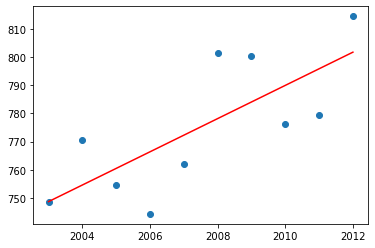

In [121]:
x = year
y = activity_hours_per_yr
x, y = np.array(x), np.array(y)

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)  

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [122]:
coefficient_of_determination = model.score(x,y) #R sqaure value 
coefficient_of_determination

0.5531717171182995

In [123]:
tv_res_emp_2003_2012_slope = model.coef_
tv_res_emp_2003_2012_slope

array([[5.88615946]])

#### 2003-2019 Regression

In [124]:
year = np.array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]).reshape((-1, 1))
activity_hours_per_day = np.array([tv_2003_res_emp_avg_hr_per_day, tv_2004_res_emp_avg_hr_per_day, tv_2005_res_emp_avg_hr_per_day, tv_2006_res_emp_avg_hr_per_day, tv_2007_res_emp_avg_hr_per_day, tv_2008_res_emp_avg_hr_per_day, tv_2009_res_emp_avg_hr_per_day, tv_2010_res_emp_avg_hr_per_day, tv_2011_res_emp_avg_hr_per_day, tv_2012_res_emp_avg_hr_per_day, tv_2013_res_emp_avg_hr_per_day, tv_2014_res_emp_avg_hr_per_day, tv_2015_res_emp_avg_hr_per_day, tv_2016_res_emp_avg_hr_per_day, tv_2017_res_emp_avg_hr_per_day, tv_2018_res_emp_avg_hr_per_day, tv_2019_res_emp_avg_hr_per_day]).reshape((-1, 1))

activity_hours_per_yr = [i * 365 for i in activity_hours_per_day]
activity_hours_per_yr

[array([748.48774458]),
 array([770.50670001]),
 array([754.58787013]),
 array([744.34273525]),
 array([762.06780851]),
 array([801.46617248]),
 array([800.42172677]),
 array([776.34983611]),
 array([779.27558327]),
 array([814.41985121]),
 array([757.54081277]),
 array([788.04932797]),
 array([772.42177729]),
 array([755.54041579]),
 array([763.48866374]),
 array([768.93166371]),
 array([764.45532549])]

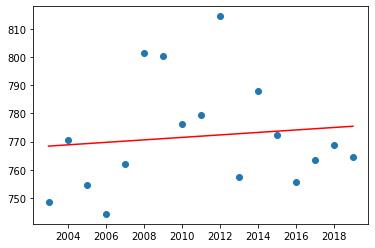

In [125]:
x = year
y = activity_hours_per_yr
x, y = np.array(x), np.array(y)

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)  

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show() #maybe not linear regression, multiviate regression might be best 

In [126]:
coefficient_of_determination = model.score(x,y) #R sqaure value 
coefficient_of_determination

0.012861951569073549

In [127]:
tv_res_emp_2003_2019_slope = model.coef_
tv_res_emp_2003_2019_slope

array([[0.44015217]])

### 2003-2019 Sleeping 

In [128]:
#filter to only include 2003 survey (CASEID begins witn 2003)
atus_2003_emp = multi_merged_employed[multi_merged_employed["TUCASEID"].apply(str).str.startswith("2003")]
#atus_2003

In [129]:
#010101 is Sleeping
#TEWHERE = -1 is not surveyed due to confidential info and too pesonal i.e sleeping 
#all sleeping is assumed to be done at home 
sleeping_2003_emp = atus_2003_emp[atus_2003_emp["TRCODEP"].apply(str).str.startswith("010101")]
#sleeping

In [130]:
sleep_2003_emp = sleeping_2003_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#sleep

In [131]:
sleep_2003_emp_merge = pd.merge(sleep_2003_emp, multi_resp, on ="TUCASEID")
sleep_2003_emp_merge = sleep_2003_emp_merge.filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])
#sleep_merge

In [132]:
sleep_2003_emp_merge["Multiplied Weight"] = sleep_2003_emp_merge["TUACTDUR24"] * sleep_2003_emp_merge["TUFNWGTP"]
#sleep_2003_emp_merge

In [133]:
sleep_2003_emp_weight = sleep_2003_emp_merge["Multiplied Weight"].sum()
sleep_2003_emp_weight

26307987320203.17

In [134]:
sleeping_2003_emp_avg_hr_per_day = sleep_2003_emp_weight.sum() / all_2003_emp_weight /60
sleeping_2003_emp_avg_hr_per_day

8.243836177908873

### 2004 Sleeping

In [135]:
atus_2004_emp = multi_merged_employed[multi_merged_employed["TUCASEID"].apply(str).str.startswith("2004")]

sleeping_2004_emp = atus_2004_emp[atus_2004_emp["TRCODEP"].apply(str).str.startswith("010101")]
sleep_2004_emp = sleeping_2004_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])

sleep_2004_emp_merge = pd.merge(sleep_2004_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])
sleep_2004_emp_merge["Multiplied Weight"] = sleep_2004_emp_merge["TUACTDUR24"] * sleep_2004_emp_merge["TUFNWGTP"]
#sleep_2004_emp_merge

In [136]:
sleep_2004_emp_weight = sleep_2004_emp_merge["Multiplied Weight"].sum()

sleeping_2004_emp_avg_hr_per_day = sleep_2004_emp_weight.sum() / all_2004_emp_weight /60
sleeping_2004_emp_avg_hr_per_day

8.186287134811623

### 2005 Sleeping

In [137]:
atus_2005_emp = multi_merged_employed[multi_merged_employed["TUCASEID"].apply(str).str.startswith("2005")]

sleeping_2005_emp = atus_2005_emp[atus_2005_emp["TRCODEP"].apply(str).str.startswith("010101")]
sleep_2005_emp = sleeping_2005_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])

sleep_2005_emp_merge = pd.merge(sleep_2005_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])
sleep_2005_emp_merge["Multiplied Weight"] = sleep_2005_emp_merge["TUACTDUR24"] * sleep_2005_emp_merge["TUFNWGTP"]

In [138]:
sleep_2005_emp_weight = sleep_2005_emp_merge["Multiplied Weight"].sum()

sleeping_2005_emp_avg_hr_per_day = sleep_2005_emp_weight.sum() / all_2005_emp_weight /60
sleeping_2005_emp_avg_hr_per_day

8.294006584954253

### Sleeping 2006

In [139]:
atus_2006_emp = multi_merged_employed[multi_merged_employed["TUCASEID"].apply(str).str.startswith("2006")]

sleeping_2006_emp = atus_2006_emp[atus_2006_emp["TRCODEP"].apply(str).str.startswith("010101")]
sleep_2006_emp = sleeping_2006_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])

sleep_2006_emp_merge = pd.merge(sleep_2006_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])
sleep_2006_emp_merge["Multiplied Weight"] = sleep_2006_emp_merge["TUACTDUR24"] * sleep_2006_emp_merge["TUFNWGTP"]

In [140]:
sleep_2006_emp_weight = sleep_2006_emp_merge["Multiplied Weight"].sum()

sleeping_2006_emp_avg_hr_per_day = sleep_2006_emp_weight.sum() / all_2006_emp_weight /60
sleeping_2006_emp_avg_hr_per_day

8.285432130084683

### Sleeping 2007

In [141]:
atus_2007_emp = multi_merged_employed[multi_merged_employed["TUCASEID"].apply(str).str.startswith("2007")]

sleeping_2007_emp = atus_2007_emp[atus_2007_emp["TRCODEP"].apply(str).str.startswith("010101")]
sleep_2007_emp = sleeping_2007_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])

sleep_2007_emp_merge = pd.merge(sleep_2007_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])
sleep_2007_emp_merge["Multiplied Weight"] = sleep_2007_emp_merge["TUACTDUR24"] * sleep_2007_emp_merge["TUFNWGTP"]

In [142]:
sleep_2007_emp_weight = sleep_2007_emp_merge["Multiplied Weight"].sum()

sleeping_2007_emp_avg_hr_per_day = sleep_2007_emp_weight.sum() / all_2007_emp_weight /60
sleeping_2007_emp_avg_hr_per_day

8.211234165830327

### Sleeping 2008

In [143]:
atus_2008_emp = multi_merged_employed[multi_merged_employed["TUCASEID"].apply(str).str.startswith("2008")]

sleeping_2008_emp = atus_2008_emp[atus_2008_emp["TRCODEP"].apply(str).str.startswith("010101")]
sleep_2008_emp = sleeping_2008_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])

sleep_2008_emp_merge = pd.merge(sleep_2008_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])
sleep_2008_emp_merge["Multiplied Weight"] = sleep_2008_emp_merge["TUACTDUR24"] * sleep_2008_emp_merge["TUFNWGTP"]

In [144]:
sleep_2008_emp_weight = sleep_2008_emp_merge["Multiplied Weight"].sum()

sleeping_2008_emp_avg_hr_per_day = sleep_2008_emp_weight.sum() / all_2008_emp_weight /60
sleeping_2008_emp_avg_hr_per_day

8.264721099036251

### Sleeping 2009

In [145]:
atus_2009_emp = multi_merged_employed[multi_merged_employed["TUCASEID"].apply(str).str.startswith("2009")]

sleeping_2009_emp = atus_2009_emp[atus_2009_emp["TRCODEP"].apply(str).str.startswith("010101")]
sleep_2009_emp = sleeping_2009_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])

sleep_2009_emp_merge = pd.merge(sleep_2009_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])
sleep_2009_emp_merge["Multiplied Weight"] = sleep_2009_emp_merge["TUACTDUR24"] * sleep_2009_emp_merge["TUFNWGTP"]

In [146]:
sleep_2009_emp_weight = sleep_2009_emp_merge["Multiplied Weight"].sum()

sleeping_2009_emp_avg_hr_per_day = sleep_2009_emp_weight.sum() / all_2009_emp_weight /60
sleeping_2009_emp_avg_hr_per_day

8.314999011102454

### Sleeping 2010

In [147]:
atus_2010_emp = multi_merged_employed[multi_merged_employed["TUCASEID"].apply(str).str.startswith("2010")]

sleeping_2010_emp = atus_2010_emp[atus_2010_emp["TRCODEP"].apply(str).str.startswith("010101")]
sleep_2010_emp = sleeping_2010_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])

sleep_2010_emp_merge = pd.merge(sleep_2010_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])
sleep_2010_emp_merge["Multiplied Weight"] = sleep_2010_emp_merge["TUACTDUR24"] * sleep_2010_emp_merge["TUFNWGTP"]

In [148]:
sleep_2010_emp_weight = sleep_2010_emp_merge["Multiplied Weight"].sum()

sleeping_2010_emp_avg_hr_per_day = sleep_2010_emp_weight.sum() / all_2010_emp_weight /60
sleeping_2010_emp_avg_hr_per_day

8.254470400644756

### Sleeping 2011

In [149]:
atus_2011_emp = multi_merged_employed[multi_merged_employed["TUCASEID"].apply(str).str.startswith("2011")]

sleeping_2011_emp = atus_2011_emp[atus_2011_emp["TRCODEP"].apply(str).str.startswith("010101")]
sleep_2011_emp = sleeping_2011_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])

sleep_2011_emp_merge = pd.merge(sleep_2011_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])
sleep_2011_emp_merge["Multiplied Weight"] = sleep_2011_emp_merge["TUACTDUR24"] * sleep_2011_emp_merge["TUFNWGTP"]

In [150]:
sleep_2011_emp_weight = sleep_2011_emp_merge["Multiplied Weight"].sum()

sleeping_2011_emp_avg_hr_per_day = sleep_2011_emp_weight.sum() / all_2011_emp_weight /60
sleeping_2011_emp_avg_hr_per_day

8.325902975589477

### Sleeping 2012

In [151]:
atus_2012_emp = multi_merged_employed[multi_merged_employed["TUCASEID"].apply(str).str.startswith("2012")]

sleeping_2012_emp = atus_2012_emp[atus_2012_emp["TRCODEP"].apply(str).str.startswith("010101")]
sleep_2012_emp = sleeping_2012_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])

sleep_2012_emp_merge = pd.merge(sleep_2012_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])
sleep_2012_emp_merge["Multiplied Weight"] = sleep_2012_emp_merge["TUACTDUR24"] * sleep_2012_emp_merge["TUFNWGTP"]

In [152]:
sleep_2012_emp_weight = sleep_2012_emp_merge["Multiplied Weight"].sum()

sleeping_2012_emp_avg_hr_per_day = sleep_2012_emp_weight.sum() / all_2012_emp_weight /60
sleeping_2012_emp_avg_hr_per_day

8.346469233914052

### Sleeping 2013

In [153]:
atus_2013_emp = multi_merged_employed[multi_merged_employed["TUCASEID"].apply(str).str.startswith("2013")]

sleeping_2013_emp = atus_2013_emp[atus_2013_emp["TRCODEP"].apply(str).str.startswith("010101")]
sleep_2013_emp = sleeping_2013_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])

sleep_2013_emp_merge = pd.merge(sleep_2013_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])
sleep_2013_emp_merge["Multiplied Weight"] = sleep_2013_emp_merge["TUACTDUR24"] * sleep_2013_emp_merge["TUFNWGTP"]

In [154]:
sleep_2013_emp_weight = sleep_2013_emp_merge["Multiplied Weight"].sum()

sleeping_2013_emp_avg_hr_per_day = sleep_2013_emp_weight.sum() / all_2013_emp_weight /60
sleeping_2013_emp_avg_hr_per_day

8.379678273642932

### Sleeping 2014

In [155]:
atus_2014_emp = multi_merged_employed[multi_merged_employed["TUCASEID"].apply(str).str.startswith("2014")]

sleeping_2014_emp = atus_2014_emp[atus_2014_emp["TRCODEP"].apply(str).str.startswith("010101")]
sleep_2014_emp = sleeping_2014_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])

sleep_2014_emp_merge = pd.merge(sleep_2014_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])
sleep_2014_emp_merge["Multiplied Weight"] = sleep_2014_emp_merge["TUACTDUR24"] * sleep_2014_emp_merge["TUFNWGTP"]

In [156]:
sleep_2014_emp_weight = sleep_2014_emp_merge["Multiplied Weight"].sum()

sleeping_2014_emp_avg_hr_per_day = sleep_2014_emp_weight.sum() / all_2014_emp_weight /60
sleeping_2014_emp_avg_hr_per_day

8.419490515283176

### Sleeping 2015

In [157]:
atus_2015_emp = multi_merged_employed[multi_merged_employed["TUCASEID"].apply(str).str.startswith("2015")]

sleeping_2015_emp = atus_2015_emp[atus_2015_emp["TRCODEP"].apply(str).str.startswith("010101")]
sleep_2015_emp = sleeping_2015_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])

sleep_2015_emp_merge = pd.merge(sleep_2015_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])
sleep_2015_emp_merge["Multiplied Weight"] = sleep_2015_emp_merge["TUACTDUR24"] * sleep_2015_emp_merge["TUFNWGTP"]

In [158]:
sleep_2015_emp_weight = sleep_2015_emp_merge["Multiplied Weight"].sum()

sleeping_2015_emp_avg_hr_per_day = sleep_2015_emp_weight.sum() / all_2015_emp_weight /60
sleeping_2015_emp_avg_hr_per_day

8.462134202281257

### Sleeping 2016

In [159]:
atus_2016_emp = multi_merged_employed[multi_merged_employed["TUCASEID"].apply(str).str.startswith("2016")]

sleeping_2016_emp = atus_2016_emp[atus_2016_emp["TRCODEP"].apply(str).str.startswith("010101")]
sleep_2016_emp = sleeping_2016_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])

sleep_2016_emp_merge = pd.merge(sleep_2016_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])
sleep_2016_emp_merge["Multiplied Weight"] = sleep_2016_emp_merge["TUACTDUR24"] * sleep_2016_emp_merge["TUFNWGTP"]

In [160]:
sleep_2016_emp_weight = sleep_2016_emp_merge["Multiplied Weight"].sum()

sleeping_2016_emp_avg_hr_per_day = sleep_2016_emp_weight.sum() / all_2016_emp_weight /60
sleeping_2016_emp_avg_hr_per_day

8.44333573671128

### Sleeping 2017

In [161]:
atus_2017_emp = multi_merged_employed[multi_merged_employed["TUCASEID"].apply(str).str.startswith("2017")]

sleeping_2017_emp = atus_2017_emp[atus_2017_emp["TRCODEP"].apply(str).str.startswith("010101")]
sleep_2017_emp = sleeping_2017_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])

sleep_2017_emp_merge = pd.merge(sleep_2017_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])
sleep_2017_emp_merge["Multiplied Weight"] = sleep_2017_emp_merge["TUACTDUR24"] * sleep_2017_emp_merge["TUFNWGTP"]

In [162]:
sleep_2017_emp_weight = sleep_2017_emp_merge["Multiplied Weight"].sum()

sleeping_2017_emp_avg_hr_per_day = sleep_2017_emp_weight.sum() / all_2017_emp_weight /60
sleeping_2017_emp_avg_hr_per_day

8.458351236684376

### Sleeping 2018

In [163]:
atus_2018_emp = multi_merged_employed[multi_merged_employed["TUCASEID"].apply(str).str.startswith("2018")]

sleeping_2018_emp = atus_2018_emp[atus_2018_emp["TRCODEP"].apply(str).str.startswith("010101")]
sleep_2018_emp = sleeping_2018_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])

sleep_2018_emp_merge = pd.merge(sleep_2018_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])
sleep_2018_emp_merge["Multiplied Weight"] = sleep_2018_emp_merge["TUACTDUR24"] * sleep_2018_emp_merge["TUFNWGTP"]

In [164]:
sleep_2018_emp_weight = sleep_2018_emp_merge["Multiplied Weight"].sum()

sleeping_2018_emp_avg_hr_per_day = sleep_2018_emp_weight.sum() / all_2018_emp_weight /60
sleeping_2018_emp_avg_hr_per_day

8.440480228130172

### Sleeping 2019

In [165]:
atus_2019_emp = multi_merged_employed[multi_merged_employed["TUCASEID"].apply(str).str.startswith("2019")]

sleeping_2019_emp = atus_2019_emp[atus_2019_emp["TRCODEP"].apply(str).str.startswith("010101")]
sleep_2019_emp = sleeping_2019_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])

sleep_2019_emp_merge = pd.merge(sleep_2019_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUYEAR","TUFNWGTP"])
sleep_2019_emp_merge["Multiplied Weight"] = sleep_2019_emp_merge["TUACTDUR24"] * sleep_2019_emp_merge["TUFNWGTP"]

In [166]:
sleep_2019_emp_weight = sleep_2019_emp_merge["Multiplied Weight"].sum()

sleeping_2019_emp_avg_hr_per_day = sleep_2019_emp_weight.sum() / all_2019_emp_weight /60
sleeping_2019_emp_avg_hr_per_day

8.490851580015663

### Sleeping Regression

#### 2003-2012 Sleeping Regression 

In [167]:
year = np.array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012]).reshape((-1, 1))
activity_hours_per_day = np.array([sleeping_2003_emp_avg_hr_per_day, sleeping_2004_emp_avg_hr_per_day, sleeping_2005_emp_avg_hr_per_day, sleeping_2006_emp_avg_hr_per_day, sleeping_2007_emp_avg_hr_per_day, sleeping_2008_emp_avg_hr_per_day, sleeping_2009_emp_avg_hr_per_day, sleeping_2010_emp_avg_hr_per_day, sleeping_2011_emp_avg_hr_per_day, sleeping_2012_emp_avg_hr_per_day]).reshape((-1, 1))

activity_hours_per_yr = [i * 365 for i in activity_hours_per_day]
activity_hours_per_yr

[array([3009.00020494]),
 array([2987.99480421]),
 array([3027.31240351]),
 array([3024.18272748]),
 array([2997.10047053]),
 array([3016.62320115]),
 array([3034.97463905]),
 array([3012.88169624]),
 array([3038.95458609]),
 array([3046.46127038])]

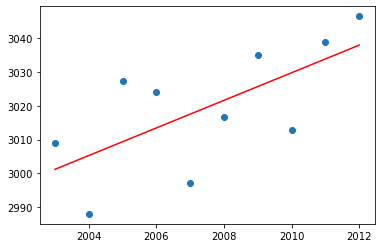

In [168]:
x = year
y = activity_hours_per_yr
x, y = np.array(x), np.array(y)

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)  

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [169]:
coefficient_of_determination = model.score(x,y) #R sqaure value 
coefficient_of_determination

0.4457912917709401

In [170]:
sleeping_res_emp_2003_2012_slope = model.coef_
sleeping_res_emp_2003_2012_slope

array([[4.08250298]])

#### 2003-2019 Sleeping Regression

In [171]:
year = np.array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]).reshape((-1, 1))
activity_hours_per_day = np.array([sleeping_2003_emp_avg_hr_per_day, sleeping_2004_emp_avg_hr_per_day, sleeping_2005_emp_avg_hr_per_day, sleeping_2006_emp_avg_hr_per_day, sleeping_2007_emp_avg_hr_per_day, sleeping_2008_emp_avg_hr_per_day, sleeping_2009_emp_avg_hr_per_day, sleeping_2010_emp_avg_hr_per_day, sleeping_2011_emp_avg_hr_per_day, sleeping_2012_emp_avg_hr_per_day, sleeping_2013_emp_avg_hr_per_day, sleeping_2014_emp_avg_hr_per_day, sleeping_2015_emp_avg_hr_per_day, sleeping_2016_emp_avg_hr_per_day, sleeping_2017_emp_avg_hr_per_day, sleeping_2018_emp_avg_hr_per_day, sleeping_2019_emp_avg_hr_per_day]).reshape((-1, 1))

activity_hours_per_yr = [i * 365 for i in activity_hours_per_day]
#activity_hours_per_yr

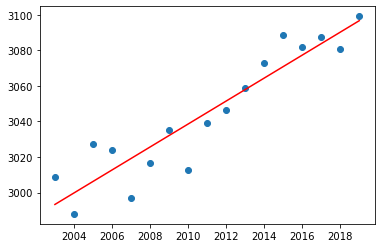

In [172]:
x = year
y = activity_hours_per_yr
x, y = np.array(x), np.array(y)

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)  

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [173]:
coefficient_of_determination = model.score(x,y) #R sqaure value 
coefficient_of_determination

0.8596302009058292

In [174]:
sleeping_res_emp_2003_2019_slope = model.coef_
sleeping_res_emp_2003_2019_slope

array([[6.45936078]])

## 2003-2004 Food and Drink Preparation Residential - Employed

### 2003 Food and Drink Preparation

In [175]:
#020201 is Food and Drink Preparation
food_2003_res_emp = atus_2003_res_emp.loc[atus_2003_res_emp["TRCODEP"] == "020201"]

In [176]:
food_2003_res_emp = food_2003_res_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
food_2003_res_emp_merged = pd.merge(food_2003_res_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#food_2003_merged

In [177]:
food_2003_res_emp_merged["Mutiplied Weighted"] = food_2003_res_emp_merged["TUACTDUR24"] * food_2003_res_emp_merged["TUFNWGTP"]
#food_2003_merged

In [178]:
food_2003_res_emp_weight = food_2003_res_emp_merged["Mutiplied Weighted"].sum()
food_2003_res_emp_weight

993492594967.4374

In [179]:
food_2003_res_emp_avg_hr_per_day = food_2003_res_emp_weight / all_2003_emp_weight /60
food_2003_res_emp_avg_hr_per_day

0.31131952806543606

### 2004 Food and Drink Preparation

In [180]:
food_2004_res_emp = atus_2004_res_emp.loc[atus_2004_res_emp["TRCODEP"] == "020201"]

food_2004_res_emp = food_2004_res_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
food_2004_res_emp_merged = pd.merge(food_2004_res_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

food_2004_res_emp_merged["Mutiplied Weighted"] = food_2004_res_emp_merged["TUACTDUR24"] * food_2004_res_emp_merged["TUFNWGTP"]

In [181]:
food_2004_res_emp_weight = food_2004_res_emp_merged["Mutiplied Weighted"].sum()

food_2004_res_emp_avg_hr_per_day = food_2004_res_emp_weight / all_2004_emp_weight /60
food_2004_res_emp_avg_hr_per_day

0.3016482064830671

### 2005 Food and Drink Preparation

In [182]:
food_2005_res_emp = atus_2005_res_emp.loc[atus_2005_res_emp["TRCODEP"] == "020201"]

food_2005_res_emp = food_2005_res_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
food_2005_res_emp_merged = pd.merge(food_2005_res_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

food_2005_res_emp_merged["Mutiplied Weighted"] = food_2005_res_emp_merged["TUACTDUR24"] * food_2005_res_emp_merged["TUFNWGTP"]

In [183]:
food_2005_res_emp_weight = food_2005_res_emp_merged["Mutiplied Weighted"].sum()

food_2005_res_emp_avg_hr_per_day = food_2005_res_emp_weight / all_2005_emp_weight /60
food_2005_res_emp_avg_hr_per_day

0.30791273554744786

### 2006 Food and Drink Preparation

In [184]:
food_2006_res_emp = atus_2006_res_emp.loc[atus_2006_res_emp["TRCODEP"] == "020201"]

food_2006_res_emp = food_2006_res_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
food_2006_res_emp_merged = pd.merge(food_2006_res_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

food_2006_res_emp_merged["Mutiplied Weighted"] = food_2006_res_emp_merged["TUACTDUR24"] * food_2006_res_emp_merged["TUFNWGTP"]

In [185]:
food_2006_res_emp_weight = food_2006_res_emp_merged["Mutiplied Weighted"].sum()

food_2006_res_emp_avg_hr_per_day = food_2006_res_emp_weight / all_2006_emp_weight /60
food_2006_res_emp_avg_hr_per_day

0.3158219140433619

### 2007 Food and Drink Preparation

In [186]:
food_2007_res_emp = atus_2007_res_emp.loc[atus_2007_res_emp["TRCODEP"] == "020201"]

food_2007_res_emp = food_2007_res_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
food_2007_res_emp_merged = pd.merge(food_2007_res_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

food_2007_res_emp_merged["Mutiplied Weighted"] = food_2007_res_emp_merged["TUACTDUR24"] * food_2007_res_emp_merged["TUFNWGTP"]

In [187]:
food_2007_res_emp_weight = food_2007_res_emp_merged["Mutiplied Weighted"].sum()

food_2007_res_emp_avg_hr_per_day = food_2007_res_emp_weight / all_2007_emp_weight /60
food_2007_res_emp_avg_hr_per_day

0.32483993062103245

### 2008 Food and Drink Preparation

In [188]:
food_2008_res_emp = atus_2008_res_emp.loc[atus_2008_res_emp["TRCODEP"] == "020201"]

food_2008_res_emp = food_2008_res_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
food_2008_res_emp_merged = pd.merge(food_2008_res_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

food_2008_res_emp_merged["Mutiplied Weighted"] = food_2008_res_emp_merged["TUACTDUR24"] * food_2008_res_emp_merged["TUFNWGTP"]

In [189]:
food_2008_res_emp_weight = food_2008_res_emp_merged["Mutiplied Weighted"].sum()

food_2008_res_emp_avg_hr_per_day = food_2008_res_emp_weight / all_2008_emp_weight /60
food_2008_res_emp_avg_hr_per_day

0.3347016521414819

### 2009 Food and Drink Preparation

In [190]:
food_2009_res_emp = atus_2009_res_emp.loc[atus_2009_res_emp["TRCODEP"] == "020201"]

food_2009_res_emp = food_2009_res_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
food_2009_res_emp_merged = pd.merge(food_2009_res_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

food_2009_res_emp_merged["Mutiplied Weighted"] = food_2009_res_emp_merged["TUACTDUR24"] * food_2009_res_emp_merged["TUFNWGTP"]

In [191]:
food_2009_res_emp_weight = food_2009_res_emp_merged["Mutiplied Weighted"].sum()

food_2009_res_emp_avg_hr_per_day = food_2009_res_emp_weight / all_2009_emp_weight /60
food_2009_res_emp_avg_hr_per_day

0.3439123648990766

### 2010 Food and Drink Preparation

In [192]:
food_2010_res_emp = atus_2010_res_emp.loc[atus_2010_res_emp["TRCODEP"] == "020201"]

food_2010_res_emp = food_2010_res_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
food_2010_res_emp_merged = pd.merge(food_2010_res_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

food_2010_res_emp_merged["Mutiplied Weighted"] = food_2010_res_emp_merged["TUACTDUR24"] * food_2010_res_emp_merged["TUFNWGTP"]

In [193]:
food_2010_res_emp_weight = food_2010_res_emp_merged["Mutiplied Weighted"].sum()

food_2010_res_emp_avg_hr_per_day = food_2010_res_emp_weight / all_2010_emp_weight /60
food_2010_res_emp_avg_hr_per_day

0.35658420888024106

### 2011 Food and Drink Preparation

In [194]:
food_2011_res_emp = atus_2011_res_emp.loc[atus_2011_res_emp["TRCODEP"] == "020201"]

food_2011_res_emp = food_2011_res_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
food_2011_res_emp_merged = pd.merge(food_2011_res_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

food_2011_res_emp_merged["Mutiplied Weighted"] = food_2011_res_emp_merged["TUACTDUR24"] * food_2011_res_emp_merged["TUFNWGTP"]

In [195]:
food_2011_res_emp_weight = food_2011_res_emp_merged["Mutiplied Weighted"].sum()

food_2011_res_emp_avg_hr_per_day = food_2011_res_emp_weight / all_2011_emp_weight /60
food_2011_res_emp_avg_hr_per_day

0.35376864927363

### 2012 Food and Drink Preparation

In [196]:
food_2012_res_emp = atus_2012_res_emp.loc[atus_2012_res_emp["TRCODEP"] == "020201"]

food_2012_res_emp = food_2012_res_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
food_2012_res_emp_merged = pd.merge(food_2012_res_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

food_2012_res_emp_merged["Mutiplied Weighted"] = food_2012_res_emp_merged["TUACTDUR24"] * food_2012_res_emp_merged["TUFNWGTP"]

In [197]:
food_2012_res_emp_weight = food_2012_res_emp_merged["Mutiplied Weighted"].sum()

food_2012_res_emp_avg_hr_per_day = food_2012_res_emp_weight / all_2012_emp_weight /60
food_2012_res_emp_avg_hr_per_day

0.3404759572738179

### 2013 Food and Drink Preparation

In [198]:
food_2013_res_emp = atus_2013_res_emp.loc[atus_2013_res_emp["TRCODEP"] == "020201"]

food_2013_res_emp = food_2013_res_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
food_2013_res_emp_merged = pd.merge(food_2013_res_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

food_2013_res_emp_merged["Mutiplied Weighted"] = food_2013_res_emp_merged["TUACTDUR24"] * food_2013_res_emp_merged["TUFNWGTP"]

In [199]:
food_2013_res_emp_weight = food_2013_res_emp_merged["Mutiplied Weighted"].sum()

food_2013_res_emp_avg_hr_per_day = food_2013_res_emp_weight / all_2013_emp_weight /60
food_2013_res_emp_avg_hr_per_day

0.38620773672126624

### 2014 Food and Drink Preparation

In [200]:
food_2014_res_emp = atus_2014_res_emp.loc[atus_2014_res_emp["TRCODEP"] == "020201"]

food_2014_res_emp = food_2014_res_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
food_2014_res_emp_merged = pd.merge(food_2014_res_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

food_2014_res_emp_merged["Mutiplied Weighted"] = food_2014_res_emp_merged["TUACTDUR24"] * food_2014_res_emp_merged["TUFNWGTP"]

In [201]:
food_2014_res_emp_weight = food_2014_res_emp_merged["Mutiplied Weighted"].sum()

food_2014_res_emp_avg_hr_per_day = food_2014_res_emp_weight / all_2014_emp_weight /60
food_2014_res_emp_avg_hr_per_day

0.3654609867933297

### 2015 Food and Drink Preparation

In [202]:
food_2015_res_emp = atus_2015_res_emp.loc[atus_2015_res_emp["TRCODEP"] == "020201"]

food_2015_res_emp = food_2015_res_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
food_2015_res_emp_merged = pd.merge(food_2015_res_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

food_2015_res_emp_merged["Mutiplied Weighted"] = food_2015_res_emp_merged["TUACTDUR24"] * food_2015_res_emp_merged["TUFNWGTP"]

In [203]:
food_2015_res_emp_weight = food_2015_res_emp_merged["Mutiplied Weighted"].sum()

food_2015_res_emp_avg_hr_per_day = food_2015_res_emp_weight / all_2015_emp_weight /60
food_2015_res_emp_avg_hr_per_day

0.3791408385196276

### 2016 Food and Drink Preparation

In [204]:
food_2016_res_emp = atus_2016_res_emp.loc[atus_2016_res_emp["TRCODEP"] == "020201"]

food_2016_res_emp = food_2016_res_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
food_2016_res_emp_merged = pd.merge(food_2016_res_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

food_2016_res_emp_merged["Mutiplied Weighted"] = food_2016_res_emp_merged["TUACTDUR24"] * food_2016_res_emp_merged["TUFNWGTP"]

In [205]:
food_2016_res_emp_weight = food_2016_res_emp_merged["Mutiplied Weighted"].sum()

food_2016_res_emp_avg_hr_per_day = food_2016_res_emp_weight / all_2016_emp_weight /60
food_2016_res_emp_avg_hr_per_day

0.37134892866194513

### 2017 Food and Drink Preparation

In [206]:
food_2017_res_emp = atus_2017_res_emp.loc[atus_2017_res_emp["TRCODEP"] == "020201"]

food_2017_res_emp = food_2017_res_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
food_2017_res_emp_merged = pd.merge(food_2017_res_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

food_2017_res_emp_merged["Mutiplied Weighted"] = food_2017_res_emp_merged["TUACTDUR24"] * food_2017_res_emp_merged["TUFNWGTP"]

In [207]:
food_2017_res_emp_weight = food_2017_res_emp_merged["Mutiplied Weighted"].sum()

food_2017_res_emp_avg_hr_per_day = food_2017_res_emp_weight / all_2017_emp_weight /60
food_2017_res_emp_avg_hr_per_day

0.38897743460779116

### 2018 Food and Drink Preparation

In [208]:
food_2018_res_emp = atus_2018_res_emp.loc[atus_2018_res_emp["TRCODEP"] == "020201"]

food_2018_res_emp = food_2018_res_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
food_2018_res_emp_merged = pd.merge(food_2018_res_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

food_2018_res_emp_merged["Mutiplied Weighted"] = food_2018_res_emp_merged["TUACTDUR24"] * food_2018_res_emp_merged["TUFNWGTP"]

In [209]:
food_2018_res_emp_weight = food_2018_res_emp_merged["Mutiplied Weighted"].sum()

food_2018_res_emp_avg_hr_per_day = food_2018_res_emp_weight / all_2018_emp_weight /60
food_2018_res_emp_avg_hr_per_day

0.4056933050024361

### 2019 Food and Drink Preparation

In [210]:
food_2019_res_emp = atus_2019_res_emp.loc[atus_2019_res_emp["TRCODEP"] == "020201"]

food_2019_res_emp = food_2019_res_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
food_2019_res_emp_merged = pd.merge(food_2019_res_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

food_2019_res_emp_merged["Mutiplied Weighted"] = food_2019_res_emp_merged["TUACTDUR24"] * food_2019_res_emp_merged["TUFNWGTP"]

In [211]:
food_2019_res_emp_weight = food_2019_res_emp_merged["Mutiplied Weighted"].sum()

food_2019_res_emp_avg_hr_per_day = food_2019_res_emp_weight / all_2019_emp_weight /60
food_2019_res_emp_avg_hr_per_day

0.39406624295247183

### Food and Drink Preparation

#### 2003-2019 Food and Drink Preparation Regression 

In [212]:
year = np.array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012]).reshape((-1, 1))
activity_hours_per_day = np.array([food_2003_res_emp_avg_hr_per_day, food_2004_res_emp_avg_hr_per_day, food_2005_res_emp_avg_hr_per_day, food_2006_res_emp_avg_hr_per_day, food_2007_res_emp_avg_hr_per_day, food_2008_res_emp_avg_hr_per_day, food_2009_res_emp_avg_hr_per_day, food_2010_res_emp_avg_hr_per_day, food_2011_res_emp_avg_hr_per_day, food_2012_res_emp_avg_hr_per_day]).reshape((-1, 1))

activity_hours_per_yr = [i * 365 for i in activity_hours_per_day]
#activity_hours_per_yr

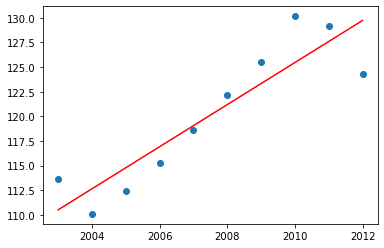

In [213]:
x = year
y = activity_hours_per_yr
x, y = np.array(x), np.array(y)

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)  

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [214]:
coefficient_of_determination = model.score(x,y) #R sqaure value 
coefficient_of_determination

0.8157939608935348

In [215]:
food_res_emp_2003_2012_slope = model.coef_
food_res_emp_2003_2012_slope

array([[2.13412492]])

#### 2003 - 2019 Food and Drink Preparation Regression

In [216]:
year = np.array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]).reshape((-1, 1))
activity_hours_per_day = np.array([food_2003_res_emp_avg_hr_per_day, food_2004_res_emp_avg_hr_per_day, food_2005_res_emp_avg_hr_per_day, food_2006_res_emp_avg_hr_per_day, food_2007_res_emp_avg_hr_per_day, food_2008_res_emp_avg_hr_per_day, food_2009_res_emp_avg_hr_per_day, food_2010_res_emp_avg_hr_per_day, food_2011_res_emp_avg_hr_per_day, food_2012_res_emp_avg_hr_per_day, food_2013_res_emp_avg_hr_per_day, food_2014_res_emp_avg_hr_per_day, food_2015_res_emp_avg_hr_per_day, food_2016_res_emp_avg_hr_per_day, food_2017_res_emp_avg_hr_per_day, food_2018_res_emp_avg_hr_per_day, food_2019_res_emp_avg_hr_per_day]).reshape((-1, 1))

activity_hours_per_yr = [i * 365 for i in activity_hours_per_day]
#activity_hours_per_yr

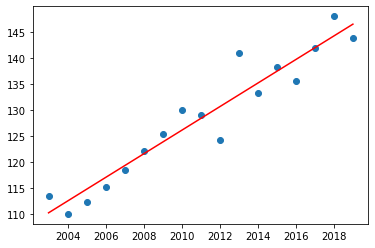

In [217]:
x = year
y = activity_hours_per_yr
x, y = np.array(x), np.array(y)

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)  

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [218]:
coefficient_of_determination = model.score(x,y) #R sqaure value 
coefficient_of_determination

0.9146150650457723

In [219]:
food_res_emp_2003_2019_slope = model.coef_
food_res_emp_2003_2019_slope

array([[2.26539469]])

### 2003-2019 Eating and Drinking 

### 2003 Eating and Drinking

In [220]:
#110101 is eating and drinking
eating = atus_2003_res_emp[atus_2003_res_emp["TRCODEP"].apply(str).str.startswith("110101")]

In [221]:
eating_2003_res_emp = eating.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
eating_2003_res_emp_merged = pd.merge(eating_2003_res_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

In [222]:
eating_2003_res_emp_merged["Mutiplied Weighted"] = eating_2003_res_emp_merged["TUACTDUR24"] * eating_2003_res_emp_merged["TUFNWGTP"]
#eating_2003_res_emp_merged

In [223]:
eating_2003_res_emp_weight = eating_2003_res_emp_merged["Mutiplied Weighted"].sum()
eating_2003_res_emp_weight

1949014920083.285

In [224]:
eating_2003_res_emp_avg_hr_per_day = eating_2003_res_emp_weight / all_2003_emp_weight /60
eating_2003_res_emp_avg_hr_per_day

0.6107407424941191

### 2004 Eating and Drinking

In [225]:
eating = atus_2004_res_emp[atus_2004_res_emp["TRCODEP"].apply(str).str.startswith("110101")]

eating_2004_res_emp = eating.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
eating_2004_res_emp_merged = pd.merge(eating_2004_res_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
eating_2004_res_emp_merged["Mutiplied Weighted"] = eating_2004_res_emp_merged["TUACTDUR24"] * eating_2004_res_emp_merged["TUFNWGTP"]

In [226]:
eating_2004_res_emp_weight = eating_2004_res_emp_merged["Mutiplied Weighted"].sum()

eating_2004_res_emp_avg_hr_per_day = eating_2004_res_emp_weight / all_2004_emp_weight /60
eating_2004_res_emp_avg_hr_per_day

0.6284541590111961

### 2005 Eating and Drinking

In [227]:
eating = atus_2005_res_emp[atus_2005_res_emp["TRCODEP"].apply(str).str.startswith("110101")]

eating_2005_res_emp = eating.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
eating_2005_res_emp_merged = pd.merge(eating_2005_res_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
eating_2005_res_emp_merged["Mutiplied Weighted"] = eating_2005_res_emp_merged["TUACTDUR24"] * eating_2005_res_emp_merged["TUFNWGTP"]

In [228]:
eating_2005_res_emp_weight = eating_2005_res_emp_merged["Mutiplied Weighted"].sum()

eating_2005_res_emp_avg_hr_per_day = eating_2005_res_emp_weight / all_2005_emp_weight /60
eating_2005_res_emp_avg_hr_per_day

0.6328059401964428

### 2006 Eating and Drinking

In [229]:
eating = atus_2006_res_emp[atus_2006_res_emp["TRCODEP"].apply(str).str.startswith("110101")]

eating_2006_res_emp = eating.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
eating_2006_res_emp_merged = pd.merge(eating_2006_res_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
eating_2006_res_emp_merged["Mutiplied Weighted"] = eating_2006_res_emp_merged["TUACTDUR24"] * eating_2006_res_emp_merged["TUFNWGTP"]

In [230]:
eating_2006_res_emp_weight = eating_2006_res_emp_merged["Mutiplied Weighted"].sum()

eating_2006_res_emp_avg_hr_per_day = eating_2006_res_emp_weight / all_2006_emp_weight /60
eating_2006_res_emp_avg_hr_per_day

0.6147541065989893

### 2007 Eating and Drinking

In [231]:
eating = atus_2007_res_emp[atus_2007_res_emp["TRCODEP"].apply(str).str.startswith("110101")]

eating_2007_res_emp = eating.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
eating_2007_res_emp_merged = pd.merge(eating_2007_res_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
eating_2007_res_emp_merged["Mutiplied Weighted"] = eating_2007_res_emp_merged["TUACTDUR24"] * eating_2007_res_emp_merged["TUFNWGTP"]

In [232]:
eating_2007_res_emp_weight = eating_2007_res_emp_merged["Mutiplied Weighted"].sum()

eating_2007_res_emp_avg_hr_per_day = eating_2007_res_emp_weight / all_2007_emp_weight /60
eating_2007_res_emp_avg_hr_per_day

0.6147677547183125

### 2008 Eating and Drinking

In [233]:
eating = atus_2008_res_emp[atus_2008_res_emp["TRCODEP"].apply(str).str.startswith("110101")]

eating_2008_res_emp = eating.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
eating_2008_res_emp_merged = pd.merge(eating_2008_res_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
eating_2008_res_emp_merged["Mutiplied Weighted"] = eating_2008_res_emp_merged["TUACTDUR24"] * eating_2008_res_emp_merged["TUFNWGTP"]

In [234]:
eating_2008_res_emp_weight = eating_2008_res_emp_merged["Mutiplied Weighted"].sum()

eating_2008_res_emp_avg_hr_per_day = eating_2008_res_emp_weight / all_2008_emp_weight /60
eating_2008_res_emp_avg_hr_per_day

0.6286871026190987

### 2009 Eating and Drinking

In [235]:
eating = atus_2009_res_emp[atus_2009_res_emp["TRCODEP"].apply(str).str.startswith("110101")]

eating_2009_res_emp = eating.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
eating_2009_res_emp_merged = pd.merge(eating_2009_res_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
eating_2009_res_emp_merged["Mutiplied Weighted"] = eating_2009_res_emp_merged["TUACTDUR24"] * eating_2009_res_emp_merged["TUFNWGTP"]

In [236]:
eating_2009_res_emp_weight = eating_2009_res_emp_merged["Mutiplied Weighted"].sum()

eating_2009_res_emp_avg_hr_per_day = eating_2009_res_emp_weight / all_2009_emp_weight /60
eating_2009_res_emp_avg_hr_per_day

0.6555276506847113

### 2010 Eating and Drinking

In [237]:
eating = atus_2010_res_emp[atus_2010_res_emp["TRCODEP"].apply(str).str.startswith("110101")]

eating_2010_res_emp = eating.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
eating_2010_res_emp_merged = pd.merge(eating_2010_res_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
eating_2010_res_emp_merged["Mutiplied Weighted"] = eating_2010_res_emp_merged["TUACTDUR24"] * eating_2010_res_emp_merged["TUFNWGTP"]

In [238]:
eating_2010_res_emp_weight = eating_2010_res_emp_merged["Mutiplied Weighted"].sum()

eating_2010_res_emp_avg_hr_per_day = eating_2010_res_emp_weight / all_2010_emp_weight /60
eating_2010_res_emp_avg_hr_per_day

0.6487416335187438

### 2011 Eating and Drinking

In [239]:
eating = atus_2011_res_emp[atus_2011_res_emp["TRCODEP"].apply(str).str.startswith("110101")]

eating_2011_res_emp = eating.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
eating_2011_res_emp_merged = pd.merge(eating_2011_res_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
eating_2011_res_emp_merged["Mutiplied Weighted"] = eating_2011_res_emp_merged["TUACTDUR24"] * eating_2011_res_emp_merged["TUFNWGTP"]

In [240]:
eating_2011_res_emp_weight = eating_2011_res_emp_merged["Mutiplied Weighted"].sum()

eating_2011_res_emp_avg_hr_per_day = eating_2011_res_emp_weight / all_2011_emp_weight /60
eating_2011_res_emp_avg_hr_per_day

0.6616194084267771

### 2012 Eating and Drinking

In [241]:
eating = atus_2012_res_emp[atus_2012_res_emp["TRCODEP"].apply(str).str.startswith("110101")]

eating_2012_res_emp = eating.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
eating_2012_res_emp_merged = pd.merge(eating_2012_res_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
eating_2012_res_emp_merged["Mutiplied Weighted"] = eating_2012_res_emp_merged["TUACTDUR24"] * eating_2012_res_emp_merged["TUFNWGTP"]

In [242]:
eating_2012_res_emp_weight = eating_2012_res_emp_merged["Mutiplied Weighted"].sum()

eating_2012_res_emp_avg_hr_per_day = eating_2012_res_emp_weight / all_2012_emp_weight /60
eating_2012_res_emp_avg_hr_per_day

0.6642942301430439

### 2013 Eating and Drinking

In [243]:
eating = atus_2013_res_emp[atus_2013_res_emp["TRCODEP"].apply(str).str.startswith("110101")]

eating_2013_res_emp = eating.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
eating_2013_res_emp_merged = pd.merge(eating_2013_res_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
eating_2013_res_emp_merged["Mutiplied Weighted"] = eating_2013_res_emp_merged["TUACTDUR24"] * eating_2013_res_emp_merged["TUFNWGTP"]

In [244]:
eating_2013_res_emp_weight = eating_2013_res_emp_merged["Mutiplied Weighted"].sum()

eating_2013_res_emp_avg_hr_per_day = eating_2013_res_emp_weight / all_2013_emp_weight /60
eating_2013_res_emp_avg_hr_per_day

0.6550551793495735

### 2014 Eating and Drinking

In [245]:
eating = atus_2014_res_emp[atus_2014_res_emp["TRCODEP"].apply(str).str.startswith("110101")]

eating_2014_res_emp = eating.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
eating_2014_res_emp_merged = pd.merge(eating_2014_res_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
eating_2014_res_emp_merged["Mutiplied Weighted"] = eating_2014_res_emp_merged["TUACTDUR24"] * eating_2014_res_emp_merged["TUFNWGTP"]

In [246]:
eating_2014_res_emp_weight = eating_2014_res_emp_merged["Mutiplied Weighted"].sum()

eating_2014_res_emp_avg_hr_per_day = eating_2014_res_emp_weight / all_2014_emp_weight /60
eating_2014_res_emp_avg_hr_per_day

0.6216430167861219

### 2015 Eating and Drinking

In [247]:
eating = atus_2015_res_emp[atus_2015_res_emp["TRCODEP"].apply(str).str.startswith("110101")]

eating_2015_res_emp = eating.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
eating_2015_res_emp_merged = pd.merge(eating_2015_res_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
eating_2015_res_emp_merged["Mutiplied Weighted"] = eating_2015_res_emp_merged["TUACTDUR24"] * eating_2015_res_emp_merged["TUFNWGTP"]

In [248]:
eating_2015_res_emp_weight = eating_2015_res_emp_merged["Mutiplied Weighted"].sum()

eating_2015_res_emp_avg_hr_per_day = eating_2015_res_emp_weight / all_2015_emp_weight /60
eating_2015_res_emp_avg_hr_per_day

0.6288102708555134

### 2016 Eating and Drinking

In [249]:
eating = atus_2016_res_emp[atus_2016_res_emp["TRCODEP"].apply(str).str.startswith("110101")]

eating_2016_res_emp = eating.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
eating_2016_res_emp_merged = pd.merge(eating_2016_res_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
eating_2016_res_emp_merged["Mutiplied Weighted"] = eating_2016_res_emp_merged["TUACTDUR24"] * eating_2016_res_emp_merged["TUFNWGTP"]

In [250]:
eating_2016_res_emp_weight = eating_2016_res_emp_merged["Mutiplied Weighted"].sum()

eating_2016_res_emp_avg_hr_per_day = eating_2016_res_emp_weight / all_2016_emp_weight /60
eating_2016_res_emp_avg_hr_per_day

0.6133749653507938

### 2017 Eating and Drinking

In [251]:
eating = atus_2017_res_emp[atus_2017_res_emp["TRCODEP"].apply(str).str.startswith("110101")]

eating_2017_res_emp = eating.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
eating_2017_res_emp_merged = pd.merge(eating_2017_res_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
eating_2017_res_emp_merged["Mutiplied Weighted"] = eating_2017_res_emp_merged["TUACTDUR24"] * eating_2017_res_emp_merged["TUFNWGTP"]

In [252]:
eating_2017_res_emp_weight = eating_2017_res_emp_merged["Mutiplied Weighted"].sum()

eating_2017_res_emp_avg_hr_per_day = eating_2017_res_emp_weight / all_2017_emp_weight /60
eating_2017_res_emp_avg_hr_per_day

0.6055351844816381

### 2018 Eating and Drinking

In [253]:
eating = atus_2018_res_emp[atus_2018_res_emp["TRCODEP"].apply(str).str.startswith("110101")]

eating_2018_res_emp = eating.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
eating_2018_res_emp_merged = pd.merge(eating_2018_res_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
eating_2018_res_emp_merged["Mutiplied Weighted"] = eating_2018_res_emp_merged["TUACTDUR24"] * eating_2018_res_emp_merged["TUFNWGTP"]

In [254]:
eating_2018_res_emp_weight = eating_2018_res_emp_merged["Mutiplied Weighted"].sum()

eating_2018_res_emp_avg_hr_per_day = eating_2018_res_emp_weight / all_2018_emp_weight /60
eating_2018_res_emp_avg_hr_per_day

0.6109851440335708

### 2019 Eating and Drinking

In [255]:
eating = atus_2019_res_emp[atus_2019_res_emp["TRCODEP"].apply(str).str.startswith("110101")]

eating_2019_res_emp = eating.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
eating_2019_res_emp_merged = pd.merge(eating_2019_res_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
eating_2019_res_emp_merged["Mutiplied Weighted"] = eating_2019_res_emp_merged["TUACTDUR24"] * eating_2019_res_emp_merged["TUFNWGTP"]

In [256]:
eating_2019_res_emp_weight = eating_2019_res_emp_merged["Mutiplied Weighted"].sum()

eating_2019_res_emp_avg_hr_per_day = eating_2019_res_emp_weight / all_2019_emp_weight /60
eating_2019_res_emp_avg_hr_per_day

0.6135663545965192

### Eating and Drinking

#### 2003-2012 Eating and Drinking Regression 

In [257]:
year = np.array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012]).reshape((-1, 1))
activity_hours_per_day = np.array([eating_2003_res_emp_avg_hr_per_day, eating_2004_res_emp_avg_hr_per_day, eating_2005_res_emp_avg_hr_per_day, eating_2006_res_emp_avg_hr_per_day, eating_2007_res_emp_avg_hr_per_day, eating_2008_res_emp_avg_hr_per_day, eating_2009_res_emp_avg_hr_per_day, eating_2010_res_emp_avg_hr_per_day, eating_2011_res_emp_avg_hr_per_day, eating_2012_res_emp_avg_hr_per_day]).reshape((-1, 1))

activity_hours_per_yr = [i * 365 for i in activity_hours_per_day]
#activity_hours_per_yr

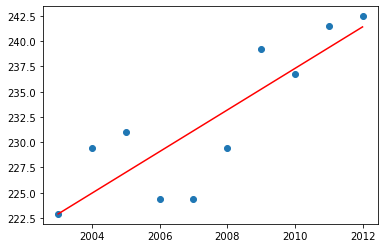

In [258]:
x = year
y = activity_hours_per_yr
x, y = np.array(x), np.array(y)

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)  

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [259]:
coefficient_of_determination = model.score(x,y) #R sqaure value 
coefficient_of_determination

0.7159033919766233

In [260]:
eating_res_emp_2003_2009 = slope = model.coef_
eating_res_emp_2003_2009

array([[2.05739789]])

#### 2003-2019 Eating and Drinking Regression

In [261]:
year = np.array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]).reshape((-1, 1))

activity_hours_per_day = np.array([eating_2003_res_emp_avg_hr_per_day, eating_2004_res_emp_avg_hr_per_day, eating_2005_res_emp_avg_hr_per_day, eating_2006_res_emp_avg_hr_per_day, eating_2007_res_emp_avg_hr_per_day, eating_2008_res_emp_avg_hr_per_day, eating_2009_res_emp_avg_hr_per_day, eating_2010_res_emp_avg_hr_per_day, eating_2011_res_emp_avg_hr_per_day, eating_2012_res_emp_avg_hr_per_day, eating_2013_res_emp_avg_hr_per_day, eating_2014_res_emp_avg_hr_per_day, eating_2015_res_emp_avg_hr_per_day, eating_2016_res_emp_avg_hr_per_day, eating_2017_res_emp_avg_hr_per_day, eating_2018_res_emp_avg_hr_per_day, eating_2019_res_emp_avg_hr_per_day]).reshape((-1, 1))

activity_hours_per_yr = [i * 365 for i in activity_hours_per_day]
activity_hours_per_yr

[array([222.92037101]),
 array([229.38576804]),
 array([230.97416817]),
 array([224.38524891]),
 array([224.39023047]),
 array([229.47079246]),
 array([239.2675925]),
 array([236.79069623]),
 array([241.49108408]),
 array([242.467394]),
 array([239.09514046]),
 array([226.89970113]),
 array([229.51574886]),
 array([223.88186235]),
 array([221.02034234]),
 array([223.00957757]),
 array([223.95171943])]

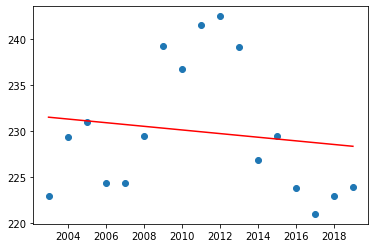

In [262]:
x = year
y = activity_hours_per_yr
x, y = np.array(x), np.array(y)

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)  

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [263]:
coefficient_of_determination = model.score(x,y) #R sqaure value 
coefficient_of_determination

0.019131959078009353

In [264]:
eating_res_emp_2003_2009 = slope = model.coef_
eating_res_emp_2003_2009

array([[-0.19730843]])

## 2003-2019 Computer Use for Leisure (exc. Games) Residential - Employed

### 2003 Computer Use for Leisure (exc. Games)

In [265]:
atus_2003_leisure = atus_2003_res_emp.loc[atus_2003_res_emp["TRCODEP"] == "120308"]
#atus_2003_leisure

In [266]:
computer_2003_res_emp_merged = atus_2003_leisure.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
computer_2003_res_emp_merged = pd.merge(computer_2003_res_emp_merged, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
computer_2003_res_emp_merged

computer_2003_res_emp_merged["Mutiplied Weighted"] = computer_2003_res_emp_merged["TUACTDUR24"] * computer_2003_res_emp_merged["TUFNWGTP"]
#computer_2003_res_emp_merged

In [267]:
computer_2003_res_emp_weight = computer_2003_res_emp_merged["Mutiplied Weighted"].sum()
computer_2003_res_emp_weight

389989056433.8152

In [268]:
# hdp = hour per day
computer_2003_res_emp_avg_hpd = computer_2003_res_emp_weight / all_2003_emp_weight /60
computer_2003_res_emp_avg_hpd

0.12220645590583332

### 2004 Computer Use for Leisure (exc. Games)

In [269]:
atus_2004_leisure = atus_2004_res_emp.loc[atus_2004_res_emp["TRCODEP"] == "120308"]

computer_2004_res_emp_merged = atus_2004_leisure.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
computer_2004_res_emp_merged = pd.merge(computer_2004_res_emp_merged, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
computer_2004_res_emp_merged

computer_2004_res_emp_merged["Mutiplied Weighted"] = computer_2004_res_emp_merged["TUACTDUR24"] * computer_2004_res_emp_merged["TUFNWGTP"]


In [270]:
computer_2004_res_emp_weight = computer_2004_res_emp_merged["Mutiplied Weighted"].sum()
computer_2004_res_emp_avg_hpd = computer_2004_res_emp_weight / all_2004_emp_weight /60
computer_2004_res_emp_avg_hpd

0.117411423121604

### 2005 Computer Use for Leisure (exc. Games)

In [271]:
atus_2005_leisure = atus_2005_res_emp.loc[atus_2005_res_emp["TRCODEP"] == "120308"]

computer_2005_res_emp_merged = atus_2005_leisure.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
computer_2005_res_emp_merged = pd.merge(computer_2005_res_emp_merged, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
computer_2005_res_emp_merged

computer_2005_res_emp_merged["Mutiplied Weighted"] = computer_2005_res_emp_merged["TUACTDUR24"] * computer_2005_res_emp_merged["TUFNWGTP"]

In [272]:
computer_2005_res_emp_weight = computer_2005_res_emp_merged["Mutiplied Weighted"].sum()
computer_2005_res_emp_avg_hpd = computer_2005_res_emp_weight / all_2005_emp_weight /60
computer_2005_res_emp_avg_hpd

0.12078009484617437

### 2006 Computer Use for Leisure (exc. Games)

In [273]:
atus_2006_leisure = atus_2006_res_emp.loc[atus_2006_res_emp["TRCODEP"] == "120308"]

computer_2006_res_emp_merged = atus_2006_leisure.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
computer_2006_res_emp_merged = pd.merge(computer_2006_res_emp_merged, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
computer_2006_res_emp_merged

computer_2006_res_emp_merged["Mutiplied Weighted"] = computer_2006_res_emp_merged["TUACTDUR24"] * computer_2006_res_emp_merged["TUFNWGTP"]

In [274]:
computer_2006_res_emp_weight = computer_2006_res_emp_merged["Mutiplied Weighted"].sum()
computer_2006_res_emp_avg_hpd = computer_2006_res_emp_weight / all_2006_emp_weight /60
computer_2006_res_emp_avg_hpd

0.12570595726780137

### 2007 Computer Use for Leisure (exc. Games)

In [275]:
atus_2007_leisure = atus_2007_res_emp.loc[atus_2007_res_emp["TRCODEP"] == "120308"]

computer_2007_res_emp_merged = atus_2007_leisure.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
computer_2007_res_emp_merged = pd.merge(computer_2007_res_emp_merged, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
computer_2007_res_emp_merged

computer_2007_res_emp_merged["Mutiplied Weighted"] = computer_2007_res_emp_merged["TUACTDUR24"] * computer_2007_res_emp_merged["TUFNWGTP"]

In [276]:
computer_2007_res_emp_weight = computer_2007_res_emp_merged["Mutiplied Weighted"].sum()
computer_2007_res_emp_avg_hpd = computer_2007_res_emp_weight / all_2007_emp_weight /60
computer_2007_res_emp_avg_hpd

0.11030412868722318

### 2008 Computer Use for Leisure (exc. Games)

In [277]:
atus_2008_leisure = atus_2008_res_emp.loc[atus_2008_res_emp["TRCODEP"] == "120308"]

computer_2008_res_emp_merged = atus_2008_leisure.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
computer_2008_res_emp_merged = pd.merge(computer_2008_res_emp_merged, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
computer_2008_res_emp_merged

computer_2008_res_emp_merged["Mutiplied Weighted"] = computer_2008_res_emp_merged["TUACTDUR24"] * computer_2008_res_emp_merged["TUFNWGTP"]

In [278]:
computer_2008_res_emp_weight = computer_2008_res_emp_merged["Mutiplied Weighted"].sum()
computer_2008_res_emp_avg_hpd = computer_2008_res_emp_weight / all_2008_emp_weight /60
computer_2008_res_emp_avg_hpd

0.1069114312694856

### 2009 Computer Use for Leisure (exc. Games)

In [279]:
atus_2009_leisure = atus_2009_res_emp.loc[atus_2009_res_emp["TRCODEP"] == "120308"]

computer_2009_res_emp_merged = atus_2009_leisure.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
computer_2009_res_emp_merged = pd.merge(computer_2009_res_emp_merged, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
computer_2009_res_emp_merged

computer_2009_res_emp_merged["Mutiplied Weighted"] = computer_2009_res_emp_merged["TUACTDUR24"] * computer_2009_res_emp_merged["TUFNWGTP"]

In [280]:
computer_2009_res_emp_weight = computer_2009_res_emp_merged["Mutiplied Weighted"].sum()
computer_2009_res_emp_avg_hpd = computer_2009_res_emp_weight / all_2009_emp_weight /60
computer_2009_res_emp_avg_hpd

0.12133382321933368

### 2010 Computer Use for Leisure (exc. Games)

In [281]:
atus_2010_leisure = atus_2010_res_emp.loc[atus_2010_res_emp["TRCODEP"] == "120308"]

computer_2010_res_emp_merged = atus_2010_leisure.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
computer_2010_res_emp_merged = pd.merge(computer_2010_res_emp_merged, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
computer_2010_res_emp_merged

computer_2010_res_emp_merged["Mutiplied Weighted"] = computer_2010_res_emp_merged["TUACTDUR24"] * computer_2010_res_emp_merged["TUFNWGTP"]

In [282]:
computer_2010_res_emp_weight = computer_2010_res_emp_merged["Mutiplied Weighted"].sum()
computer_2010_res_emp_avg_hpd = computer_2010_res_emp_weight / all_2010_emp_weight /60
computer_2010_res_emp_avg_hpd

0.15419535640655194

### 2011 Computer Use for Leisure (exc. Games)

In [283]:
atus_2011_leisure = atus_2011_res_emp.loc[atus_2011_res_emp["TRCODEP"] == "120308"]

computer_2011_res_emp_merged = atus_2011_leisure.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
computer_2011_res_emp_merged = pd.merge(computer_2011_res_emp_merged, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
computer_2011_res_emp_merged

computer_2011_res_emp_merged["Mutiplied Weighted"] = computer_2011_res_emp_merged["TUACTDUR24"] * computer_2011_res_emp_merged["TUFNWGTP"]

In [284]:
computer_2011_res_emp_weight = computer_2011_res_emp_merged["Mutiplied Weighted"].sum()
computer_2011_res_emp_avg_hpd = computer_2011_res_emp_weight / all_2011_emp_weight /60
computer_2011_res_emp_avg_hpd

0.15399769784733106

### 2012 Computer Use for Leisure (exc. Games)

In [285]:
atus_2012_leisure = atus_2012_res_emp.loc[atus_2012_res_emp["TRCODEP"] == "120308"]

computer_2012_res_emp_merged = atus_2012_leisure.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
computer_2012_res_emp_merged = pd.merge(computer_2012_res_emp_merged, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
computer_2012_res_emp_merged

computer_2012_res_emp_merged["Mutiplied Weighted"] = computer_2012_res_emp_merged["TUACTDUR24"] * computer_2012_res_emp_merged["TUFNWGTP"]

In [286]:
computer_2012_res_emp_weight = computer_2012_res_emp_merged["Mutiplied Weighted"].sum()
computer_2012_res_emp_avg_hpd = computer_2012_res_emp_weight / all_2012_emp_weight /60
computer_2012_res_emp_avg_hpd

0.16657918969936733

### 2013 Computer Use for Leisure (exc. Games)

In [287]:
atus_2013_leisure = atus_2013_res_emp.loc[atus_2013_res_emp["TRCODEP"] == "120308"]

computer_2013_res_emp_merged = atus_2013_leisure.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
computer_2013_res_emp_merged = pd.merge(computer_2013_res_emp_merged, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
computer_2013_res_emp_merged

computer_2013_res_emp_merged["Mutiplied Weighted"] = computer_2013_res_emp_merged["TUACTDUR24"] * computer_2013_res_emp_merged["TUFNWGTP"]

In [288]:
computer_2013_res_emp_weight = computer_2013_res_emp_merged["Mutiplied Weighted"].sum()
computer_2013_res_emp_avg_hpd = computer_2013_res_emp_weight / all_2013_emp_weight /60
computer_2013_res_emp_avg_hpd

0.16066628633366495

### 2014 Computer Use for Leisure (exc. Games)

In [289]:
atus_2014_leisure = atus_2014_res_emp.loc[atus_2014_res_emp["TRCODEP"] == "120308"]

computer_2014_res_emp_merged = atus_2014_leisure.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
computer_2014_res_emp_merged = pd.merge(computer_2014_res_emp_merged, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
computer_2014_res_emp_merged

computer_2014_res_emp_merged["Mutiplied Weighted"] = computer_2014_res_emp_merged["TUACTDUR24"] * computer_2014_res_emp_merged["TUFNWGTP"]

In [290]:
computer_2014_res_emp_weight = computer_2014_res_emp_merged["Mutiplied Weighted"].sum()
computer_2014_res_emp_avg_hpd = computer_2014_res_emp_weight / all_2014_emp_weight /60
computer_2014_res_emp_avg_hpd

0.17732494814355562

### 2015 Computer Use for Leisure (exc. Games)

In [291]:
atus_2015_leisure = atus_2015_res_emp.loc[atus_2015_res_emp["TRCODEP"] == "120308"]

computer_2015_res_emp_merged = atus_2015_leisure.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
computer_2015_res_emp_merged = pd.merge(computer_2015_res_emp_merged, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
computer_2015_res_emp_merged

computer_2015_res_emp_merged["Mutiplied Weighted"] = computer_2015_res_emp_merged["TUACTDUR24"] * computer_2015_res_emp_merged["TUFNWGTP"]

In [292]:
computer_2015_res_emp_weight = computer_2015_res_emp_merged["Mutiplied Weighted"].sum()
computer_2015_res_emp_avg_hpd = computer_2015_res_emp_weight / all_2015_emp_weight /60
computer_2015_res_emp_avg_hpd

0.13802417548795554

### 2016 Computer Use for Leisure (exc. Games)

In [293]:
atus_2016_leisure = atus_2016_res_emp.loc[atus_2016_res_emp["TRCODEP"] == "120308"]

computer_2016_res_emp_merged = atus_2016_leisure.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
computer_2016_res_emp_merged = pd.merge(computer_2016_res_emp_merged, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
computer_2016_res_emp_merged

computer_2016_res_emp_merged["Mutiplied Weighted"] = computer_2016_res_emp_merged["TUACTDUR24"] * computer_2016_res_emp_merged["TUFNWGTP"]

In [294]:
computer_2016_res_emp_weight = computer_2016_res_emp_merged["Mutiplied Weighted"].sum()
computer_2016_res_emp_avg_hpd = computer_2016_res_emp_weight / all_2016_emp_weight /60
computer_2016_res_emp_avg_hpd

0.1437141686578358

### 2017 Computer Use for Leisure (exc. Games)

In [295]:
atus_2017_leisure = atus_2017_res_emp.loc[atus_2017_res_emp["TRCODEP"] == "120308"]

computer_2017_res_emp_merged = atus_2017_leisure.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
computer_2017_res_emp_merged = pd.merge(computer_2017_res_emp_merged, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
computer_2017_res_emp_merged

computer_2017_res_emp_merged["Mutiplied Weighted"] = computer_2017_res_emp_merged["TUACTDUR24"] * computer_2017_res_emp_merged["TUFNWGTP"]

In [296]:
computer_2017_res_emp_weight = computer_2017_res_emp_merged["Mutiplied Weighted"].sum()
computer_2017_res_emp_avg_hpd = computer_2017_res_emp_weight / all_2017_emp_weight /60
computer_2017_res_emp_avg_hpd

0.13381043361793976

### 2018 Computer Use for Leisure (exc. Games)

In [297]:
atus_2018_leisure = atus_2018_res_emp.loc[atus_2018_res_emp["TRCODEP"] == "120308"]

computer_2018_res_emp_merged = atus_2018_leisure.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
computer_2018_res_emp_merged = pd.merge(computer_2018_res_emp_merged, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
computer_2018_res_emp_merged

computer_2018_res_emp_merged["Mutiplied Weighted"] = computer_2018_res_emp_merged["TUACTDUR24"] * computer_2018_res_emp_merged["TUFNWGTP"]

In [298]:
computer_2018_res_emp_weight = computer_2018_res_emp_merged["Mutiplied Weighted"].sum()
computer_2018_res_emp_avg_hpd = computer_2018_res_emp_weight / all_2018_emp_weight /60
computer_2018_res_emp_avg_hpd

0.14419684915868994

### 2019 Computer Use for Leisure (exc. Games)

In [299]:
atus_2019_leisure = atus_2019_res_emp.loc[atus_2019_res_emp["TRCODEP"] == "120308"]

computer_2019_res_emp_merged = atus_2019_leisure.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
computer_2019_res_emp_merged = pd.merge(computer_2019_res_emp_merged, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
computer_2019_res_emp_merged

computer_2019_res_emp_merged["Mutiplied Weighted"] = computer_2019_res_emp_merged["TUACTDUR24"] * computer_2019_res_emp_merged["TUFNWGTP"]

In [300]:
computer_2019_res_emp_weight = computer_2019_res_emp_merged["Mutiplied Weighted"].sum()
computer_2019_res_emp_avg_hpd = computer_2019_res_emp_weight / all_2019_emp_weight /60
computer_2019_res_emp_avg_hpd

0.13073623903441733

### 2003 - 2019 Computer Regression Residential - Employed

#### 2003-2012 Regression

In [301]:
year = np.array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012]).reshape((-1, 1))
activity_hours_per_day = np.array([computer_2003_res_emp_avg_hpd, computer_2004_res_emp_avg_hpd, computer_2005_res_emp_avg_hpd, computer_2006_res_emp_avg_hpd, computer_2007_res_emp_avg_hpd, computer_2008_res_emp_avg_hpd, computer_2009_res_emp_avg_hpd, computer_2010_res_emp_avg_hpd, computer_2011_res_emp_avg_hpd, computer_2012_res_emp_avg_hpd]).reshape((-1, 1))

activity_hours_per_yr = [i * 365 for i in activity_hours_per_day]
#activity_hours_per_yr

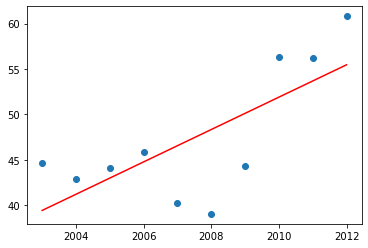

In [302]:
x = year
y = activity_hours_per_yr
x, y = np.array(x), np.array(y)

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)  

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [303]:
coefficient_of_determination = model.score(x,y)
coefficient_of_determination

0.5156310838158662

In [304]:
computer_res_emp_2003_2012_slope = model.coef_
computer_res_emp_2003_2012_slope

array([[1.78302663]])

#### 2003 - 2019 Regression

In [305]:
year = np.array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]).reshape((-1, 1))
activity_hours_per_day = np.array([computer_2003_res_emp_avg_hpd, computer_2004_res_emp_avg_hpd, computer_2005_res_emp_avg_hpd, computer_2006_res_emp_avg_hpd, computer_2007_res_emp_avg_hpd, 
                                   computer_2008_res_emp_avg_hpd, computer_2009_res_emp_avg_hpd, computer_2010_res_emp_avg_hpd, computer_2011_res_emp_avg_hpd, computer_2012_res_emp_avg_hpd,
                                 computer_2013_res_emp_avg_hpd, computer_2014_res_emp_avg_hpd, computer_2015_res_emp_avg_hpd, computer_2016_res_emp_avg_hpd, computer_2017_res_emp_avg_hpd,
                                  computer_2018_res_emp_avg_hpd, computer_2019_res_emp_avg_hpd]).reshape((-1, 1))

activity_hours_per_yr = [i * 365 for i in activity_hours_per_day]
#activity_hours_per_yr

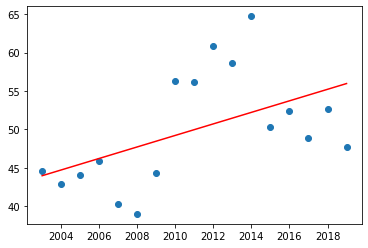

In [306]:
x = year
y = activity_hours_per_yr
x, y = np.array(x), np.array(y)

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)  

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [307]:
coefficient_of_determination = model.score(x,y)
coefficient_of_determination

0.2583023735474391

In [308]:
computer_res_emp_2003_2012_slope = model.coef_
computer_res_emp_2003_2012_slope

array([[0.74890202]])

## 2003 - 2019 Playing Games Residential - Employed

### 2003 Playing Games 

In [309]:
#120307 = Playing Games
playing_game_2003 = atus_2003_res_emp.loc[atus_2003_res_emp["TRCODEP"] == "120307"]
#playing_game_2003

In [310]:
playing_game = playing_game_2003.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
game_2003_res_emp_merged = pd.merge(playing_game, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])


game_2003_res_emp_merged["Mutiplied Weighted"] = game_2003_res_emp_merged["TUACTDUR24"] * game_2003_res_emp_merged["TUFNWGTP"]
#game_2003_res_emp_merged

In [311]:
game_2003_res_emp_weight = game_2003_res_emp_merged["Mutiplied Weighted"].sum()
game_2003_res_emp_weight

377657752864.28204

In [312]:
game_2003_res_weight_avg_hpd = game_2003_res_emp_weight / all_2003_emp_weight / 60
game_2003_res_weight_avg_hpd

0.11834233489763948

### 2004 Playing Games

In [313]:
playing_game_2004 = atus_2004_res_emp.loc[atus_2004_res_emp["TRCODEP"] == "120307"]

playing_game = playing_game_2004.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
game_2004_res_emp_merged = pd.merge(playing_game, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])


game_2004_res_emp_merged["Mutiplied Weighted"] = game_2004_res_emp_merged["TUACTDUR24"] * game_2004_res_emp_merged["TUFNWGTP"]
#game_2004_res_emp_merged

In [314]:
game_2004_res_emp_weight = game_2004_res_emp_merged["Mutiplied Weighted"].sum()

game_2004_res_weight_avg_hpd = game_2004_res_emp_weight / all_2004_emp_weight / 60
game_2004_res_weight_avg_hpd

0.1143190193856555

### 2005 Playing Games

In [315]:
playing_game_2005 = atus_2005_res_emp.loc[atus_2005_res_emp["TRCODEP"] == "120307"]

playing_game = playing_game_2005.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
game_2005_res_emp_merged = pd.merge(playing_game, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])


game_2005_res_emp_merged["Mutiplied Weighted"] = game_2005_res_emp_merged["TUACTDUR24"] * game_2005_res_emp_merged["TUFNWGTP"]
#game_2005_res_emp_merged

In [316]:
game_2005_res_emp_weight = game_2005_res_emp_merged["Mutiplied Weighted"].sum()

game_2005_res_weight_avg_hpd = game_2005_res_emp_weight / all_2005_emp_weight / 60
game_2005_res_weight_avg_hpd

0.13113248667172234

### 2006 Playing Games

In [317]:
playing_game_2006 = atus_2006_res_emp.loc[atus_2006_res_emp["TRCODEP"] == "120307"]

playing_game = playing_game_2006.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
game_2006_res_emp_merged = pd.merge(playing_game, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])


game_2006_res_emp_merged["Mutiplied Weighted"] = game_2006_res_emp_merged["TUACTDUR24"] * game_2006_res_emp_merged["TUFNWGTP"]
#game_2006_res_emp_merged

In [318]:
game_2006_res_emp_weight = game_2006_res_emp_merged["Mutiplied Weighted"].sum()

game_2006_res_weight_avg_hpd = game_2006_res_emp_weight / all_2006_emp_weight / 60
game_2006_res_weight_avg_hpd

0.11979458081115596

### 2007 Playing Games

In [319]:
playing_game_2007 = atus_2007_res_emp.loc[atus_2007_res_emp["TRCODEP"] == "120307"]

playing_game = playing_game_2007.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
game_2007_res_emp_merged = pd.merge(playing_game, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])


game_2007_res_emp_merged["Mutiplied Weighted"] = game_2007_res_emp_merged["TUACTDUR24"] * game_2007_res_emp_merged["TUFNWGTP"]
#game_2007_res_emp_merged

In [320]:
game_2007_res_emp_weight = game_2007_res_emp_merged["Mutiplied Weighted"].sum()

game_2007_res_weight_avg_hpd = game_2007_res_emp_weight / all_2007_emp_weight / 60
game_2007_res_weight_avg_hpd

0.13114605362745244

### 2008 Playing Games

In [321]:
playing_game_2008 = atus_2008_res_emp.loc[atus_2008_res_emp["TRCODEP"] == "120307"]

playing_game = playing_game_2008.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
game_2008_res_emp_merged = pd.merge(playing_game, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])


game_2008_res_emp_merged["Mutiplied Weighted"] = game_2008_res_emp_merged["TUACTDUR24"] * game_2008_res_emp_merged["TUFNWGTP"]
#game_2008_res_emp_merged

In [322]:
game_2008_res_emp_weight = game_2008_res_emp_merged["Mutiplied Weighted"].sum()

game_2008_res_weight_avg_hpd = game_2008_res_emp_weight / all_2008_emp_weight / 60
game_2008_res_weight_avg_hpd

0.1317410682022608

### 2009 Playing Games

In [323]:
playing_game_2009 = atus_2009_res_emp.loc[atus_2009_res_emp["TRCODEP"] == "120307"]

playing_game = playing_game_2009.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
game_2009_res_emp_merged = pd.merge(playing_game, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])


game_2009_res_emp_merged["Mutiplied Weighted"] = game_2009_res_emp_merged["TUACTDUR24"] * game_2009_res_emp_merged["TUFNWGTP"]
#game_2009_res_emp_merged

In [324]:
game_2009_res_emp_weight = game_2009_res_emp_merged["Mutiplied Weighted"].sum()

game_2009_res_weight_avg_hpd = game_2009_res_emp_weight / all_2009_emp_weight / 60
game_2009_res_weight_avg_hpd

0.13822623255304242

### 2010 Playing Games

In [325]:
playing_game_2010 = atus_2010_res_emp.loc[atus_2010_res_emp["TRCODEP"] == "120307"]

playing_game = playing_game_2010.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
game_2010_res_emp_merged = pd.merge(playing_game, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])


game_2010_res_emp_merged["Mutiplied Weighted"] = game_2010_res_emp_merged["TUACTDUR24"] * game_2010_res_emp_merged["TUFNWGTP"]
#game_2010_res_emp_merged

In [326]:
game_2010_res_emp_weight = game_2010_res_emp_merged["Mutiplied Weighted"].sum()

game_2010_res_weight_avg_hpd = game_2010_res_emp_weight / all_2010_emp_weight / 60
game_2010_res_weight_avg_hpd

0.14210696250985272

### 2011 Playing Games

In [327]:
playing_game_2011 = atus_2011_res_emp.loc[atus_2011_res_emp["TRCODEP"] == "120307"]

playing_game = playing_game_2011.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
game_2011_res_emp_merged = pd.merge(playing_game, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])


game_2011_res_emp_merged["Mutiplied Weighted"] = game_2011_res_emp_merged["TUACTDUR24"] * game_2011_res_emp_merged["TUFNWGTP"]
#game_2011_res_emp_merged

In [328]:
game_2011_res_emp_weight = game_2011_res_emp_merged["Mutiplied Weighted"].sum()

game_2011_res_weight_avg_hpd = game_2011_res_emp_weight / all_2011_emp_weight / 60
game_2011_res_weight_avg_hpd

0.12394052387135648

### 2012 Playing Games

In [329]:
playing_game_2012 = atus_2012_res_emp.loc[atus_2012_res_emp["TRCODEP"] == "120307"]

playing_game = playing_game_2012.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
game_2012_res_emp_merged = pd.merge(playing_game, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])


game_2012_res_emp_merged["Mutiplied Weighted"] = game_2012_res_emp_merged["TUACTDUR24"] * game_2012_res_emp_merged["TUFNWGTP"]
#game_2012_res_emp_merged

In [330]:
game_2012_res_emp_weight = game_2012_res_emp_merged["Mutiplied Weighted"].sum()

game_2012_res_weight_avg_hpd = game_2012_res_emp_weight / all_2012_emp_weight / 60
game_2012_res_weight_avg_hpd

0.13103672049725268

### 2013 Playing Games

In [331]:
playing_game_2013 = atus_2013_res_emp.loc[atus_2013_res_emp["TRCODEP"] == "120307"]

playing_game = playing_game_2013.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
game_2013_res_emp_merged = pd.merge(playing_game, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])


game_2013_res_emp_merged["Mutiplied Weighted"] = game_2013_res_emp_merged["TUACTDUR24"] * game_2013_res_emp_merged["TUFNWGTP"]
#game_2013_res_emp_merged

In [332]:
game_2013_res_emp_weight = game_2013_res_emp_merged["Mutiplied Weighted"].sum()

game_2013_res_weight_avg_hpd = game_2013_res_emp_weight / all_2013_emp_weight / 60
game_2013_res_weight_avg_hpd

0.14637280244899403

### 2014 Playing Games

In [333]:
playing_game_2014 = atus_2014_res_emp.loc[atus_2014_res_emp["TRCODEP"] == "120307"]

playing_game = playing_game_2014.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
game_2014_res_emp_merged = pd.merge(playing_game, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])


game_2014_res_emp_merged["Mutiplied Weighted"] = game_2014_res_emp_merged["TUACTDUR24"] * game_2014_res_emp_merged["TUFNWGTP"]
#game_2014_res_emp_merged

In [334]:
game_2014_res_emp_weight = game_2014_res_emp_merged["Mutiplied Weighted"].sum()

game_2014_res_weight_avg_hpd = game_2014_res_emp_weight / all_2014_emp_weight / 60
game_2014_res_weight_avg_hpd

0.15088543232853716

### 2015 Playing Games

In [335]:
playing_game_2015 = atus_2015_res_emp.loc[atus_2015_res_emp["TRCODEP"] == "120307"]

playing_game = playing_game_2015.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
game_2015_res_emp_merged = pd.merge(playing_game, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])


game_2015_res_emp_merged["Mutiplied Weighted"] = game_2015_res_emp_merged["TUACTDUR24"] * game_2015_res_emp_merged["TUFNWGTP"]
#game_2015_res_emp_merged

In [336]:
game_2015_res_emp_weight = game_2015_res_emp_merged["Mutiplied Weighted"].sum()

game_2015_res_weight_avg_hpd = game_2015_res_emp_weight / all_2015_emp_weight / 60
game_2015_res_weight_avg_hpd

0.14892192017608785

### 2016 Playing Games

In [337]:
playing_game_2016 = atus_2016_res_emp.loc[atus_2016_res_emp["TRCODEP"] == "120307"]

playing_game = playing_game_2016.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
game_2016_res_emp_merged = pd.merge(playing_game, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])


game_2016_res_emp_merged["Mutiplied Weighted"] = game_2016_res_emp_merged["TUACTDUR24"] * game_2016_res_emp_merged["TUFNWGTP"]
#game_2017_res_emp_merged

In [338]:
game_2016_res_emp_weight = game_2016_res_emp_merged["Mutiplied Weighted"].sum()

game_2016_res_weight_avg_hpd = game_2016_res_emp_weight / all_2016_emp_weight / 60
game_2016_res_weight_avg_hpd

0.16288214543108995

### 2017 Playing Games

In [339]:
playing_game_2017 = atus_2017_res_emp.loc[atus_2017_res_emp["TRCODEP"] == "120307"]

playing_game = playing_game_2017.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
game_2017_res_emp_merged = pd.merge(playing_game, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])


game_2017_res_emp_merged["Mutiplied Weighted"] = game_2017_res_emp_merged["TUACTDUR24"] * game_2017_res_emp_merged["TUFNWGTP"]
#game_2017_res_emp_merged

In [340]:
game_2017_res_emp_weight = game_2017_res_emp_merged["Mutiplied Weighted"].sum()

game_2017_res_weight_avg_hpd = game_2017_res_emp_weight / all_2017_emp_weight / 60
game_2017_res_weight_avg_hpd

0.17493143780746032

### 2018 Playing Games

In [341]:
playing_game_2018 = atus_2018_res_emp.loc[atus_2018_res_emp["TRCODEP"] == "120307"]

playing_game = playing_game_2018.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
game_2018_res_emp_merged = pd.merge(playing_game, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])


game_2018_res_emp_merged["Mutiplied Weighted"] = game_2018_res_emp_merged["TUACTDUR24"] * game_2018_res_emp_merged["TUFNWGTP"]
#game_2018_res_emp_merged

In [342]:
game_2018_res_emp_weight = game_2018_res_emp_merged["Mutiplied Weighted"].sum()

game_2018_res_weight_avg_hpd = game_2018_res_emp_weight / all_2018_emp_weight / 60
game_2018_res_weight_avg_hpd

0.22913435506700483

### 2019 Playing Games

In [343]:
playing_game_2019 = atus_2019_res_emp.loc[atus_2019_res_emp["TRCODEP"] == "120307"]

playing_game = playing_game_2019.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
game_2019_res_emp_merged = pd.merge(playing_game, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])


game_2019_res_emp_merged["Mutiplied Weighted"] = game_2019_res_emp_merged["TUACTDUR24"] * game_2019_res_emp_merged["TUFNWGTP"]
#game_2019_res_emp_merged

In [344]:
game_2019_res_emp_weight = game_2019_res_emp_merged["Mutiplied Weighted"].sum()

game_2019_res_weight_avg_hpd = game_2019_res_emp_weight / all_2019_emp_weight / 60
game_2019_res_weight_avg_hpd

0.18802302650640293

### Playing Games Regression

#### 2003-2012 Regression

In [345]:
year = np.array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012]).reshape((-1, 1))
activity_hours_per_day = np.array([game_2003_res_weight_avg_hpd, game_2004_res_weight_avg_hpd, game_2005_res_weight_avg_hpd,
                                   game_2006_res_weight_avg_hpd, game_2007_res_weight_avg_hpd, game_2008_res_weight_avg_hpd,
                                   game_2009_res_weight_avg_hpd, game_2010_res_weight_avg_hpd, game_2011_res_weight_avg_hpd,
                                   game_2012_res_weight_avg_hpd]).reshape((-1, 1))

activity_hours_per_yr = [i * 365 for i in activity_hours_per_day]
#activity_hours_per_yr

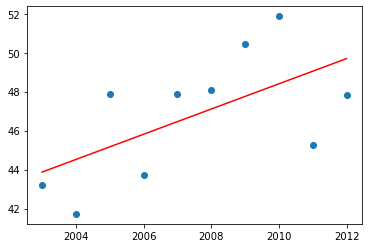

In [346]:
x = year
y = activity_hours_per_yr
x, y = np.array(x), np.array(y)

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)  

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [347]:
coefficient_of_determination = model.score(x,y)
coefficient_of_determination

0.3645880179305897

In [348]:
game_res_emp_2003_2012_slope = model.coef_
game_res_emp_2003_2012_slope

array([[0.64674096]])

#### 2003-2019 Regression

In [349]:
year = np.array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]).reshape((-1, 1))
activity_hours_per_day = np.array([game_2003_res_weight_avg_hpd, game_2004_res_weight_avg_hpd, game_2005_res_weight_avg_hpd,
                                   game_2006_res_weight_avg_hpd, game_2007_res_weight_avg_hpd, game_2008_res_weight_avg_hpd,
                                   game_2009_res_weight_avg_hpd, game_2010_res_weight_avg_hpd, game_2011_res_weight_avg_hpd,
                                   game_2012_res_weight_avg_hpd, game_2013_res_weight_avg_hpd, game_2014_res_weight_avg_hpd,
                                   game_2015_res_weight_avg_hpd, game_2016_res_weight_avg_hpd, game_2017_res_weight_avg_hpd,
                                   game_2018_res_weight_avg_hpd, game_2019_res_weight_avg_hpd]).reshape((-1, 1))

activity_hours_per_yr = [i * 365 for i in activity_hours_per_day]
#activity_hours_per_yr

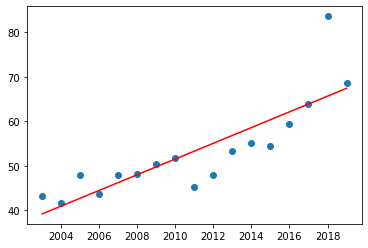

In [350]:
x = year
y = activity_hours_per_yr
x, y = np.array(x), np.array(y)

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)  

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [351]:
coefficient_of_determination = model.score(x,y)
coefficient_of_determination

0.6955987265860049

In [352]:
game_res_emp_2003_2012_slope = model.coef_
game_res_emp_2003_2012_slope

array([[1.76518998]])

### 2003-2019 Reading for Personal Interest Residential - Employed

### 2003 Reading for Personal Interest

In [353]:
#120312 = Playing Games
reading_2003 = atus_2003_res_emp.loc[atus_2003_res_emp["TRCODEP"] == "120312"]

reading = reading_2003.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
reading_2003_res_emp_merged = pd.merge(reading, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

reading_2003_res_emp_merged["Mutiplied Weighted"] = reading_2003_res_emp_merged["TUACTDUR24"] * reading_2003_res_emp_merged["TUFNWGTP"]
#reading_2003_merged

In [354]:
reading_2003_res_emp_weight = reading_2003_res_emp_merged["Mutiplied Weighted"].sum()

reading_2003_res_emp_hpd = reading_2003_res_emp_weight / all_2003_emp_weight/60

reading_2003_res_emp_hpd

0.2347186665817878

### 2004 Reading for Personal Interest

In [355]:
reading_2004 = atus_2004_res_emp.loc[atus_2004_res_emp["TRCODEP"] == "120312"]

reading = reading_2004.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
reading_2004_res_emp_merged = pd.merge(reading, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

reading_2004_res_emp_merged["Mutiplied Weighted"] = reading_2004_res_emp_merged["TUACTDUR24"] * reading_2004_res_emp_merged["TUFNWGTP"]
#reading_2004_merged

In [356]:
reading_2004_res_emp_weight = reading_2004_res_emp_merged["Mutiplied Weighted"].sum()

reading_2004_res_emp_hpd = reading_2004_res_emp_weight / all_2004_emp_weight/60

reading_2004_res_emp_hpd

0.23954930105269187

### 2005 Reading for Personal Interest

In [357]:
reading_2005 = atus_2005_res_emp.loc[atus_2005_res_emp["TRCODEP"] == "120312"]

reading = reading_2005.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
reading_2005_res_emp_merged = pd.merge(reading, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

reading_2005_res_emp_merged["Mutiplied Weighted"] = reading_2005_res_emp_merged["TUACTDUR24"] * reading_2005_res_emp_merged["TUFNWGTP"]
#reading_2005_merged

In [358]:
reading_2005_res_emp_weight = reading_2005_res_emp_merged["Mutiplied Weighted"].sum()

reading_2005_res_emp_hpd = reading_2005_res_emp_weight / all_2005_emp_weight/60
reading_2005_res_emp_hpd

0.2334064063638325

### 2006 Reading for Personal Interest

In [359]:
reading_2006 = atus_2006_res_emp.loc[atus_2006_res_emp["TRCODEP"] == "120312"]

reading = reading_2006.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
reading_2006_res_emp_merged = pd.merge(reading, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

reading_2006_res_emp_merged["Mutiplied Weighted"] = reading_2006_res_emp_merged["TUACTDUR24"] * reading_2006_res_emp_merged["TUFNWGTP"]
#reading_2006_merged

In [360]:
reading_2006_res_emp_weight = reading_2006_res_emp_merged["Mutiplied Weighted"].sum()

reading_2006_res_emp_hpd = reading_2006_res_emp_weight / all_2006_emp_weight/60
reading_2006_res_emp_hpd

0.23449654025213623

### 2007 Reading for Personal Interest

In [361]:
reading_2007 = atus_2007_res_emp.loc[atus_2007_res_emp["TRCODEP"] == "120312"]

reading = reading_2007.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
reading_2007_res_emp_merged = pd.merge(reading, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

reading_2007_res_emp_merged["Mutiplied Weighted"] = reading_2007_res_emp_merged["TUACTDUR24"] * reading_2007_res_emp_merged["TUFNWGTP"]
#reading_2007_merged

In [362]:
reading_2007_res_emp_weight = reading_2007_res_emp_merged["Mutiplied Weighted"].sum()

reading_2007_res_emp_hpd = reading_2007_res_emp_weight / all_2007_emp_weight/60
reading_2007_res_emp_hpd

0.20726947788878552

### 2008 Reading for Personal Interest

In [363]:
reading_2008 = atus_2008_res_emp.loc[atus_2008_res_emp["TRCODEP"] == "120312"]

reading = reading_2008.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
reading_2008_res_emp_merged = pd.merge(reading, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

reading_2008_res_emp_merged["Mutiplied Weighted"] = reading_2008_res_emp_merged["TUACTDUR24"] * reading_2008_res_emp_merged["TUFNWGTP"]
#reading_2008_merged

In [364]:
reading_2008_res_emp_weight = reading_2008_res_emp_merged["Mutiplied Weighted"].sum()

reading_2008_res_emp_hpd = reading_2008_res_emp_weight / all_2008_emp_weight/60
reading_2008_res_emp_hpd

0.22343375911137883

### 2009 Reading for Personal Interest

In [365]:
reading_2009 = atus_2009_res_emp.loc[atus_2009_res_emp["TRCODEP"] == "120312"]

reading = reading_2009.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
reading_2009_res_emp_merged = pd.merge(reading, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

reading_2009_res_emp_merged["Mutiplied Weighted"] = reading_2009_res_emp_merged["TUACTDUR24"] * reading_2009_res_emp_merged["TUFNWGTP"]
#reading_2009_merged

In [366]:
reading_2009_res_emp_weight = reading_2009_res_emp_merged["Mutiplied Weighted"].sum()

reading_2009_res_emp_hpd = reading_2009_res_emp_weight / all_2009_emp_weight/60
reading_2009_res_emp_hpd

0.21859334862924534

### 2010 Reading for Personal Interest

In [367]:
reading_2010 = atus_2010_res_emp.loc[atus_2010_res_emp["TRCODEP"] == "120312"]

reading = reading_2010.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
reading_2010_res_emp_merged = pd.merge(reading, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

reading_2010_res_emp_merged["Mutiplied Weighted"] = reading_2010_res_emp_merged["TUACTDUR24"] * reading_2010_res_emp_merged["TUFNWGTP"]
#reading_2010_merged

In [368]:
reading_2010_res_emp_weight = reading_2010_res_emp_merged["Mutiplied Weighted"].sum()

reading_2010_res_emp_hpd = reading_2010_res_emp_weight / all_2010_emp_weight/60
reading_2010_res_emp_hpd

0.195628488857153

### 2011 Reading for Personal Interest

In [369]:
reading_2011 = atus_2011_res_emp.loc[atus_2011_res_emp["TRCODEP"] == "120312"]

reading = reading_2011.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
reading_2011_res_emp_merged = pd.merge(reading, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

reading_2011_res_emp_merged["Mutiplied Weighted"] = reading_2011_res_emp_merged["TUACTDUR24"] * reading_2011_res_emp_merged["TUFNWGTP"]
#reading_2011_merged

In [370]:
reading_2011_res_emp_weight = reading_2011_res_emp_merged["Mutiplied Weighted"].sum()

reading_2011_res_emp_hpd = reading_2011_res_emp_weight / all_2011_emp_weight/60
reading_2011_res_emp_hpd

0.18341354450767833

### 2012 Reading for Personal Interest

In [371]:
reading_2012 = atus_2012_res_emp.loc[atus_2012_res_emp["TRCODEP"] == "120312"]

reading = reading_2012.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
reading_2012_res_emp_merged = pd.merge(reading, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

reading_2012_res_emp_merged["Mutiplied Weighted"] = reading_2012_res_emp_merged["TUACTDUR24"] * reading_2012_res_emp_merged["TUFNWGTP"]
#reading_2012_merged

In [372]:
reading_2012_res_emp_weight = reading_2012_res_emp_merged["Mutiplied Weighted"].sum()

reading_2012_res_emp_hpd = reading_2012_res_emp_weight / all_2012_emp_weight/60
reading_2012_res_emp_hpd

0.20822113721180713

### 2013 Reading for Personal Interest

In [373]:
reading_2013 = atus_2013_res_emp.loc[atus_2013_res_emp["TRCODEP"] == "120312"]

reading = reading_2013.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
reading_2013_res_emp_merged = pd.merge(reading, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

reading_2013_res_emp_merged["Mutiplied Weighted"] = reading_2013_res_emp_merged["TUACTDUR24"] * reading_2013_res_emp_merged["TUFNWGTP"]
#reading_2013_merged

In [374]:
reading_2013_res_emp_weight = reading_2013_res_emp_merged["Mutiplied Weighted"].sum()

reading_2013_res_emp_hpd = reading_2013_res_emp_weight / all_2013_emp_weight/60
reading_2013_res_emp_hpd

0.19482848028949631

### 2014 Reading for Personal Interest

In [375]:
reading_2014 = atus_2014_res_emp.loc[atus_2014_res_emp["TRCODEP"] == "120312"]

reading = reading_2014.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
reading_2014_res_emp_merged = pd.merge(reading, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

reading_2014_res_emp_merged["Mutiplied Weighted"] = reading_2014_res_emp_merged["TUACTDUR24"] * reading_2014_res_emp_merged["TUFNWGTP"]
#reading_2014_merged

In [376]:
reading_2014_res_emp_weight = reading_2014_res_emp_merged["Mutiplied Weighted"].sum()

reading_2014_res_emp_hpd = reading_2014_res_emp_weight / all_2014_emp_weight/60
reading_2014_res_emp_hpd

0.18097739801713736

### 2015 Reading for Personal Interest

In [377]:
reading_2015 = atus_2015_res_emp.loc[atus_2015_res_emp["TRCODEP"] == "120312"]

reading = reading_2015.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
reading_2015_res_emp_merged = pd.merge(reading, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

reading_2015_res_emp_merged["Mutiplied Weighted"] = reading_2015_res_emp_merged["TUACTDUR24"] * reading_2015_res_emp_merged["TUFNWGTP"]
#reading_2015_merged

In [378]:
reading_2015_res_emp_weight = reading_2015_res_emp_merged["Mutiplied Weighted"].sum()

reading_2015_res_emp_hpd = reading_2015_res_emp_weight / all_2015_emp_weight/60
reading_2015_res_emp_hpd

0.18651592314090917

### 2016 Reading for Personal Interest

In [379]:
reading_2016 = atus_2016_res_emp.loc[atus_2016_res_emp["TRCODEP"] == "120312"]

reading = reading_2016.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
reading_2016_res_emp_merged = pd.merge(reading, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

reading_2016_res_emp_merged["Mutiplied Weighted"] = reading_2016_res_emp_merged["TUACTDUR24"] * reading_2016_res_emp_merged["TUFNWGTP"]
#reading_2016_merged

In [380]:
reading_2016_res_emp_weight = reading_2016_res_emp_merged["Mutiplied Weighted"].sum()

reading_2016_res_emp_hpd = reading_2016_res_emp_weight / all_2016_emp_weight/60
reading_2016_res_emp_hpd

0.1909406103852508

### 2017 Reading for Personal Interest

In [381]:
reading_2017 = atus_2017_res_emp.loc[atus_2017_res_emp["TRCODEP"] == "120312"]

reading = reading_2017.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
reading_2017_res_emp_merged = pd.merge(reading, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

reading_2017_res_emp_merged["Mutiplied Weighted"] = reading_2017_res_emp_merged["TUACTDUR24"] * reading_2017_res_emp_merged["TUFNWGTP"]
#reading_2017_merged

In [382]:
reading_2017_res_emp_weight = reading_2017_res_emp_merged["Mutiplied Weighted"].sum()

reading_2017_res_emp_hpd = reading_2017_res_emp_weight / all_2017_emp_weight/60
reading_2017_res_emp_hpd

0.1666010232686902

### 2018 Reading for Personal Interest

In [383]:
reading_2018 = atus_2018_res_emp.loc[atus_2018_res_emp["TRCODEP"] == "120312"]

reading = reading_2018.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
reading_2018_res_emp_merged = pd.merge(reading, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

reading_2018_res_emp_merged["Mutiplied Weighted"] = reading_2018_res_emp_merged["TUACTDUR24"] * reading_2018_res_emp_merged["TUFNWGTP"]
#reading_2018_merged

In [384]:
reading_2018_res_emp_weight = reading_2018_res_emp_merged["Mutiplied Weighted"].sum()

reading_2018_res_emp_hpd = reading_2018_res_emp_weight / all_2018_emp_weight/60
reading_2018_res_emp_hpd

0.15705693150292407

### 2019 Reading for Personal Interest

In [385]:
reading_2019 = atus_2019_res_emp.loc[atus_2019_res_emp["TRCODEP"] == "120312"]

reading = reading_2019.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
reading_2019_res_emp_merged = pd.merge(reading, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

reading_2019_res_emp_merged["Mutiplied Weighted"] = reading_2019_res_emp_merged["TUACTDUR24"] * reading_2019_res_emp_merged["TUFNWGTP"]
#reading_2019_merged

In [386]:
reading_2019_res_emp_weight = reading_2019_res_emp_merged["Mutiplied Weighted"].sum()

reading_2019_res_emp_hpd = reading_2019_res_emp_weight / all_2019_emp_weight/60
reading_2019_res_emp_hpd

0.1608769950859375

### Reading for Personal Interest Regression

#### 2003-2012 Regression

In [387]:
year = np.array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012]).reshape((-1, 1))
activity_hours_per_day = np.array([reading_2003_res_emp_hpd, reading_2004_res_emp_hpd, reading_2005_res_emp_hpd, reading_2006_res_emp_hpd,
                                   reading_2007_res_emp_hpd, reading_2008_res_emp_hpd, reading_2009_res_emp_hpd, reading_2010_res_emp_hpd,
                                   reading_2011_res_emp_hpd, reading_2012_res_emp_hpd]).reshape((-1, 1))
                                  

activity_hours_per_yr = [i * 365 for i in activity_hours_per_day]
#activity_hours_per_yr

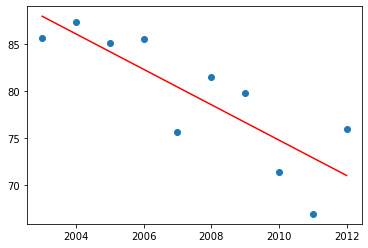

In [388]:
x = year
y = activity_hours_per_yr
x, y = np.array(x), np.array(y)

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)  

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [389]:
coefficient_of_determination = model.score(x,y) #R sqaure value 
coefficient_of_determination

0.6892181794999356

In [390]:
reading_res_emp_2003_2012_slope = model.coef_
reading_res_emp_2003_2012_slope

array([[-1.88442408]])

#### 2003-2019 Regression

In [391]:
year = np.array([2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]).reshape((-1, 1))
activity_hours_per_day = np.array([reading_2003_res_emp_hpd, reading_2004_res_emp_hpd, reading_2005_res_emp_hpd, reading_2006_res_emp_hpd,
                                   reading_2007_res_emp_hpd, reading_2008_res_emp_hpd, reading_2009_res_emp_hpd, reading_2010_res_emp_hpd,
                                   reading_2011_res_emp_hpd, reading_2012_res_emp_hpd, reading_2013_res_emp_hpd, reading_2014_res_emp_hpd,
                                   reading_2015_res_emp_hpd, reading_2016_res_emp_hpd, reading_2017_res_emp_hpd, reading_2018_res_emp_hpd,
                                   reading_2019_res_emp_hpd]).reshape((-1, 1))
                                           

activity_hours_per_yr = [i * 365 for i in activity_hours_per_day]
#activity_hours_per_yr

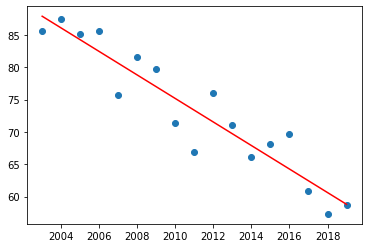

In [392]:
x = year
y = activity_hours_per_yr
x, y = np.array(x), np.array(y)

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)  

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [393]:
coefficient_of_determination = model.score(x,y) #R sqaure value 
coefficient_of_determination

0.8792183124839128

In [394]:
reading_res_emp_2003_2019_slope = model.coef_
reading_res_emp_2003_2019_slope

array([[-1.8179436]])

## 2003-2019 Non-Residential- Employed

In [395]:
#non-residential = 2,4,5,6,7,8,9,10,11,30,31,32

In [396]:
#only residential location from 2003-2019
non_residential_location = [2,4,5,6,7,8,9,10,11,30,31,32]
atus_multi_yr_non_res_emp = multi_merged_employed[multi_merged_employed["TEWHERE"].isin(non_residential_location)]
#atus_multi_yr_non_res_emp

In [397]:
#atus non residential year seperation by employed population 
atus_2003_non_res_emp = atus_multi_yr_non_res_emp[atus_multi_yr_non_res_emp["TUCASEID"].apply(str).str.startswith("2003")]
atus_2004_non_res_emp = atus_multi_yr_non_res_emp[atus_multi_yr_non_res_emp["TUCASEID"].apply(str).str.startswith("2004")]
atus_2005_non_res_emp = atus_multi_yr_non_res_emp[atus_multi_yr_non_res_emp["TUCASEID"].apply(str).str.startswith("2005")]
atus_2006_non_res_emp = atus_multi_yr_non_res_emp[atus_multi_yr_non_res_emp["TUCASEID"].apply(str).str.startswith("2006")]
atus_2007_non_res_emp = atus_multi_yr_non_res_emp[atus_multi_yr_non_res_emp["TUCASEID"].apply(str).str.startswith("2007")]
atus_2008_non_res_emp = atus_multi_yr_non_res_emp[atus_multi_yr_non_res_emp["TUCASEID"].apply(str).str.startswith("2008")]
atus_2009_non_res_emp = atus_multi_yr_non_res_emp[atus_multi_yr_non_res_emp["TUCASEID"].apply(str).str.startswith("2009")]
atus_2010_non_res_emp = atus_multi_yr_non_res_emp[atus_multi_yr_non_res_emp["TUCASEID"].apply(str).str.startswith("2010")]
atus_2011_non_res_emp = atus_multi_yr_non_res_emp[atus_multi_yr_non_res_emp["TUCASEID"].apply(str).str.startswith("2011")]
atus_2012_non_res_emp = atus_multi_yr_non_res_emp[atus_multi_yr_non_res_emp["TUCASEID"].apply(str).str.startswith("2012")]
atus_2013_non_res_emp = atus_multi_yr_non_res_emp[atus_multi_yr_non_res_emp["TUCASEID"].apply(str).str.startswith("2013")]
atus_2014_non_res_emp = atus_multi_yr_non_res_emp[atus_multi_yr_non_res_emp["TUCASEID"].apply(str).str.startswith("2014")]
atus_2015_non_res_emp = atus_multi_yr_non_res_emp[atus_multi_yr_non_res_emp["TUCASEID"].apply(str).str.startswith("2015")]
atus_2016_non_res_emp = atus_multi_yr_non_res_emp[atus_multi_yr_non_res_emp["TUCASEID"].apply(str).str.startswith("2016")]
atus_2017_non_res_emp = atus_multi_yr_non_res_emp[atus_multi_yr_non_res_emp["TUCASEID"].apply(str).str.startswith("2017")]
atus_2018_non_res_emp = atus_multi_yr_non_res_emp[atus_multi_yr_non_res_emp["TUCASEID"].apply(str).str.startswith("2018")]
atus_2019_non_res_emp = atus_multi_yr_non_res_emp[atus_multi_yr_non_res_emp["TUCASEID"].apply(str).str.startswith("2019")]

### 2003 Work, Main Job Non Residential- Employed

In [398]:
#050101 is Work, main job
atus_2003_non_res_work_emp = atus_2003_non_res_emp.loc[atus_2003_non_res_emp.TRCODEP == "050101"]
#atus_2003_non_res_work_emp

In [399]:
work = atus_2003_non_res_work_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#work

In [400]:
work_2003_non_res_emp_merge = pd.merge(work, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#work_2003_non_res_emp_merge

In [401]:
work_2003_non_res_emp_merge["Mutiplied Weighted"] = work_2003_non_res_emp_merge["TUACTDUR24"] * work_2003_non_res_emp_merge["TUFNWGTP"]
#work_2003_non_res_emp_merge

In [402]:
work_2003_non_res_emp_weight = work_2003_non_res_emp_merge["Mutiplied Weighted"].sum()
work_2003_non_res_emp_weight

14848181335967.852

In [403]:
#weight from all respondants in from 2003
atus_2003_drop = atus_2003.drop_duplicates(subset=["TUCASEID"])
all_2003_non_res_emp_weight = atus_2003_drop["TUFNWGTP"].sum()
all_2003_non_res_emp_weight

53187186872.01529

In [404]:
work_2003_non_res_emp_minutes_per_day = work_2003_non_res_emp_weight/all_2003_non_res_emp_weight
work_2003_non_res_emp_minutes_per_day

279.1683901556429

In [405]:
#hpd = hour per day
work_2003_non_res_emp_hpd = work_2003_non_res_emp_minutes_per_day / 60
work_2003_non_res_emp_hpd

4.652806502594048

### 2004 Work, Main Job Non Residential- Employed

In [406]:
atus_2004_non_res_work_emp = atus_2004_non_res_emp.loc[atus_2004_non_res_emp.TRCODEP == "050101"]

work = atus_2004_non_res_work_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])

work_2004_non_res_emp_merge = pd.merge(work, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
work_2004_non_res_emp_merge["Mutiplied Weighted"] = work_2004_non_res_emp_merge["TUACTDUR24"] * work_2004_non_res_emp_merge["TUFNWGTP"]

In [407]:
work_2004_non_res_emp_weight = work_2004_non_res_emp_merge["Mutiplied Weighted"].sum()
work_2004_non_res_emp_weight

atus_2004_drop = atus_2004.drop_duplicates(subset=["TUCASEID"])
all_2004_non_res_emp_weight = atus_2004_drop["TUFNWGTP"].sum()

In [408]:
work_2004_non_res_emp_hpd = work_2004_non_res_emp_weight / all_2004_non_res_emp_weight / 60
work_2004_non_res_emp_hpd

4.667982747104644

### 2005 Work, Main Job Non Residential- Employed

In [409]:
atus_2005_non_res_work_emp = atus_2005_non_res_emp.loc[atus_2005_non_res_emp.TRCODEP == "050101"]

work = atus_2005_non_res_work_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])

work_2005_non_res_emp_merge = pd.merge(work, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
work_2005_non_res_emp_merge["Mutiplied Weighted"] = work_2005_non_res_emp_merge["TUACTDUR24"] * work_2005_non_res_emp_merge["TUFNWGTP"]

In [410]:
work_2005_non_res_emp_weight = work_2005_non_res_emp_merge["Mutiplied Weighted"].sum()
work_2005_non_res_emp_weight

atus_2005_drop = atus_2005.drop_duplicates(subset=["TUCASEID"])
all_2005_non_res_emp_weight = atus_2005_drop["TUFNWGTP"].sum()

In [411]:
work_2005_non_res_emp_hpd = work_2005_non_res_emp_weight / all_2005_non_res_emp_weight / 60
work_2005_non_res_emp_hpd

4.62812556788408

### 2006 Work, Main Job Non Residential- Employed

In [412]:
atus_2006_non_res_work_emp = atus_2006_non_res_emp.loc[atus_2006_non_res_emp.TRCODEP == "050101"]

work = atus_2006_non_res_work_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])

work_2006_non_res_emp_merge = pd.merge(work, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
work_2006_non_res_emp_merge["Mutiplied Weighted"] = work_2006_non_res_emp_merge["TUACTDUR24"] * work_2006_non_res_emp_merge["TUFNWGTP"]

In [413]:
work_2006_non_res_emp_weight = work_2006_non_res_emp_merge["Mutiplied Weighted"].sum()
work_2006_non_res_emp_weight

atus_2006_drop = atus_2006.drop_duplicates(subset=["TUCASEID"])
all_2006_non_res_emp_weight = atus_2006_drop["TUFNWGTP"].sum()

In [414]:
work_2006_non_res_emp_hpd = work_2006_non_res_emp_weight / all_2006_non_res_emp_weight / 60
work_2006_non_res_emp_hpd

4.705754654881947

### 2007 Work, Main Job Non Residential- Employed

In [415]:
atus_2007_non_res_work_emp = atus_2007_non_res_emp.loc[atus_2007_non_res_emp.TRCODEP == "050101"]

work = atus_2007_non_res_work_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])

work_2007_non_res_emp_merge = pd.merge(work, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
work_2007_non_res_emp_merge["Mutiplied Weighted"] = work_2007_non_res_emp_merge["TUACTDUR24"] * work_2007_non_res_emp_merge["TUFNWGTP"]

In [416]:
work_2007_non_res_emp_weight = work_2007_non_res_emp_merge["Mutiplied Weighted"].sum()
work_2007_non_res_emp_weight

atus_2007_drop = atus_2007.drop_duplicates(subset=["TUCASEID"])
all_2007_non_res_emp_weight = atus_2007_drop["TUFNWGTP"].sum()

In [417]:
work_2007_non_res_emp_hpd = work_2007_non_res_emp_weight / all_2007_non_res_emp_weight / 60
work_2007_non_res_emp_hpd

4.706907832780482

### 2008 Work, Main Job Non Residential- Employed

In [418]:
atus_2008_non_res_work_emp = atus_2008_non_res_emp.loc[atus_2008_non_res_emp.TRCODEP == "050101"]

work = atus_2008_non_res_work_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])

work_2008_non_res_emp_merge = pd.merge(work, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
work_2008_non_res_emp_merge["Mutiplied Weighted"] = work_2008_non_res_emp_merge["TUACTDUR24"] * work_2008_non_res_emp_merge["TUFNWGTP"]

In [419]:
work_2008_non_res_emp_weight = work_2008_non_res_emp_merge["Mutiplied Weighted"].sum()
work_2008_non_res_emp_weight

atus_2008_drop = atus_2008.drop_duplicates(subset=["TUCASEID"])
all_2008_non_res_emp_weight = atus_2008_drop["TUFNWGTP"].sum()

In [420]:
work_2008_non_res_emp_hpd = work_2008_non_res_emp_weight / all_2008_non_res_emp_weight / 60
work_2008_non_res_emp_hpd

4.576502916130981

### 2009 Work, Main Job Non Residential- Employed

In [421]:
atus_2009_non_res_work_emp = atus_2009_non_res_emp.loc[atus_2009_non_res_emp.TRCODEP == "050101"]

work = atus_2009_non_res_work_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])

work_2009_non_res_emp_merge = pd.merge(work, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
work_2009_non_res_emp_merge["Mutiplied Weighted"] = work_2009_non_res_emp_merge["TUACTDUR24"] * work_2009_non_res_emp_merge["TUFNWGTP"]

In [422]:
work_2009_non_res_emp_weight = work_2009_non_res_emp_merge["Mutiplied Weighted"].sum()
work_2009_non_res_emp_weight

atus_2009_drop = atus_2009.drop_duplicates(subset=["TUCASEID"])
all_2009_non_res_emp_weight = atus_2009_drop["TUFNWGTP"].sum()

In [423]:
work_2009_non_res_emp_hpd = work_2009_non_res_emp_weight / all_2009_non_res_emp_weight / 60
work_2009_non_res_emp_hpd

4.450647072834839

### 2010 Work, Main Job Non Residential- Employed

In [424]:
atus_2010_non_res_work_emp = atus_2010_non_res_emp.loc[atus_2010_non_res_emp.TRCODEP == "050101"]

work = atus_2010_non_res_work_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])

work_2010_non_res_emp_merge = pd.merge(work, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
work_2010_non_res_emp_merge["Mutiplied Weighted"] = work_2010_non_res_emp_merge["TUACTDUR24"] * work_2010_non_res_emp_merge["TUFNWGTP"]

In [425]:
work_2010_non_res_emp_weight = work_2010_non_res_emp_merge["Mutiplied Weighted"].sum()
work_2010_non_res_emp_weight

atus_2010_drop = atus_2010.drop_duplicates(subset=["TUCASEID"])
all_2010_non_res_emp_weight = atus_2010_drop["TUFNWGTP"].sum()

In [426]:
work_2010_non_res_emp_hpd = work_2010_non_res_emp_weight / all_2010_non_res_emp_weight / 60
work_2010_non_res_emp_hpd

4.485890365299347

### 2011 Work, Main Job Non Residential- Employed

In [427]:
atus_2011_non_res_work_emp = atus_2011_non_res_emp.loc[atus_2011_non_res_emp.TRCODEP == "050101"]

work = atus_2011_non_res_work_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])

work_2011_non_res_emp_merge = pd.merge(work, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
work_2011_non_res_emp_merge["Mutiplied Weighted"] = work_2011_non_res_emp_merge["TUACTDUR24"] * work_2011_non_res_emp_merge["TUFNWGTP"]

In [428]:
work_2011_non_res_emp_weight = work_2011_non_res_emp_merge["Mutiplied Weighted"].sum()
work_2011_non_res_emp_weight

atus_2011_drop = atus_2011.drop_duplicates(subset=["TUCASEID"])
all_2011_non_res_emp_weight = atus_2011_drop["TUFNWGTP"].sum()

In [429]:
work_2011_non_res_emp_hpd = work_2011_non_res_emp_weight / all_2011_non_res_emp_weight / 60
work_2011_non_res_emp_hpd

4.570070796155762

### 2012 Work, Main Job Non Residential- Employed

In [430]:
atus_2012_non_res_work_emp = atus_2012_non_res_emp.loc[atus_2012_non_res_emp.TRCODEP == "050101"]

work = atus_2012_non_res_work_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])

work_2012_non_res_emp_merge = pd.merge(work, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
work_2012_non_res_emp_merge["Mutiplied Weighted"] = work_2012_non_res_emp_merge["TUACTDUR24"] * work_2012_non_res_emp_merge["TUFNWGTP"]

In [431]:
work_2012_non_res_emp_weight = work_2012_non_res_emp_merge["Mutiplied Weighted"].sum()
work_2012_non_res_emp_weight

atus_2012_drop = atus_2012.drop_duplicates(subset=["TUCASEID"])
all_2012_non_res_emp_weight = atus_2012_drop["TUFNWGTP"].sum()

In [432]:
work_2012_non_res_emp_hpd = work_2012_non_res_emp_weight / all_2012_non_res_emp_weight / 60
work_2012_non_res_emp_hpd

4.554239930214818

### 2013 Work, Main Job Non Residential- Employed

In [433]:
atus_2013_non_res_work_emp = atus_2013_non_res_emp.loc[atus_2013_non_res_emp.TRCODEP == "050101"]

work = atus_2013_non_res_work_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])

work_2013_non_res_emp_merge = pd.merge(work, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
work_2013_non_res_emp_merge["Mutiplied Weighted"] = work_2013_non_res_emp_merge["TUACTDUR24"] * work_2013_non_res_emp_merge["TUFNWGTP"]

In [434]:
work_2013_non_res_emp_weight = work_2013_non_res_emp_merge["Mutiplied Weighted"].sum()
work_2013_non_res_emp_weight

atus_2013_drop = atus_2013.drop_duplicates(subset=["TUCASEID"])
all_2013_non_res_emp_weight = atus_2013_drop["TUFNWGTP"].sum()

In [435]:
work_2013_non_res_emp_hpd = work_2013_non_res_emp_weight / all_2013_non_res_emp_weight / 60
work_2013_non_res_emp_hpd

4.4873402771262265

### 2014 Work, Main Job Non Residential- Employed

In [436]:
atus_2014_non_res_work_emp = atus_2014_non_res_emp.loc[atus_2014_non_res_emp.TRCODEP == "050101"]

work = atus_2014_non_res_work_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])

work_2014_non_res_emp_merge = pd.merge(work, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
work_2014_non_res_emp_merge["Mutiplied Weighted"] = work_2014_non_res_emp_merge["TUACTDUR24"] * work_2014_non_res_emp_merge["TUFNWGTP"]

In [437]:
work_2014_non_res_emp_weight = work_2014_non_res_emp_merge["Mutiplied Weighted"].sum()
work_2014_non_res_emp_weight

atus_2014_drop = atus_2014.drop_duplicates(subset=["TUCASEID"])
all_2014_non_res_emp_weight = atus_2014_drop["TUFNWGTP"].sum()

In [438]:
work_2014_non_res_emp_hpd = work_2014_non_res_emp_weight / all_2014_non_res_emp_weight / 60
work_2014_non_res_emp_hpd

4.661962558391975

### 2015 Work, Main Job Non Residential- Employed

In [439]:
atus_2015_non_res_work_emp = atus_2015_non_res_emp.loc[atus_2015_non_res_emp.TRCODEP == "050101"]

work = atus_2015_non_res_work_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])

work_2015_non_res_emp_merge = pd.merge(work, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
work_2015_non_res_emp_merge["Mutiplied Weighted"] = work_2015_non_res_emp_merge["TUACTDUR24"] * work_2015_non_res_emp_merge["TUFNWGTP"]

In [440]:
work_2015_non_res_emp_weight = work_2015_non_res_emp_merge["Mutiplied Weighted"].sum()
work_2015_non_res_emp_weight

atus_2015_drop = atus_2015.drop_duplicates(subset=["TUCASEID"])
all_2015_non_res_emp_weight = atus_2015_drop["TUFNWGTP"].sum()

In [441]:
work_2015_non_res_emp_hpd = work_2015_non_res_emp_weight / all_2015_non_res_emp_weight / 60
work_2015_non_res_emp_hpd

4.488046501687274

### 2016 Work, Main Job Non Residential- Employed

In [442]:
atus_2016_non_res_work_emp = atus_2016_non_res_emp.loc[atus_2016_non_res_emp.TRCODEP == "050101"]

work = atus_2016_non_res_work_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])

work_2016_non_res_emp_merge = pd.merge(work, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
work_2016_non_res_emp_merge["Mutiplied Weighted"] = work_2016_non_res_emp_merge["TUACTDUR24"] * work_2016_non_res_emp_merge["TUFNWGTP"]

In [443]:
work_2016_non_res_emp_weight = work_2016_non_res_emp_merge["Mutiplied Weighted"].sum()
work_2016_non_res_emp_weight

atus_2016_drop = atus_2016.drop_duplicates(subset=["TUCASEID"])
all_2016_non_res_emp_weight = atus_2016_drop["TUFNWGTP"].sum()

In [444]:
work_2016_non_res_emp_hpd = work_2016_non_res_emp_weight / all_2016_non_res_emp_weight / 60
work_2016_non_res_emp_hpd

4.549602779606514

### 2017 Work, Main Job Non Residential- Employed

In [445]:
atus_2017_non_res_work_emp = atus_2017_non_res_emp.loc[atus_2017_non_res_emp.TRCODEP == "050101"]

work = atus_2017_non_res_work_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])

work_2017_non_res_emp_merge = pd.merge(work, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
work_2017_non_res_emp_merge["Mutiplied Weighted"] = work_2017_non_res_emp_merge["TUACTDUR24"] * work_2017_non_res_emp_merge["TUFNWGTP"]

In [446]:
work_2017_non_res_emp_weight = work_2017_non_res_emp_merge["Mutiplied Weighted"].sum()
work_2017_non_res_emp_weight

atus_2017_drop = atus_2017.drop_duplicates(subset=["TUCASEID"])
all_2017_non_res_emp_weight = atus_2017_drop["TUFNWGTP"].sum()

In [447]:
work_2017_non_res_emp_hpd = work_2017_non_res_emp_weight / all_2017_non_res_emp_weight / 60
work_2017_non_res_emp_hpd

4.47153444806593

### 2018 Work, Main Job Non Residential- Employed

In [448]:
atus_2018_non_res_work_emp = atus_2018_non_res_emp.loc[atus_2018_non_res_emp.TRCODEP == "050101"]

work = atus_2018_non_res_work_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])

work_2018_non_res_emp_merge = pd.merge(work, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
work_2018_non_res_emp_merge["Mutiplied Weighted"] = work_2018_non_res_emp_merge["TUACTDUR24"] * work_2018_non_res_emp_merge["TUFNWGTP"]

In [449]:
work_2018_non_res_emp_weight = work_2018_non_res_emp_merge["Mutiplied Weighted"].sum()
work_2018_non_res_emp_weight

atus_2018_drop = atus_2018.drop_duplicates(subset=["TUCASEID"])
all_2018_non_res_emp_weight = atus_2018_drop["TUFNWGTP"].sum()

In [450]:
work_2018_non_res_emp_hpd = work_2018_non_res_emp_weight / all_2018_non_res_emp_weight / 60
work_2018_non_res_emp_hpd

4.4476028500846665

### 2019 Work, Main Job Non Residential- Employed

In [451]:
atus_2019_non_res_work_emp = atus_2019_non_res_emp.loc[atus_2019_non_res_emp.TRCODEP == "050101"]

work = atus_2019_non_res_work_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])

work_2019_non_res_emp_merge = pd.merge(work, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
work_2019_non_res_emp_merge["Mutiplied Weighted"] = work_2019_non_res_emp_merge["TUACTDUR24"] * work_2019_non_res_emp_merge["TUFNWGTP"]

In [452]:
work_2019_non_res_emp_weight = work_2019_non_res_emp_merge["Mutiplied Weighted"].sum()
work_2019_non_res_emp_weight

atus_2019_drop = atus_2019.drop_duplicates(subset=["TUCASEID"])
all_2019_non_res_emp_weight = atus_2019_drop["TUFNWGTP"].sum()

In [453]:
work_2019_non_res_emp_hpd = work_2019_non_res_emp_weight / all_2019_non_res_emp_weight / 60
work_2019_non_res_emp_hpd

4.403962404023578

### Work, Main Job Non Residential- Employed Regression

#### 2003-2012 Work, Main Job Non Residential- Employed

In [454]:
year = np.array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012]).reshape((-1, 1))
activity_hours_per_day = np.array([work_2003_non_res_emp_hpd, work_2004_non_res_emp_hpd, work_2005_non_res_emp_hpd, work_2006_non_res_emp_hpd,
                                   work_2007_non_res_emp_hpd, work_2008_non_res_emp_hpd, work_2009_non_res_emp_hpd, work_2010_non_res_emp_hpd,
                                   work_2011_non_res_emp_hpd, work_2012_non_res_emp_hpd]).reshape((-1, 1))
                                  

activity_hours_per_yr = [i * 365 for i in activity_hours_per_day]
#activity_hours_per_yr

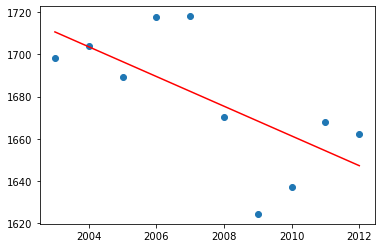

In [455]:
x = year
y = activity_hours_per_yr
x, y = np.array(x), np.array(y)

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)  

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [456]:
coefficient_of_determination = model.score(x,y) #R sqaure value 
coefficient_of_determination

0.4395842240995631

In [457]:
work_non_res_emp_2003_2012_slope = model.coef_
work_non_res_emp_2003_2012_slope

array([[-7.03318828]])

#### 2003-2019 Work, Main Job Non Residential- Employed

In [458]:
year = np.array([2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]).reshape((-1, 1))
activity_hours_per_day = np.array([work_2003_non_res_emp_hpd, work_2004_non_res_emp_hpd, work_2005_non_res_emp_hpd, work_2006_non_res_emp_hpd,
                                   work_2007_non_res_emp_hpd, work_2008_non_res_emp_hpd, work_2009_non_res_emp_hpd, work_2010_non_res_emp_hpd,
                                   work_2011_non_res_emp_hpd, work_2012_non_res_emp_hpd, work_2013_non_res_emp_hpd, work_2014_non_res_emp_hpd,
                                   work_2015_non_res_emp_hpd, work_2016_non_res_emp_hpd, work_2017_non_res_emp_hpd, work_2018_non_res_emp_hpd,
                                   work_2019_non_res_emp_hpd]).reshape((-1, 1))
                                  

activity_hours_per_yr = [i * 365 for i in activity_hours_per_day]
#activity_hours_per_yr

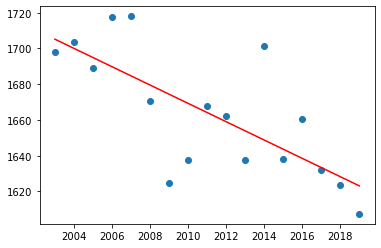

In [459]:
x = year
y = activity_hours_per_yr
x, y = np.array(x), np.array(y)

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)  

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [460]:
coefficient_of_determination = model.score(x,y) #R sqaure value 
coefficient_of_determination

0.5318627806707782

In [461]:
work_non_res_emp_2003_2019_slope = model.coef_
work_non_res_emp_2003_2019_slope

array([[-5.12704102]])

## 2003 - 2019 Eating and drinking Non Residential - Employed

### 2003  Eating and drinking

In [462]:
#110101 is eating and drinking
eating = atus_2003_non_res_emp[atus_2003_non_res_emp["TRCODEP"].apply(str).str.startswith("110101")]

In [463]:
eating_2003_non_res_emp = eating.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
eating_2003_non_res_emp_merged = pd.merge(eating_2003_non_res_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

In [464]:
eating_2003_non_res_emp_merged["Mutiplied Weighted"] = eating_2003_non_res_emp_merged["TUACTDUR24"] * eating_2003_non_res_emp_merged["TUFNWGTP"]
#eating_2003_non_res_emp_merged

In [465]:
eating_2003_non_res_emp_weight = eating_2003_non_res_emp_merged["Mutiplied Weighted"].sum()
eating_2003_non_res_emp_weight

1428782932097.408

In [466]:
eating_2003_non_res_emp_avg_hpd = eating_2003_non_res_emp_weight / all_2003_emp_weight /60
eating_2003_non_res_emp_avg_hpd

0.44772153348872623

### 2004 Eating and drinking

In [467]:
eating = atus_2004_non_res_emp[atus_2004_non_res_emp["TRCODEP"].apply(str).str.startswith("110101")]

eating_2004_non_res_emp = eating.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
eating_2004_non_res_emp_merged = pd.merge(eating_2004_non_res_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

In [468]:
eating_2004_non_res_emp_merged["Mutiplied Weighted"] = eating_2004_non_res_emp_merged["TUACTDUR24"] * eating_2004_non_res_emp_merged["TUFNWGTP"]
eating_2004_non_res_emp_weight = eating_2004_non_res_emp_merged["Mutiplied Weighted"].sum()
eating_2004_non_res_emp_weight

1499095806440.9556

In [469]:
eating_2004_non_res_emp_avg_hpd = eating_2004_non_res_emp_weight / all_2004_emp_weight /60
eating_2004_non_res_emp_avg_hpd

0.4681290739944653

### 2005 Eating and drinking

In [470]:
eating = atus_2005_non_res_emp[atus_2005_non_res_emp["TRCODEP"].apply(str).str.startswith("110101")]

eating_2005_non_res_emp = eating.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
eating_2005_non_res_emp_merged = pd.merge(eating_2005_non_res_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

In [471]:
eating_2005_non_res_emp_merged["Mutiplied Weighted"] = eating_2005_non_res_emp_merged["TUACTDUR24"] * eating_2005_non_res_emp_merged["TUFNWGTP"]
eating_2005_non_res_emp_weight = eating_2005_non_res_emp_merged["Mutiplied Weighted"].sum()
eating_2005_non_res_emp_weight

1545347236151.2378

In [472]:
eating_2005_non_res_emp_avg_hpd = eating_2005_non_res_emp_weight / all_2005_emp_weight /60
eating_2005_non_res_emp_avg_hpd

0.46804725551642523

### 2006 Eating and drinking

In [473]:
eating = atus_2006_non_res_emp[atus_2006_non_res_emp["TRCODEP"].apply(str).str.startswith("110101")]

eating_2006_non_res_emp = eating.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
eating_2006_non_res_emp_merged = pd.merge(eating_2006_non_res_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

In [474]:
eating_2006_non_res_emp_merged["Mutiplied Weighted"] = eating_2006_non_res_emp_merged["TUACTDUR24"] * eating_2006_non_res_emp_merged["TUFNWGTP"]
eating_2006_non_res_emp_weight = eating_2006_non_res_emp_merged["Mutiplied Weighted"].sum()
eating_2006_non_res_emp_weight

1570157749133.6707

In [475]:
eating_2006_non_res_emp_avg_hpd = eating_2006_non_res_emp_weight / all_2006_emp_weight /60
eating_2006_non_res_emp_avg_hpd

0.47426342015190737

### 2007 Eating and drinking

In [476]:
eating = atus_2007_non_res_emp[atus_2007_non_res_emp["TRCODEP"].apply(str).str.startswith("110101")]

eating_2007_non_res_emp = eating.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
eating_2007_non_res_emp_merged = pd.merge(eating_2007_non_res_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

In [477]:
eating_2007_non_res_emp_merged["Mutiplied Weighted"] = eating_2007_non_res_emp_merged["TUACTDUR24"] * eating_2007_non_res_emp_merged["TUFNWGTP"]
eating_2007_non_res_emp_weight = eating_2007_non_res_emp_merged["Mutiplied Weighted"].sum()
eating_2007_non_res_emp_weight

1589717006786.079

In [478]:
eating_2007_non_res_emp_avg_hpd = eating_2007_non_res_emp_weight / all_2007_emp_weight /60
eating_2007_non_res_emp_avg_hpd

0.4668094984841533

### 2008 Eating and drinking

In [479]:
eating = atus_2008_non_res_emp[atus_2008_non_res_emp["TRCODEP"].apply(str).str.startswith("110101")]

eating_2008_non_res_emp = eating.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
eating_2008_non_res_emp_merged = pd.merge(eating_2008_non_res_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

In [480]:
eating_2008_non_res_emp_merged["Mutiplied Weighted"] = eating_2008_non_res_emp_merged["TUACTDUR24"] * eating_2008_non_res_emp_merged["TUFNWGTP"]
eating_2008_non_res_emp_weight = eating_2008_non_res_emp_merged["Mutiplied Weighted"].sum()
eating_2008_non_res_emp_weight

1541219855473.8447

In [481]:
eating_2008_non_res_emp_avg_hpd = eating_2008_non_res_emp_weight / all_2008_emp_weight /60
eating_2008_non_res_emp_avg_hpd

0.4517123106856748

### 2009 Eating and drinking

In [482]:
eating = atus_2009_non_res_emp[atus_2009_non_res_emp["TRCODEP"].apply(str).str.startswith("110101")]

eating_2009_non_res_emp = eating.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
eating_2009_non_res_emp_merged = pd.merge(eating_2009_non_res_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

In [483]:
eating_2009_non_res_emp_merged["Mutiplied Weighted"] = eating_2009_non_res_emp_merged["TUACTDUR24"] * eating_2009_non_res_emp_merged["TUFNWGTP"]
eating_2009_non_res_emp_weight = eating_2009_non_res_emp_merged["Mutiplied Weighted"].sum()
eating_2009_non_res_emp_weight

1413164279166.7688

In [484]:
eating_2009_non_res_emp_avg_hpd = eating_2009_non_res_emp_weight / all_2009_emp_weight /60
eating_2009_non_res_emp_avg_hpd

0.4338882297171971

### 2010 Eating and drinking

In [485]:
eating = atus_2010_non_res_emp[atus_2010_non_res_emp["TRCODEP"].apply(str).str.startswith("110101")]

eating_2010_non_res_emp = eating.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
eating_2010_non_res_emp_merged = pd.merge(eating_2010_non_res_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

In [486]:
eating_2010_non_res_emp_merged["Mutiplied Weighted"] = eating_2010_non_res_emp_merged["TUACTDUR24"] * eating_2010_non_res_emp_merged["TUFNWGTP"]
eating_2010_non_res_emp_weight = eating_2010_non_res_emp_merged["Mutiplied Weighted"].sum()
eating_2010_non_res_emp_weight

1529153939286.6572

In [487]:
eating_2010_non_res_emp_avg_hpd = eating_2010_non_res_emp_weight / all_2010_emp_weight /60
eating_2010_non_res_emp_avg_hpd

0.4725960397071214

### 2011 Eating and drinking

In [488]:
eating = atus_2011_non_res_emp[atus_2011_non_res_emp["TRCODEP"].apply(str).str.startswith("110101")]

eating_2011_non_res_emp = eating.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
eating_2011_non_res_emp_merged = pd.merge(eating_2011_non_res_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

In [489]:
eating_2011_non_res_emp_merged["Mutiplied Weighted"] = eating_2011_non_res_emp_merged["TUACTDUR24"] * eating_2011_non_res_emp_merged["TUFNWGTP"]
eating_2011_non_res_emp_weight = eating_2011_non_res_emp_merged["Mutiplied Weighted"].sum()
eating_2011_non_res_emp_weight

1424332154631.1602

In [490]:
eating_2011_non_res_emp_avg_hpd = eating_2011_non_res_emp_weight / all_2011_emp_weight /60
eating_2011_non_res_emp_avg_hpd

0.43536992691800575

### 2012 Eating and drinking

In [491]:
eating = atus_2012_non_res_emp[atus_2012_non_res_emp["TRCODEP"].apply(str).str.startswith("110101")]

eating_2012_non_res_emp = eating.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
eating_2012_non_res_emp_merged = pd.merge(eating_2012_non_res_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

In [492]:
eating_2012_non_res_emp_merged["Mutiplied Weighted"] = eating_2012_non_res_emp_merged["TUACTDUR24"] * eating_2012_non_res_emp_merged["TUFNWGTP"]
eating_2012_non_res_emp_weight = eating_2012_non_res_emp_merged["Mutiplied Weighted"].sum()
eating_2012_non_res_emp_weight

1471062789330.3975

In [493]:
eating_2012_non_res_emp_avg_hpd = eating_2012_non_res_emp_weight / all_2012_emp_weight /60
eating_2012_non_res_emp_avg_hpd

0.4439925270361347

### 2013 Eating and drinking

In [494]:
eating = atus_2013_non_res_emp[atus_2013_non_res_emp["TRCODEP"].apply(str).str.startswith("110101")]

eating_2013_non_res_emp = eating.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
eating_2013_non_res_emp_merged = pd.merge(eating_2013_non_res_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

In [495]:
eating_2013_non_res_emp_merged["Mutiplied Weighted"] = eating_2013_non_res_emp_merged["TUACTDUR24"] * eating_2013_non_res_emp_merged["TUFNWGTP"]
eating_2013_non_res_emp_weight = eating_2013_non_res_emp_merged["Mutiplied Weighted"].sum()
eating_2013_non_res_emp_weight

1480691360590.677

In [496]:
eating_2013_non_res_emp_avg_hpd = eating_2013_non_res_emp_weight / all_2013_emp_weight /60
eating_2013_non_res_emp_avg_hpd

0.445793482413514

### 2014 Eating and Drinking

In [497]:
eating = atus_2014_non_res_emp[atus_2014_non_res_emp["TRCODEP"].apply(str).str.startswith("110101")]

eating_2014_non_res_emp = eating.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
eating_2014_non_res_emp_merged = pd.merge(eating_2014_non_res_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

In [498]:
eating_2014_non_res_emp_merged["Mutiplied Weighted"] = eating_2014_non_res_emp_merged["TUACTDUR24"] * eating_2014_non_res_emp_merged["TUFNWGTP"]
eating_2014_non_res_emp_weight = eating_2014_non_res_emp_merged["Mutiplied Weighted"].sum()
eating_2014_non_res_emp_weight

1378849918914.131

In [499]:
eating_2014_non_res_emp_avg_hpd = eating_2014_non_res_emp_weight / all_2014_emp_weight /60
eating_2014_non_res_emp_avg_hpd

0.4096869316887056

### 2015 Eating and Drinking

In [500]:
eating = atus_2015_non_res_emp[atus_2015_non_res_emp["TRCODEP"].apply(str).str.startswith("110101")]

eating_2015_non_res_emp = eating.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
eating_2015_non_res_emp_merged = pd.merge(eating_2015_non_res_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

In [501]:
eating_2015_non_res_emp_merged["Mutiplied Weighted"] = eating_2015_non_res_emp_merged["TUACTDUR24"] * eating_2015_non_res_emp_merged["TUFNWGTP"]
eating_2015_non_res_emp_weight = eating_2015_non_res_emp_merged["Mutiplied Weighted"].sum()
eating_2015_non_res_emp_weight

1432060425905.2124

In [502]:
eating_2015_non_res_emp_avg_hpd = eating_2015_non_res_emp_weight / all_2015_emp_weight /60
eating_2015_non_res_emp_avg_hpd

0.4168550797427963

### 2015 Eating and Drinking

In [503]:
eating = atus_2016_non_res_emp[atus_2016_non_res_emp["TRCODEP"].apply(str).str.startswith("110101")]

eating_2016_non_res_emp = eating.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
eating_2016_non_res_emp_merged = pd.merge(eating_2016_non_res_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

In [504]:
eating_2016_non_res_emp_merged["Mutiplied Weighted"] = eating_2016_non_res_emp_merged["TUACTDUR24"] * eating_2016_non_res_emp_merged["TUFNWGTP"]
eating_2016_non_res_emp_weight = eating_2016_non_res_emp_merged["Mutiplied Weighted"].sum()
eating_2016_non_res_emp_weight

1528983709692.2043

In [505]:
eating_2016_non_res_emp_avg_hpd = eating_2016_non_res_emp_weight / all_2016_emp_weight /60
eating_2016_non_res_emp_avg_hpd

0.43040826803102317

### 2017 Eating and Drinking

In [506]:
eating = atus_2017_non_res_emp[atus_2017_non_res_emp["TRCODEP"].apply(str).str.startswith("110101")]

eating_2017_non_res_emp = eating.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
eating_2017_non_res_emp_merged = pd.merge(eating_2017_non_res_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

In [507]:
eating_2017_non_res_emp_merged["Mutiplied Weighted"] = eating_2017_non_res_emp_merged["TUACTDUR24"] * eating_2017_non_res_emp_merged["TUFNWGTP"]
eating_2017_non_res_emp_weight = eating_2017_non_res_emp_merged["Mutiplied Weighted"].sum()
eating_2017_non_res_emp_weight

1486267444124.232

In [508]:
eating_2017_non_res_emp_avg_hpd = eating_2017_non_res_emp_weight / all_2017_emp_weight /60
eating_2017_non_res_emp_avg_hpd

0.41983137625409145

### 2018 Eating and Drinking

In [509]:
eating = atus_2018_non_res_emp[atus_2018_non_res_emp["TRCODEP"].apply(str).str.startswith("110101")]

eating_2018_non_res_emp = eating.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
eating_2018_non_res_emp_merged = pd.merge(eating_2018_non_res_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

In [510]:
eating_2018_non_res_emp_merged["Mutiplied Weighted"] = eating_2018_non_res_emp_merged["TUACTDUR24"] * eating_2018_non_res_emp_merged["TUFNWGTP"]
eating_2018_non_res_emp_weight = eating_2018_non_res_emp_merged["Mutiplied Weighted"].sum()
eating_2018_non_res_emp_weight

1618120016425.2102

In [511]:
eating_2018_non_res_emp_avg_hpd = eating_2018_non_res_emp_weight / all_2018_emp_weight /60
eating_2018_non_res_emp_avg_hpd

0.4470687182035092

### 2019 Eating and Drinking

In [512]:
eating = atus_2019_non_res_emp[atus_2019_non_res_emp["TRCODEP"].apply(str).str.startswith("110101")]

eating_2019_non_res_emp = eating.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
eating_2019_non_res_emp_merged = pd.merge(eating_2019_non_res_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

In [513]:
eating_2019_non_res_emp_merged["Mutiplied Weighted"] = eating_2019_non_res_emp_merged["TUACTDUR24"] * eating_2019_non_res_emp_merged["TUFNWGTP"]
eating_2019_non_res_emp_weight = eating_2019_non_res_emp_merged["Mutiplied Weighted"].sum()
eating_2019_non_res_emp_weight

1491013315629.8105

In [514]:
eating_2019_non_res_emp_avg_hpd = eating_2019_non_res_emp_weight / all_2019_emp_weight /60
eating_2019_non_res_emp_avg_hpd

0.40939224106142164

### Eating and Drinking Regression

#### 2003 - 2012 Regression

In [515]:
year = np.array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012]).reshape((-1, 1))
activity_hours_per_day = np.array([eating_2003_non_res_emp_avg_hpd, eating_2004_non_res_emp_avg_hpd, eating_2005_non_res_emp_avg_hpd, eating_2006_non_res_emp_avg_hpd,
                                   eating_2007_non_res_emp_avg_hpd, eating_2008_non_res_emp_avg_hpd, eating_2009_non_res_emp_avg_hpd, eating_2010_non_res_emp_avg_hpd,
                                   eating_2011_non_res_emp_avg_hpd, eating_2012_non_res_emp_avg_hpd]).reshape((-1, 1))
                                  

activity_hours_per_yr = [i * 365 for i in activity_hours_per_day]
#activity_hours_per_yr

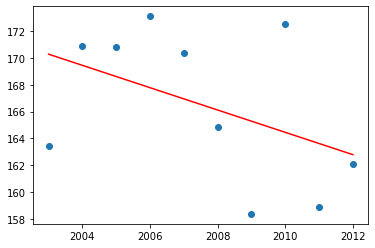

In [516]:
x = year
y = activity_hours_per_yr
x, y = np.array(x), np.array(y)

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)  

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [517]:
coefficient_of_determination = model.score(x,y) #R sqaure value 
coefficient_of_determination

0.19843102255524936

In [518]:
eating_non_res_emp_2003_2012_slope = model.coef_
eating_non_res_emp_2003_2012_slope

array([[-0.8325405]])

#### 2003-2019 Regression

In [519]:
year = np.array([2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]).reshape((-1, 1))
activity_hours_per_day = np.array([eating_2003_non_res_emp_avg_hpd, eating_2004_non_res_emp_avg_hpd, eating_2005_non_res_emp_avg_hpd, eating_2006_non_res_emp_avg_hpd,
                                   eating_2007_non_res_emp_avg_hpd, eating_2008_non_res_emp_avg_hpd, eating_2009_non_res_emp_avg_hpd, eating_2010_non_res_emp_avg_hpd,
                                   eating_2011_non_res_emp_avg_hpd, eating_2012_non_res_emp_avg_hpd, eating_2013_non_res_emp_avg_hpd, eating_2014_non_res_emp_avg_hpd,
                                   eating_2015_non_res_emp_avg_hpd, eating_2016_non_res_emp_avg_hpd, eating_2017_non_res_emp_avg_hpd, eating_2018_non_res_emp_avg_hpd,
                                   eating_2019_non_res_emp_avg_hpd]).reshape((-1, 1))
                                  

activity_hours_per_yr = [i * 365 for i in activity_hours_per_day]
#activity_hours_per_yr

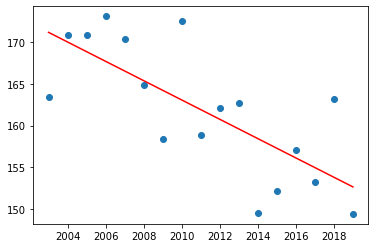

In [520]:
x = year
y = activity_hours_per_yr
x, y = np.array(x), np.array(y)

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)  

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [521]:
coefficient_of_determination = model.score(x,y) #R sqaure value 
coefficient_of_determination

0.542613314877009

In [522]:
eating_non_res_emp_2003_2019 = model.coef_
eating_non_res_emp_2003_2019

array([[-1.15700946]])

## 2003-2019 Shopping, except groceries, food and gas - Non Residential - Employed 

### 2003 Shopping, except groceries, food and gas

In [523]:
#070104 is eating and drinking
shopping = atus_2003_non_res_emp[atus_2003_non_res_emp["TRCODEP"].apply(str).str.startswith("070104")]

In [524]:
shopping_2003_non_res_emp = shopping.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
shopping_2003_non_res_emp_merged = pd.merge(shopping_2003_non_res_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

In [525]:
shopping_2003_non_res_emp_merged["Mutiplied Weighted"] = shopping_2003_non_res_emp_merged["TUACTDUR24"] * shopping_2003_non_res_emp_merged["TUFNWGTP"]
#shopping_2003_non_res_emp_merged

In [526]:
shopping_2003_non_res_emp_weight = shopping_2003_non_res_emp_merged["Mutiplied Weighted"].sum()
shopping_2003_non_res_emp_weight

812635648716.2136

In [527]:
#hpd = hour per day
shopping_2003_non_res_emp_avg_hpd = shopping_2003_non_res_emp_weight / all_2003_emp_weight /60
shopping_2003_non_res_emp_avg_hpd

0.254646434134492

### 2004 Shopping, except groceries, food and gas

In [528]:
shopping = atus_2004_non_res_emp[atus_2004_non_res_emp["TRCODEP"].apply(str).str.startswith("070104")]
shopping_2004_non_res_emp = shopping.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
shopping_2004_non_res_emp_merged = pd.merge(shopping_2004_non_res_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

In [529]:
shopping_2004_non_res_emp_merged["Mutiplied Weighted"]= shopping_2004_non_res_emp_merged["TUACTDUR24"]*shopping_2004_non_res_emp_merged["TUFNWGTP"]
shopping_2004_non_res_emp_weight = shopping_2004_non_res_emp_merged["Mutiplied Weighted"].sum()
shopping_2004_non_res_emp_weight

845757014156.1978

In [530]:
shopping_2004_non_res_emp_avg_hpd = shopping_2004_non_res_emp_weight / all_2004_emp_weight /60
shopping_2004_non_res_emp_avg_hpd

0.2641081685107488

### 2005 Shopping, except groceries, food and gas

In [531]:
shopping = atus_2005_non_res_emp[atus_2005_non_res_emp["TRCODEP"].apply(str).str.startswith("070104")]
shopping_2005_non_res_emp = shopping.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
shopping_2005_non_res_emp_merged = pd.merge(shopping_2005_non_res_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

In [532]:
shopping_2005_non_res_emp_merged["Mutiplied Weighted"]= shopping_2005_non_res_emp_merged["TUACTDUR24"]*shopping_2005_non_res_emp_merged["TUFNWGTP"]
shopping_2005_non_res_emp_weight = shopping_2005_non_res_emp_merged["Mutiplied Weighted"].sum()
shopping_2005_non_res_emp_weight

810981262864.4865

In [533]:
shopping_2005_non_res_emp_avg_hpd = shopping_2005_non_res_emp_weight / all_2005_emp_weight /60
shopping_2005_non_res_emp_avg_hpd

0.24562606091322478

### 2006 Shopping, except groceries, food and gas

In [534]:
shopping = atus_2006_non_res_emp[atus_2006_non_res_emp["TRCODEP"].apply(str).str.startswith("070104")]
shopping_2006_non_res_emp = shopping.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
shopping_2006_non_res_emp_merged = pd.merge(shopping_2006_non_res_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

In [535]:
shopping_2006_non_res_emp_merged["Mutiplied Weighted"]= shopping_2006_non_res_emp_merged["TUACTDUR24"]*shopping_2006_non_res_emp_merged["TUFNWGTP"]
shopping_2006_non_res_emp_weight = shopping_2006_non_res_emp_merged["Mutiplied Weighted"].sum()
shopping_2006_non_res_emp_weight

855537968497.5922

In [536]:
shopping_2006_non_res_emp_avg_hpd = shopping_2006_non_res_emp_weight / all_2006_emp_weight /60
shopping_2006_non_res_emp_avg_hpd

0.2584137569829237

### 2007 Shopping, except groceries, food and gas

In [537]:
shopping = atus_2007_non_res_emp[atus_2007_non_res_emp["TRCODEP"].apply(str).str.startswith("070104")]
shopping_2007_non_res_emp = shopping.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
shopping_2007_non_res_emp_merged = pd.merge(shopping_2007_non_res_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

In [538]:
shopping_2007_non_res_emp_merged["Mutiplied Weighted"]= shopping_2007_non_res_emp_merged["TUACTDUR24"]*shopping_2007_non_res_emp_merged["TUFNWGTP"]
shopping_2007_non_res_emp_weight = shopping_2007_non_res_emp_merged["Mutiplied Weighted"].sum()
shopping_2007_non_res_emp_weight

862157802429.9478

In [539]:
shopping_2007_non_res_emp_avg_hpd = shopping_2007_non_res_emp_weight / all_2007_emp_weight /60
shopping_2007_non_res_emp_avg_hpd

0.2531667269385144

### 2008 Shopping, except groceries, food and gas

In [540]:
shopping = atus_2008_non_res_emp[atus_2008_non_res_emp["TRCODEP"].apply(str).str.startswith("070104")]
shopping_2008_non_res_emp = shopping.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
shopping_2008_non_res_emp_merged = pd.merge(shopping_2008_non_res_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

In [541]:
shopping_2008_non_res_emp_merged["Mutiplied Weighted"]= shopping_2008_non_res_emp_merged["TUACTDUR24"]*shopping_2008_non_res_emp_merged["TUFNWGTP"]
shopping_2008_non_res_emp_weight = shopping_2008_non_res_emp_merged["Mutiplied Weighted"].sum()
shopping_2008_non_res_emp_weight

776358673596.5139

In [542]:
shopping_2008_non_res_emp_avg_hpd = shopping_2008_non_res_emp_weight / all_2008_emp_weight /60
shopping_2008_non_res_emp_avg_hpd

0.22754104103033876

### 2009 Shopping, except groceries, food and gas

In [543]:
shopping = atus_2009_non_res_emp[atus_2009_non_res_emp["TRCODEP"].apply(str).str.startswith("070104")]
shopping_2009_non_res_emp = shopping.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
shopping_2009_non_res_emp_merged = pd.merge(shopping_2009_non_res_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

In [544]:
shopping_2009_non_res_emp_merged["Mutiplied Weighted"]= shopping_2009_non_res_emp_merged["TUACTDUR24"]*shopping_2009_non_res_emp_merged["TUFNWGTP"]
shopping_2009_non_res_emp_weight = shopping_2009_non_res_emp_merged["Mutiplied Weighted"].sum()
shopping_2009_non_res_emp_weight

745811961009.4233

In [545]:
shopping_2009_non_res_emp_avg_hpd = shopping_2009_non_res_emp_weight / all_2009_emp_weight /60
shopping_2009_non_res_emp_avg_hpd

0.22898896910633113

### 2010 Shopping, except groceries, food and gas

In [546]:
shopping = atus_2010_non_res_emp[atus_2010_non_res_emp["TRCODEP"].apply(str).str.startswith("070104")]
shopping_2010_non_res_emp = shopping.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
shopping_2010_non_res_emp_merged = pd.merge(shopping_2010_non_res_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

In [547]:
shopping_2010_non_res_emp_merged["Mutiplied Weighted"]= shopping_2010_non_res_emp_merged["TUACTDUR24"]*shopping_2010_non_res_emp_merged["TUFNWGTP"]
shopping_2010_non_res_emp_weight = shopping_2010_non_res_emp_merged["Mutiplied Weighted"].sum()
shopping_2010_non_res_emp_weight

729671136101.5173

In [548]:
shopping_2010_non_res_emp_avg_hpd = shopping_2010_non_res_emp_weight / all_2010_emp_weight /60
shopping_2010_non_res_emp_avg_hpd

0.2255101205644731

### 2011 Shopping, except groceries, food and gas

In [549]:
shopping = atus_2011_non_res_emp[atus_2011_non_res_emp["TRCODEP"].apply(str).str.startswith("070104")]
shopping_2011_non_res_emp = shopping.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
shopping_2011_non_res_emp_merged = pd.merge(shopping_2011_non_res_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

In [550]:
shopping_2011_non_res_emp_merged["Mutiplied Weighted"]= shopping_2011_non_res_emp_merged["TUACTDUR24"]*shopping_2011_non_res_emp_merged["TUFNWGTP"]
shopping_2011_non_res_emp_weight = shopping_2011_non_res_emp_merged["Mutiplied Weighted"].sum()
shopping_2011_non_res_emp_weight

730427351442.2134

In [551]:
shopping_2011_non_res_emp_avg_hpd = shopping_2011_non_res_emp_weight / all_2011_emp_weight /60
shopping_2011_non_res_emp_avg_hpd

0.22326681426261744

### 2012 Shopping, except groceries, food and gas

In [552]:
shopping = atus_2012_non_res_emp[atus_2012_non_res_emp["TRCODEP"].apply(str).str.startswith("070104")]
shopping_2012_non_res_emp = shopping.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
shopping_2012_non_res_emp_merged = pd.merge(shopping_2012_non_res_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

In [553]:
shopping_2012_non_res_emp_merged["Mutiplied Weighted"]= shopping_2012_non_res_emp_merged["TUACTDUR24"]*shopping_2012_non_res_emp_merged["TUFNWGTP"]
shopping_2012_non_res_emp_weight = shopping_2012_non_res_emp_merged["Mutiplied Weighted"].sum()
shopping_2012_non_res_emp_weight

717357351720.0039

In [554]:
shopping_2012_non_res_emp_avg_hpd = shopping_2012_non_res_emp_weight / all_2012_emp_weight /60
shopping_2012_non_res_emp_avg_hpd

0.21651101889613436

### 2013 Shopping, except groceries, food and gas

In [555]:
shopping = atus_2013_non_res_emp[atus_2013_non_res_emp["TRCODEP"].apply(str).str.startswith("070104")]
shopping_2013_non_res_emp = shopping.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
shopping_2013_non_res_emp_merged = pd.merge(shopping_2013_non_res_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

In [556]:
shopping_2013_non_res_emp_merged["Mutiplied Weighted"]= shopping_2013_non_res_emp_merged["TUACTDUR24"]*shopping_2013_non_res_emp_merged["TUFNWGTP"]
shopping_2013_non_res_emp_weight = shopping_2013_non_res_emp_merged["Mutiplied Weighted"].sum()
shopping_2013_non_res_emp_weight

745029526827.7875

In [557]:
shopping_2013_non_res_emp_avg_hpd = shopping_2013_non_res_emp_weight / all_2013_emp_weight /60
shopping_2013_non_res_emp_avg_hpd

0.22430691236893488

### 2014 Shopping, except groceries, food and gas

In [558]:
shopping = atus_2014_non_res_emp[atus_2014_non_res_emp["TRCODEP"].apply(str).str.startswith("070104")]
shopping_2014_non_res_emp = shopping.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
shopping_2014_non_res_emp_merged = pd.merge(shopping_2014_non_res_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

In [559]:
shopping_2014_non_res_emp_merged["Mutiplied Weighted"]= shopping_2014_non_res_emp_merged["TUACTDUR24"]*shopping_2014_non_res_emp_merged["TUFNWGTP"]
shopping_2014_non_res_emp_weight = shopping_2014_non_res_emp_merged["Mutiplied Weighted"].sum()
shopping_2014_non_res_emp_weight

625591100183.5142

In [560]:
shopping_2014_non_res_emp_avg_hpd = shopping_2014_non_res_emp_weight / all_2014_emp_weight /60
shopping_2014_non_res_emp_avg_hpd

0.18587700866515164

### 2015 Shopping, except groceries, food and gas

In [561]:
shopping = atus_2015_non_res_emp[atus_2015_non_res_emp["TRCODEP"].apply(str).str.startswith("070104")]
shopping_2015_non_res_emp = shopping.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
shopping_2015_non_res_emp_merged = pd.merge(shopping_2015_non_res_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

In [562]:
shopping_2015_non_res_emp_merged["Mutiplied Weighted"]= shopping_2015_non_res_emp_merged["TUACTDUR24"]*shopping_2015_non_res_emp_merged["TUFNWGTP"]
shopping_2015_non_res_emp_weight = shopping_2015_non_res_emp_merged["Mutiplied Weighted"].sum()
shopping_2015_non_res_emp_weight

712432690345.3741

In [563]:
shopping_2015_non_res_emp_avg_hpd = shopping_2015_non_res_emp_weight / all_2015_emp_weight /60
shopping_2015_non_res_emp_avg_hpd

0.20738034553086165

### 2016 Shopping, except groceries, food and gas

In [564]:
shopping = atus_2016_non_res_emp[atus_2016_non_res_emp["TRCODEP"].apply(str).str.startswith("070104")]
shopping_2016_non_res_emp = shopping.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
shopping_2016_non_res_emp_merged = pd.merge(shopping_2016_non_res_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

In [565]:
shopping_2016_non_res_emp_merged["Mutiplied Weighted"]= shopping_2016_non_res_emp_merged["TUACTDUR24"]*shopping_2016_non_res_emp_merged["TUFNWGTP"]
shopping_2016_non_res_emp_weight = shopping_2016_non_res_emp_merged["Mutiplied Weighted"].sum()
shopping_2016_non_res_emp_weight

689557035758.4968

In [566]:
shopping_2016_non_res_emp_avg_hpd = shopping_2016_non_res_emp_weight / all_2016_emp_weight /60
shopping_2016_non_res_emp_avg_hpd

0.1941100141146482

### 2017 Shopping, except groceries, food and gas

In [567]:
shopping = atus_2017_non_res_emp[atus_2017_non_res_emp["TRCODEP"].apply(str).str.startswith("070104")]
shopping_2017_non_res_emp = shopping.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
shopping_2017_non_res_emp_merged = pd.merge(shopping_2017_non_res_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

In [568]:
shopping_2017_non_res_emp_merged["Mutiplied Weighted"]= shopping_2017_non_res_emp_merged["TUACTDUR24"]*shopping_2017_non_res_emp_merged["TUFNWGTP"]
shopping_2017_non_res_emp_weight = shopping_2017_non_res_emp_merged["Mutiplied Weighted"].sum()
shopping_2017_non_res_emp_weight

645850274515.5956

In [569]:
shopping_2017_non_res_emp_avg_hpd = shopping_2017_non_res_emp_weight / all_2017_emp_weight /60
shopping_2017_non_res_emp_avg_hpd

0.18243567850181677

### 2018 Shopping, except groceries, food and gas

In [570]:
shopping = atus_2018_non_res_emp[atus_2018_non_res_emp["TRCODEP"].apply(str).str.startswith("070104")]
shopping_2018_non_res_emp = shopping.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
shopping_2018_non_res_emp_merged = pd.merge(shopping_2018_non_res_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

In [571]:
shopping_2018_non_res_emp_merged["Mutiplied Weighted"]= shopping_2018_non_res_emp_merged["TUACTDUR24"]*shopping_2018_non_res_emp_merged["TUFNWGTP"]
shopping_2018_non_res_emp_weight = shopping_2018_non_res_emp_merged["Mutiplied Weighted"].sum()
shopping_2018_non_res_emp_weight

608739394087.9049

In [572]:
shopping_2018_non_res_emp_avg_hpd = shopping_2018_non_res_emp_weight / all_2018_emp_weight /60
shopping_2018_non_res_emp_avg_hpd

0.168187982270992

### 2019 Shopping, except groceries, food and gas

In [573]:
shopping = atus_2019_non_res_emp[atus_2019_non_res_emp["TRCODEP"].apply(str).str.startswith("070104")]
shopping_2019_non_res_emp = shopping.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
shopping_2019_non_res_emp_merged = pd.merge(shopping_2019_non_res_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

In [574]:
shopping_2019_non_res_emp_merged["Mutiplied Weighted"]= shopping_2019_non_res_emp_merged["TUACTDUR24"]*shopping_2019_non_res_emp_merged["TUFNWGTP"]
shopping_2019_non_res_emp_weight = shopping_2019_non_res_emp_merged["Mutiplied Weighted"].sum()
shopping_2019_non_res_emp_weight

703926448394.0664

In [575]:
shopping_2019_non_res_emp_avg_hpd = shopping_2019_non_res_emp_weight / all_2019_emp_weight /60
shopping_2019_non_res_emp_avg_hpd

0.19327931094211903

### Shopping, except groceries, food and gas Regression

#### 2003-2012 Regression

In [576]:
year = np.array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012]).reshape((-1, 1))
activity_hours_per_day = np.array([shopping_2003_non_res_emp_avg_hpd, shopping_2004_non_res_emp_avg_hpd, shopping_2005_non_res_emp_avg_hpd,
                                   shopping_2006_non_res_emp_avg_hpd, shopping_2007_non_res_emp_avg_hpd, shopping_2008_non_res_emp_avg_hpd,
                                   shopping_2009_non_res_emp_avg_hpd, shopping_2010_non_res_emp_avg_hpd, shopping_2011_non_res_emp_avg_hpd,
                                   shopping_2012_non_res_emp_avg_hpd]).reshape((-1, 1))
                                  

activity_hours_per_yr = [i * 365 for i in activity_hours_per_day]
#activity_hours_per_yr

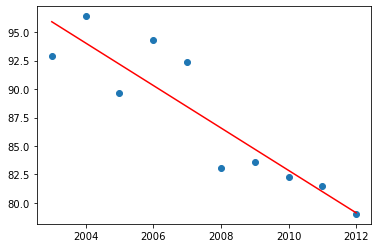

In [577]:
x = year
y = activity_hours_per_yr
x, y = np.array(x), np.array(y)

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)  

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [578]:
coefficient_of_determination = model.score(x,y) #R sqaure value 
coefficient_of_determination

0.8114820502526623

In [579]:
shoping_non_res_emp_2003_2012_slope = model.coef_
shoping_non_res_emp_2003_2012_slope

array([[-1.86611884]])

#### 2003 - 2019

In [580]:
year = np.array([2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]).reshape((-1, 1))
activity_hours_per_day = np.array([shopping_2003_non_res_emp_avg_hpd, shopping_2004_non_res_emp_avg_hpd, shopping_2005_non_res_emp_avg_hpd,
                                   shopping_2006_non_res_emp_avg_hpd, shopping_2007_non_res_emp_avg_hpd, shopping_2008_non_res_emp_avg_hpd,
                                   shopping_2009_non_res_emp_avg_hpd, shopping_2010_non_res_emp_avg_hpd, shopping_2011_non_res_emp_avg_hpd,
                                   shopping_2012_non_res_emp_avg_hpd, shopping_2013_non_res_emp_avg_hpd, shopping_2014_non_res_emp_avg_hpd,
                                   shopping_2015_non_res_emp_avg_hpd, shopping_2016_non_res_emp_avg_hpd, shopping_2017_non_res_emp_avg_hpd,
                                   shopping_2018_non_res_emp_avg_hpd, shopping_2019_non_res_emp_avg_hpd]).reshape((-1, 1))
                                  

activity_hours_per_yr = [i * 365 for i in activity_hours_per_day]
#activity_hours_per_yr

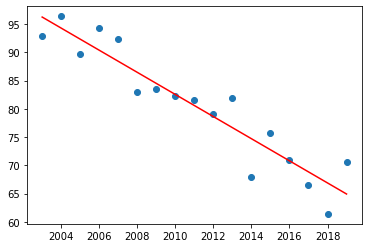

In [581]:
x = year
y = activity_hours_per_yr
x, y = np.array(x), np.array(y)

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)  

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [582]:
coefficient_of_determination = model.score(x,y) #R sqaure value 
coefficient_of_determination

0.8781485027679715

In [583]:
shoping_non_res_emp_2003_2019_slope = model.coef_
shoping_non_res_emp_2003_2019_slope

array([[-1.95877978]])

## 2003-2019 All Travel - Employed

In [584]:
#all travel = 12,13,19. 12 = Car, truck, or motorcycle (driver), 13 = Car, truck, or motorcycle (passenger), 
                        #19 = Taxi/limousine service. 19 is not included

In [585]:
#only residential location from 2003-2019
travel_location = [12,13]
atus_multi_yr_travel_emp = multi_merged_employed[multi_merged_employed["TEWHERE"].isin(travel_location)]
#atus_multi_yr_travel_emp

In [586]:
atus_2003_travel_emp = atus_multi_yr_travel_emp[atus_multi_yr_travel_emp["TUCASEID"].apply(str).str.startswith("2003")]
atus_2004_travel_emp = atus_multi_yr_travel_emp[atus_multi_yr_travel_emp["TUCASEID"].apply(str).str.startswith("2004")]
atus_2005_travel_emp = atus_multi_yr_travel_emp[atus_multi_yr_travel_emp["TUCASEID"].apply(str).str.startswith("2005")]
atus_2006_travel_emp = atus_multi_yr_travel_emp[atus_multi_yr_travel_emp["TUCASEID"].apply(str).str.startswith("2006")]
atus_2007_travel_emp = atus_multi_yr_travel_emp[atus_multi_yr_travel_emp["TUCASEID"].apply(str).str.startswith("2007")]
atus_2008_travel_emp = atus_multi_yr_travel_emp[atus_multi_yr_travel_emp["TUCASEID"].apply(str).str.startswith("2008")]
atus_2009_travel_emp = atus_multi_yr_travel_emp[atus_multi_yr_travel_emp["TUCASEID"].apply(str).str.startswith("2009")]
atus_2010_travel_emp = atus_multi_yr_travel_emp[atus_multi_yr_travel_emp["TUCASEID"].apply(str).str.startswith("2010")]
atus_2011_travel_emp = atus_multi_yr_travel_emp[atus_multi_yr_travel_emp["TUCASEID"].apply(str).str.startswith("2011")]
atus_2012_travel_emp = atus_multi_yr_travel_emp[atus_multi_yr_travel_emp["TUCASEID"].apply(str).str.startswith("2012")]
atus_2013_travel_emp = atus_multi_yr_travel_emp[atus_multi_yr_travel_emp["TUCASEID"].apply(str).str.startswith("2013")]
atus_2014_travel_emp = atus_multi_yr_travel_emp[atus_multi_yr_travel_emp["TUCASEID"].apply(str).str.startswith("2014")]
atus_2015_travel_emp = atus_multi_yr_travel_emp[atus_multi_yr_travel_emp["TUCASEID"].apply(str).str.startswith("2015")]
atus_2016_travel_emp = atus_multi_yr_travel_emp[atus_multi_yr_travel_emp["TUCASEID"].apply(str).str.startswith("2016")]
atus_2017_travel_emp = atus_multi_yr_travel_emp[atus_multi_yr_travel_emp["TUCASEID"].apply(str).str.startswith("2017")]
atus_2018_travel_emp = atus_multi_yr_travel_emp[atus_multi_yr_travel_emp["TUCASEID"].apply(str).str.startswith("2018")]
atus_2019_travel_emp = atus_multi_yr_travel_emp[atus_multi_yr_travel_emp["TUCASEID"].apply(str).str.startswith("2019")]

### 2003 All Travel

In [587]:
travel_2003_emp = atus_2003_travel_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
travel_2003_emp_merged = pd.merge(travel_2003_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

In [588]:
travel_2003_emp_merged["Mutiplied Weighted"] = travel_2003_emp_merged["TUACTDUR24"] * travel_2003_emp_merged["TUFNWGTP"]
#travel_2003_emp_merged

In [589]:
travel_2003_emp_weight = travel_2003_emp_merged["Mutiplied Weighted"].sum()
travel_2003_emp_weight

4167245994357.7397

In [590]:
# hpd = hour per day
travel_2003_emp_avg_hpd = travel_2003_emp_weight / all_2003_emp_weight /60
travel_2003_emp_avg_hpd

1.3058427036776776

### 2004 All Travel

In [591]:
travel_2004_emp = atus_2004_travel_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
travel_2004_emp_merged = pd.merge(travel_2004_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
travel_2004_emp_merged["Mutiplied Weighted"] = travel_2004_emp_merged["TUACTDUR24"] * travel_2004_emp_merged["TUFNWGTP"]

In [592]:
travel_2004_emp_weight = travel_2004_emp_merged["Mutiplied Weighted"].sum()
travel_2004_emp_weight

4078153407613.2627

In [593]:
travel_2004_emp_avg_hpd = travel_2004_emp_weight / all_2004_emp_weight /60
travel_2004_emp_avg_hpd

1.273502447349127

### 2005 All Travel

In [594]:
travel_2005_emp = atus_2005_travel_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
travel_2005_emp_merged = pd.merge(travel_2005_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
travel_2005_emp_merged["Mutiplied Weighted"] = travel_2005_emp_merged["TUACTDUR24"] * travel_2005_emp_merged["TUFNWGTP"]

In [595]:
travel_2005_emp_weight = travel_2005_emp_merged["Mutiplied Weighted"].sum()
travel_2005_emp_weight

4099058361310.119

In [596]:
travel_2005_emp_avg_hpd = travel_2005_emp_weight / all_2005_emp_weight /60
travel_2005_emp_avg_hpd

1.24150286183648

### 2006 All Travel

In [597]:
travel_2006_emp = atus_2006_travel_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
travel_2006_emp_merged = pd.merge(travel_2006_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
travel_2006_emp_merged["Mutiplied Weighted"] = travel_2006_emp_merged["TUACTDUR24"] * travel_2006_emp_merged["TUFNWGTP"]

In [598]:
travel_2006_emp_weight = travel_2006_emp_merged["Mutiplied Weighted"].sum()
travel_2006_emp_weight

4087542084627.415

In [599]:
travel_2006_emp_avg_hpd = travel_2006_emp_weight / all_2006_emp_weight /60
travel_2006_emp_avg_hpd

1.2346349850133564

### 2007 All Travel

In [600]:
travel_2007_emp = atus_2007_travel_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
travel_2007_emp_merged = pd.merge(travel_2007_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
travel_2007_emp_merged["Mutiplied Weighted"] = travel_2007_emp_merged["TUACTDUR24"] * travel_2007_emp_merged["TUFNWGTP"]

In [601]:
travel_2007_emp_weight = travel_2007_emp_merged["Mutiplied Weighted"].sum()
travel_2007_emp_weight

4161956618730.7344

In [602]:
travel_2007_emp_avg_hpd = travel_2007_emp_weight / all_2007_emp_weight /60
travel_2007_emp_avg_hpd

1.2221300228965444

### 2008 All Travel

In [603]:
travel_2008_emp = atus_2008_travel_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
travel_2008_emp_merged = pd.merge(travel_2008_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
travel_2008_emp_merged["Mutiplied Weighted"] = travel_2008_emp_merged["TUACTDUR24"] * travel_2008_emp_merged["TUFNWGTP"]

In [604]:
travel_2008_emp_weight = travel_2008_emp_merged["Mutiplied Weighted"].sum()
travel_2008_emp_weight

4121617924756.8374

In [605]:
travel_2008_emp_avg_hpd = travel_2008_emp_weight / all_2008_emp_weight /60
travel_2008_emp_avg_hpd

1.207994790582947

### 2009 All Travel

In [606]:
travel_2009_emp = atus_2009_travel_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
travel_2009_emp_merged = pd.merge(travel_2009_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
travel_2009_emp_merged["Mutiplied Weighted"] = travel_2009_emp_merged["TUACTDUR24"] * travel_2009_emp_merged["TUFNWGTP"]

In [607]:
travel_2009_emp_weight = travel_2009_emp_merged["Mutiplied Weighted"].sum()
travel_2009_emp_weight

3966645758459.585

In [608]:
travel_2009_emp_avg_hpd = travel_2009_emp_weight / all_2009_emp_weight /60
travel_2009_emp_avg_hpd

1.2178916007331033

### 2010 All Travel

In [609]:
travel_2010_emp = atus_2010_travel_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
travel_2010_emp_merged = pd.merge(travel_2010_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
travel_2010_emp_merged["Mutiplied Weighted"] = travel_2010_emp_merged["TUACTDUR24"] * travel_2010_emp_merged["TUFNWGTP"]

In [610]:
travel_2010_emp_weight = travel_2010_emp_merged["Mutiplied Weighted"].sum()
travel_2010_emp_weight

4104128562661.0596

In [611]:
travel_2010_emp_avg_hpd = travel_2010_emp_weight / all_2010_emp_weight /60
travel_2010_emp_avg_hpd

1.2684104950658588

### 2011 All Travel

In [612]:
travel_2011_emp = atus_2011_travel_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
travel_2011_emp_merged = pd.merge(travel_2011_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
travel_2011_emp_merged["Mutiplied Weighted"] = travel_2011_emp_merged["TUACTDUR24"] * travel_2011_emp_merged["TUFNWGTP"]

In [613]:
travel_2011_emp_weight = travel_2011_emp_merged["Mutiplied Weighted"].sum()
travel_2011_emp_weight

4023222019932.2524

In [614]:
travel_2011_emp_avg_hpd = travel_2011_emp_weight / all_2011_emp_weight /60
travel_2011_emp_avg_hpd

1.2297622230163028

### 2012 All Travel

In [615]:
travel_2012_emp = atus_2012_travel_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
travel_2012_emp_merged = pd.merge(travel_2012_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
travel_2012_emp_merged["Mutiplied Weighted"] = travel_2012_emp_merged["TUACTDUR24"] * travel_2012_emp_merged["TUFNWGTP"]

In [616]:
travel_2012_emp_weight = travel_2012_emp_merged["Mutiplied Weighted"].sum()
travel_2012_emp_weight

4092251747960.9863

In [617]:
travel_2012_emp_avg_hpd = travel_2012_emp_weight / all_2012_emp_weight /60
travel_2012_emp_avg_hpd

1.2351132854582452

### 2013 All Travel

In [618]:
travel_2013_emp = atus_2013_travel_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
travel_2013_emp_merged = pd.merge(travel_2013_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
travel_2013_emp_merged["Mutiplied Weighted"] = travel_2013_emp_merged["TUACTDUR24"] * travel_2013_emp_merged["TUFNWGTP"]

In [619]:
travel_2013_emp_weight = travel_2013_emp_merged["Mutiplied Weighted"].sum()
travel_2013_emp_weight

4077829445772.0977

In [620]:
travel_2013_emp_avg_hpd = travel_2013_emp_weight / all_2013_emp_weight /60
travel_2013_emp_avg_hpd

1.2277168880042153

### 2014 All Travel

In [621]:
travel_2014_emp = atus_2014_travel_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
travel_2014_emp_merged = pd.merge(travel_2014_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
travel_2014_emp_merged["Mutiplied Weighted"] = travel_2014_emp_merged["TUACTDUR24"] * travel_2014_emp_merged["TUFNWGTP"]

In [622]:
travel_2014_emp_weight = travel_2014_emp_merged["Mutiplied Weighted"].sum()
travel_2014_emp_weight

3933154940774.0586

In [623]:
travel_2014_emp_avg_hpd = travel_2014_emp_weight / all_2014_emp_weight /60
travel_2014_emp_avg_hpd

1.1686276783560123

### 2015 All Travel

In [624]:
travel_2015_emp = atus_2015_travel_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
travel_2015_emp_merged = pd.merge(travel_2015_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
travel_2015_emp_merged["Mutiplied Weighted"] = travel_2015_emp_merged["TUACTDUR24"] * travel_2015_emp_merged["TUFNWGTP"]

In [625]:
travel_2015_emp_weight = travel_2015_emp_merged["Mutiplied Weighted"].sum()
travel_2015_emp_weight

4155892803994.1514

In [626]:
travel_2015_emp_avg_hpd = travel_2015_emp_weight / all_2015_emp_weight /60
travel_2015_emp_avg_hpd

1.2097289994704192

### 2016 All Travel

In [627]:
travel_2016_emp = atus_2016_travel_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
travel_2016_emp_merged = pd.merge(travel_2016_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
travel_2016_emp_merged["Mutiplied Weighted"] = travel_2016_emp_merged["TUACTDUR24"] * travel_2016_emp_merged["TUFNWGTP"]

In [628]:
travel_2016_emp_weight = travel_2016_emp_merged["Mutiplied Weighted"].sum()
travel_2016_emp_weight

4437823828695.921

In [629]:
travel_2016_emp_avg_hpd = travel_2016_emp_weight / all_2016_emp_weight /60
travel_2016_emp_avg_hpd

1.24924553206674

### 2017 All Travel

In [630]:
travel_2017_emp = atus_2017_travel_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
travel_2017_emp_merged = pd.merge(travel_2017_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
travel_2017_emp_merged["Mutiplied Weighted"] = travel_2017_emp_merged["TUACTDUR24"] * travel_2017_emp_merged["TUFNWGTP"]

In [631]:
travel_2017_emp_weight = travel_2017_emp_merged["Mutiplied Weighted"].sum()
travel_2017_emp_weight

4444140572101.519

In [632]:
travel_2017_emp_avg_hpd = travel_2017_emp_weight / all_2017_emp_weight /60
travel_2017_emp_avg_hpd

1.255352567956855

### 2018 All Travel

In [633]:
travel_2018_emp = atus_2018_travel_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
travel_2018_emp_merged = pd.merge(travel_2018_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
travel_2018_emp_merged["Mutiplied Weighted"] = travel_2018_emp_merged["TUACTDUR24"] * travel_2018_emp_merged["TUFNWGTP"]

In [634]:
travel_2018_emp_weight = travel_2018_emp_merged["Mutiplied Weighted"].sum()
travel_2018_emp_weight

4460007201102.445

In [635]:
travel_2018_emp_avg_hpd = travel_2018_emp_weight / all_2018_emp_weight /60
travel_2018_emp_avg_hpd

1.2322508110247155

### 2019 All Travel

In [636]:
travel_2019_emp = atus_2019_travel_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
travel_2019_emp_merged = pd.merge(travel_2019_emp, multi_resp, on ="TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
travel_2019_emp_merged["Mutiplied Weighted"] = travel_2019_emp_merged["TUACTDUR24"] * travel_2019_emp_merged["TUFNWGTP"]

In [637]:
travel_2019_emp_weight = travel_2019_emp_merged["Mutiplied Weighted"].sum()
travel_2019_emp_weight

4606182762395.939

In [638]:
travel_2019_emp_avg_hpd = travel_2019_emp_weight / all_2019_emp_weight /60
travel_2019_emp_avg_hpd

1.2647341670716201

### All Travel Regression

In [639]:
year = np.array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012]).reshape((-1, 1))
activity_hours_per_day = np.array([travel_2003_emp_avg_hpd, travel_2004_emp_avg_hpd, travel_2005_emp_avg_hpd, travel_2006_emp_avg_hpd,
                                   travel_2007_emp_avg_hpd, travel_2008_emp_avg_hpd, travel_2009_emp_avg_hpd, travel_2010_emp_avg_hpd,
                                   travel_2011_emp_avg_hpd, travel_2012_emp_avg_hpd]).reshape((-1, 1))
                                  
activity_hours_per_yr = [i * 365 for i in activity_hours_per_day]
#activity_hours_per_yr

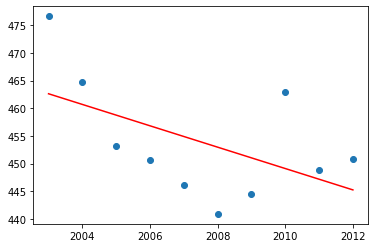

In [640]:
x = year
y = activity_hours_per_yr
x, y = np.array(x), np.array(y)

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)  

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [641]:
coefficient_of_determination = model.score(x,y) #R sqaure value 
coefficient_of_determination

0.2840816667147814

In [642]:
all_travel_emp_2003_2012_slope = model.coef_
all_travel_emp_2003_2012_slope

array([[-1.93023847]])

#### 2003-2019 Regression

In [643]:
year = np.array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]).reshape((-1, 1))
activity_hours_per_day = np.array([travel_2003_emp_avg_hpd, travel_2004_emp_avg_hpd, travel_2005_emp_avg_hpd, travel_2006_emp_avg_hpd,
                                   travel_2007_emp_avg_hpd, travel_2008_emp_avg_hpd, travel_2009_emp_avg_hpd, travel_2010_emp_avg_hpd,
                                   travel_2011_emp_avg_hpd, travel_2012_emp_avg_hpd, travel_2013_emp_avg_hpd, travel_2014_emp_avg_hpd,
                                   travel_2015_emp_avg_hpd, travel_2016_emp_avg_hpd, travel_2017_emp_avg_hpd, travel_2018_emp_avg_hpd,
                                   travel_2019_emp_avg_hpd]).reshape((-1, 1))
                                                             
activity_hours_per_yr = [i * 365 for i in activity_hours_per_day]
#activity_hours_per_yr

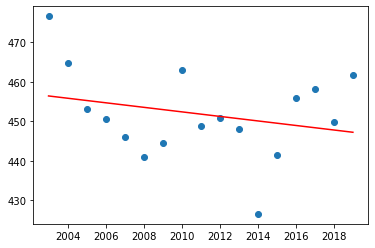

In [644]:
x = year
y = activity_hours_per_yr
x, y = np.array(x), np.array(y)

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)  

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [645]:
coefficient_of_determination = model.score(x,y) #R sqaure value 
coefficient_of_determination

0.06603839955597113

In [646]:
all_travel_emp_2003_2019_slope = model.coef_
all_travel_emp_2003_2019_slope

array([[-0.57508151]])

## Employed Population 

### Residential Location for Employed Population for all Activities

In [647]:
#multi_merged_employed

In [648]:
residenial = [-1,1,3]
atus_multi_res_emp = multi_merged_employed[multi_merged_employed["TEWHERE"].isin(residenial)]
#atus_multi_res_emp

In [649]:
atus_2003_all_res_emp = atus_multi_res_emp[atus_multi_res_emp["TUCASEID"].apply(str).str.startswith("2003")]
atus_2004_all_res_emp = atus_multi_res_emp[atus_multi_res_emp["TUCASEID"].apply(str).str.startswith("2004")]
atus_2005_all_res_emp = atus_multi_res_emp[atus_multi_res_emp["TUCASEID"].apply(str).str.startswith("2005")]
atus_2006_all_res_emp = atus_multi_res_emp[atus_multi_res_emp["TUCASEID"].apply(str).str.startswith("2006")]
atus_2007_all_res_emp = atus_multi_res_emp[atus_multi_res_emp["TUCASEID"].apply(str).str.startswith("2007")]
atus_2008_all_res_emp = atus_multi_res_emp[atus_multi_res_emp["TUCASEID"].apply(str).str.startswith("2008")]
atus_2009_all_res_emp = atus_multi_res_emp[atus_multi_res_emp["TUCASEID"].apply(str).str.startswith("2009")]
atus_2010_all_res_emp = atus_multi_res_emp[atus_multi_res_emp["TUCASEID"].apply(str).str.startswith("2010")]
atus_2011_all_res_emp = atus_multi_res_emp[atus_multi_res_emp["TUCASEID"].apply(str).str.startswith("2011")]
atus_2012_all_res_emp = atus_multi_res_emp[atus_multi_res_emp["TUCASEID"].apply(str).str.startswith("2012")]
atus_2013_all_res_emp = atus_multi_res_emp[atus_multi_res_emp["TUCASEID"].apply(str).str.startswith("2013")]
atus_2014_all_res_emp = atus_multi_res_emp[atus_multi_res_emp["TUCASEID"].apply(str).str.startswith("2014")]
atus_2015_all_res_emp = atus_multi_res_emp[atus_multi_res_emp["TUCASEID"].apply(str).str.startswith("2015")]
atus_2016_all_res_emp = atus_multi_res_emp[atus_multi_res_emp["TUCASEID"].apply(str).str.startswith("2016")]
atus_2017_all_res_emp = atus_multi_res_emp[atus_multi_res_emp["TUCASEID"].apply(str).str.startswith("2017")]
atus_2018_all_res_emp = atus_multi_res_emp[atus_multi_res_emp["TUCASEID"].apply(str).str.startswith("2018")]
atus_2019_all_res_emp = atus_multi_res_emp[atus_multi_res_emp["TUCASEID"].apply(str).str.startswith("2019")]

### 2003 All Residential Activities- Employed¶

In [650]:
atus_2003_all_res_emp = atus_2003_all_res_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2003_all_res_emp                                                                         

In [651]:
atus_2003_all_res_emp_merge = pd.merge(atus_2003_all_res_emp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2003_all_res_emp_merge

In [652]:
atus_2003_all_res_emp_merge["Multiplied Weight"] = atus_2003_all_res_emp_merge["TUACTDUR24"] * atus_2003_all_res_emp_merge["TUFNWGTP"]
#atus_2003_all_res_emp_merge

In [653]:
atus_2003_all_res_emp_multiplied_weight = atus_2003_all_res_emp_merge["Multiplied Weight"].sum()
atus_2003_all_res_emp_multiplied_weight

49942198160284.39

In [654]:
atus_2003_all_res_emp_hdp = atus_2003_all_res_emp_multiplied_weight / all_2003_emp_weight / 60 
atus_2003_all_res_emp_hdp

15.649821287615964

### 2004 All Residential Activities- Employed

In [655]:
atus_2004_all_res_emp = atus_2004_all_res_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2004_all_res_emp_merge = pd.merge(atus_2004_all_res_emp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2004_all_res_emp_merge["Multiplied Weight"] = atus_2004_all_res_emp_merge["TUACTDUR24"] * atus_2004_all_res_emp_merge["TUFNWGTP"]
#atus_2004_all_res_emp_merge                                                         

In [656]:
atus_2004_all_res_emp_multiplied_weight = atus_2004_all_res_emp_merge["Multiplied Weight"].sum()
atus_2004_all_res_emp_hdp = atus_2004_all_res_emp_multiplied_weight / all_2004_emp_weight / 60 
atus_2004_all_res_emp_hdp

15.641641276921264

### 2005 All Residential Activities- Employed

In [657]:
atus_2005_all_res_emp = atus_2005_all_res_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2005_all_res_emp_merge = pd.merge(atus_2005_all_res_emp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2005_all_res_emp_merge["Multiplied Weight"] = atus_2005_all_res_emp_merge["TUACTDUR24"] * atus_2005_all_res_emp_merge["TUFNWGTP"]
#atus_2005_all_res_emp_merge     

In [658]:
atus_2005_all_res_emp_multiplied_weight = atus_2005_all_res_emp_merge["Multiplied Weight"].sum()
atus_2005_all_res_emp_hdp = atus_2005_all_res_emp_multiplied_weight / all_2005_emp_weight / 60 
atus_2005_all_res_emp_hdp

15.762196371062803

### 2006 All Residential Activities- Employed

In [659]:
atus_2006_all_res_emp = atus_2006_all_res_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2006_all_res_emp_merge = pd.merge(atus_2006_all_res_emp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2006_all_res_emp_merge["Multiplied Weight"] = atus_2006_all_res_emp_merge["TUACTDUR24"] * atus_2006_all_res_emp_merge["TUFNWGTP"]
#atus_2006_all_res_emp_merge  

In [660]:
atus_2006_all_res_emp_multiplied_weight = atus_2006_all_res_emp_merge["Multiplied Weight"].sum()
atus_2006_all_res_emp_hdp = atus_2006_all_res_emp_multiplied_weight / all_2006_emp_weight / 60 
atus_2006_all_res_emp_hdp

15.587197063325505

### 2007 All Residential Activities- Employed

In [661]:
atus_2007_all_res_emp = atus_2007_all_res_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2007_all_res_emp_merge = pd.merge(atus_2007_all_res_emp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2007_all_res_emp_merge["Multiplied Weight"] = atus_2007_all_res_emp_merge["TUACTDUR24"] * atus_2007_all_res_emp_merge["TUFNWGTP"]
#atus_2007_all_res_emp_merge

In [662]:
atus_2007_all_res_emp_multiplied_weight = atus_2007_all_res_emp_merge["Multiplied Weight"].sum()
atus_2007_all_res_emp_hdp = atus_2007_all_res_emp_multiplied_weight / all_2007_emp_weight / 60 
atus_2007_all_res_emp_hdp

15.673922525003073

### 2008 All Residential Activities- Employed

In [663]:
atus_2008_all_res_emp = atus_2008_all_res_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2008_all_res_emp_merge = pd.merge(atus_2008_all_res_emp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2008_all_res_emp_merge["Multiplied Weight"] = atus_2008_all_res_emp_merge["TUACTDUR24"] * atus_2008_all_res_emp_merge["TUFNWGTP"]
#atus_2008_all_res_emp_merge

In [664]:
atus_2008_all_res_emp_multiplied_weight = atus_2008_all_res_emp_merge["Multiplied Weight"].sum()
atus_2008_all_res_emp_hdp = atus_2008_all_res_emp_multiplied_weight / all_2008_emp_weight / 60 
atus_2008_all_res_emp_hdp

15.851603139249415

### 2009 All Residential Activities- Employed

In [665]:
atus_2009_all_res_emp = atus_2009_all_res_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2009_all_res_emp_merge = pd.merge(atus_2009_all_res_emp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2009_all_res_emp_merge["Multiplied Weight"] = atus_2009_all_res_emp_merge["TUACTDUR24"] * atus_2009_all_res_emp_merge["TUFNWGTP"]
#atus_2009_all_res_emp_merge

In [666]:
atus_2009_all_res_emp_multiplied_weight = atus_2009_all_res_emp_merge["Multiplied Weight"].sum()
atus_2009_all_res_emp_hdp = atus_2009_all_res_emp_multiplied_weight / all_2009_emp_weight / 60 
atus_2009_all_res_emp_hdp

15.97076000084869

### 2010 All Residential Activities- Employed

In [667]:
atus_2010_all_res_emp = atus_2010_all_res_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2010_all_res_emp_merge = pd.merge(atus_2010_all_res_emp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2010_all_res_emp_merge["Multiplied Weight"] = atus_2010_all_res_emp_merge["TUACTDUR24"] * atus_2010_all_res_emp_merge["TUFNWGTP"]
#atus_2010_all_res_emp_merge

In [668]:
atus_2010_all_res_emp_multiplied_weight = atus_2010_all_res_emp_merge["Multiplied Weight"].sum()
atus_2010_all_res_emp_hdp = atus_2010_all_res_emp_multiplied_weight / all_2010_emp_weight / 60 
atus_2010_all_res_emp_hdp

15.895993031159824

### 2011 All Residential Activities- Employed

In [669]:
atus_2011_all_res_emp = atus_2011_all_res_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2011_all_res_emp_merge = pd.merge(atus_2011_all_res_emp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2011_all_res_emp_merge["Multiplied Weight"] = atus_2011_all_res_emp_merge["TUACTDUR24"] * atus_2011_all_res_emp_merge["TUFNWGTP"]
#atus_2011_all_res_emp_merge

In [670]:
atus_2011_all_res_emp_multiplied_weight = atus_2011_all_res_emp_merge["Multiplied Weight"].sum()
atus_2011_all_res_emp_hdp = atus_2011_all_res_emp_multiplied_weight / all_2011_emp_weight / 60 
atus_2011_all_res_emp_hdp

15.861696126623604

### 2012 All Residential Activities- Employed

In [671]:
atus_2012_all_res_emp = atus_2012_all_res_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2012_all_res_emp_merge = pd.merge(atus_2012_all_res_emp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2012_all_res_emp_merge["Multiplied Weight"] = atus_2012_all_res_emp_merge["TUACTDUR24"] * atus_2012_all_res_emp_merge["TUFNWGTP"]
#atus_2012_all_res_emp_merge

In [672]:
atus_2012_all_res_emp_multiplied_weight = atus_2012_all_res_emp_merge["Multiplied Weight"].sum()
atus_2012_all_res_emp_hdp = atus_2012_all_res_emp_multiplied_weight / all_2012_emp_weight / 60 
atus_2012_all_res_emp_hdp

15.973406878937983

### 2013 All Residential Activities- Employed

In [673]:
atus_2013_all_res_emp = atus_2013_all_res_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2013_all_res_emp_merge = pd.merge(atus_2013_all_res_emp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2013_all_res_emp_merge["Multiplied Weight"] = atus_2013_all_res_emp_merge["TUACTDUR24"] * atus_2013_all_res_emp_merge["TUFNWGTP"]
#atus_2013_all_res_emp_merge

In [674]:
atus_2013_all_res_emp_multiplied_weight = atus_2013_all_res_emp_merge["Multiplied Weight"].sum()
atus_2013_all_res_emp_hdp = atus_2013_all_res_emp_multiplied_weight / all_2013_emp_weight / 60 
atus_2013_all_res_emp_hdp

15.98869640390716

### 2014 All Residential Activities- Employed

In [675]:
atus_2014_all_res_emp = atus_2014_all_res_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2014_all_res_emp_merge = pd.merge(atus_2014_all_res_emp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2014_all_res_emp_merge["Multiplied Weight"] = atus_2014_all_res_emp_merge["TUACTDUR24"] * atus_2014_all_res_emp_merge["TUFNWGTP"]
#atus_2014_all_res_emp_merge

In [676]:
atus_2014_all_res_emp_multiplied_weight = atus_2014_all_res_emp_merge["Multiplied Weight"].sum()
atus_2014_all_res_emp_hdp = atus_2014_all_res_emp_multiplied_weight / all_2014_emp_weight / 60 
atus_2014_all_res_emp_hdp

15.932269442477272

### 2015 All Residential Activities- Employed

In [677]:
atus_2015_all_res_emp = atus_2015_all_res_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2015_all_res_emp_merge = pd.merge(atus_2015_all_res_emp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2015_all_res_emp_merge["Multiplied Weight"] = atus_2015_all_res_emp_merge["TUACTDUR24"] * atus_2015_all_res_emp_merge["TUFNWGTP"]
#atus_2015_all_res_emp_merge

In [678]:
atus_2015_all_res_emp_multiplied_weight = atus_2015_all_res_emp_merge["Multiplied Weight"].sum()
atus_2015_all_res_emp_hdp = atus_2015_all_res_emp_multiplied_weight / all_2015_emp_weight / 60 
atus_2015_all_res_emp_hdp

16.045970747702995

### 2016 All Residential Activities- Employed

In [679]:
atus_2016_all_res_emp = atus_2016_all_res_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2016_all_res_emp_merge = pd.merge(atus_2016_all_res_emp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2016_all_res_emp_merge["Multiplied Weight"] = atus_2016_all_res_emp_merge["TUACTDUR24"] * atus_2016_all_res_emp_merge["TUFNWGTP"]
#atus_2016_all_res_emp_merge

In [680]:
atus_2016_all_res_emp_multiplied_weight = atus_2016_all_res_emp_merge["Multiplied Weight"].sum()
atus_2016_all_res_emp_hdp = atus_2016_all_res_emp_multiplied_weight / all_2016_emp_weight / 60 
atus_2016_all_res_emp_hdp

15.943609716259544

### 2017 All Residential Activities- Employed

In [681]:
atus_2017_all_res_emp = atus_2017_all_res_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2017_all_res_emp_merge = pd.merge(atus_2017_all_res_emp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2017_all_res_emp_merge["Multiplied Weight"] = atus_2017_all_res_emp_merge["TUACTDUR24"] * atus_2017_all_res_emp_merge["TUFNWGTP"]
#atus_2017_all_res_emp_merge

In [682]:
atus_2017_all_res_emp_multiplied_weight = atus_2017_all_res_emp_merge["Multiplied Weight"].sum()
atus_2017_all_res_emp_hdp = atus_2017_all_res_emp_multiplied_weight / all_2017_emp_weight / 60 
atus_2017_all_res_emp_hdp

15.960102568984578

### 2018 All Residential Activities- Employed

In [683]:
atus_2018_all_res_emp = atus_2018_all_res_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2018_all_res_emp_merge = pd.merge(atus_2018_all_res_emp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2018_all_res_emp_merge["Multiplied Weight"] = atus_2018_all_res_emp_merge["TUACTDUR24"] * atus_2018_all_res_emp_merge["TUFNWGTP"]
#atus_2018_all_res_emp_merge

In [684]:
atus_2018_all_res_emp_multiplied_weight = atus_2018_all_res_emp_merge["Multiplied Weight"].sum()
atus_2018_all_res_emp_hdp = atus_2018_all_res_emp_multiplied_weight / all_2018_emp_weight / 60 
atus_2018_all_res_emp_hdp

16.015746257487205

### 2019 All Residential Activities- Employed

In [685]:
atus_2019_all_res_emp = atus_2019_all_res_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2019_all_res_emp_merge = pd.merge(atus_2019_all_res_emp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2019_all_res_emp_merge["Multiplied Weight"] = atus_2019_all_res_emp_merge["TUACTDUR24"] * atus_2019_all_res_emp_merge["TUFNWGTP"]
#atus_2019_all_res_emp_merge

In [686]:
atus_2019_all_res_emp_multiplied_weight = atus_2019_all_res_emp_merge["Multiplied Weight"].sum()
atus_2019_all_res_emp_hdp = atus_2019_all_res_emp_multiplied_weight / all_2019_emp_weight / 60 
atus_2019_all_res_emp_hdp

16.08055115636143

### All Residential Activities- Employed

#### 2003-2012 Regression All Residential Activities- Employed

In [687]:
year = np.array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012]).reshape((-1, 1))
activity_hours_per_day = np.array([atus_2003_all_res_emp_hdp, atus_2004_all_res_emp_hdp, atus_2005_all_res_emp_hdp,
                                   atus_2006_all_res_emp_hdp, atus_2007_all_res_emp_hdp, atus_2008_all_res_emp_hdp,
                                   atus_2009_all_res_emp_hdp, atus_2010_all_res_emp_hdp, atus_2011_all_res_emp_hdp,
                                   atus_2012_all_res_emp_hdp]).reshape((-1, 1))

activity_hours_per_yr = [i * 365 for i in activity_hours_per_day]
#activity_hours_per_yr

In [688]:
x = year
y = activity_hours_per_yr
x, y = np.array(x), np.array(y)

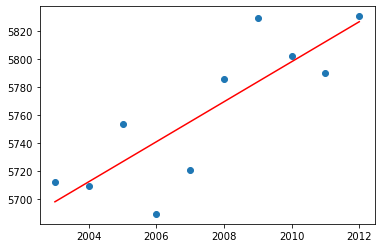

In [689]:
model = LinearRegression().fit(x, y)
y_pred = model.predict(x)  # make predictions

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()
#look to 

In [690]:
coefficient_of_determination = model.score(x,y) #R sqaure value 
coefficient_of_determination

0.6873301381266681

In [691]:
all_res_emp_2003_2012_slope = model.coef_
all_res_emp_2003_2012_slope

array([[14.2681973]])

#### 2003-2019 Regression All Residential Activities- Employed

In [692]:
year = np.array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]).reshape((-1, 1))
activity_hours_per_day = np.array([atus_2003_all_res_emp_hdp, atus_2004_all_res_emp_hdp, atus_2005_all_res_emp_hdp,
                                   atus_2006_all_res_emp_hdp, atus_2007_all_res_emp_hdp, atus_2008_all_res_emp_hdp,
                                   atus_2009_all_res_emp_hdp, atus_2010_all_res_emp_hdp, atus_2011_all_res_emp_hdp,
                                   atus_2012_all_res_emp_hdp, atus_2013_all_res_emp_hdp, atus_2014_all_res_emp_hdp,
                                   atus_2015_all_res_emp_hdp, atus_2016_all_res_emp_hdp, atus_2017_all_res_emp_hdp,
                                   atus_2018_all_res_emp_hdp, atus_2019_all_res_emp_hdp]).reshape((-1, 1))

activity_hours_per_yr = [i * 365 for i in activity_hours_per_day]
#activity_hours_per_yr

In [693]:
x = year
y = activity_hours_per_yr
x, y = np.array(x), np.array(y)

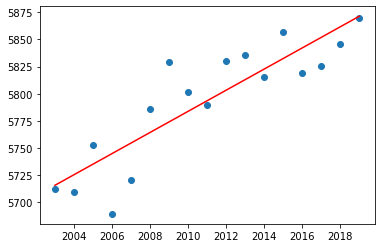

In [694]:
model = LinearRegression().fit(x, y)
y_pred = model.predict(x)  # make predictions

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()
#look to 

In [695]:
coefficient_of_determination = model.score(x,y) #R sqaure value 
coefficient_of_determination

0.7621163745690702

In [696]:
all_res_emp_2003_2019_slope = model.coef_
all_res_emp_2003_2019_slope

array([[9.73114398]])

### All Non-Residential Activities- Employed

In [723]:
atus_2003_non_res_emp

,TUCASEID,TUACTDUR24,TUCUMDUR,TRTIER1P,TRTIER2P,TRCODEP,TEWHERE,TELFS,TUFNWGTP,TUSTARTTIM,TUSTOPTIME,TUYEAR
0,20030100013280,60,60,13,1301,130124,9,2,8.155463e+06,04:00:00,05:00:00,2003
8,20030100013280,140,1470,13,1301,130124,9,2,8.155463e+06,01:40:00,04:30:00,2003
23,20030100013352,60,455,07,0701,070101,6,2,3.830527e+06,10:35:00,11:35:00,2003
54,20030100014165,435,540,05,0501,050101,2,1,3.068387e+06,05:45:00,13:00:00,2003
56,20030100014165,15,558,08,0802,080201,11,1,3.068387e+06,13:03:00,13:18:00,2003
...,...,...,...,...,...,...,...,...,...,...,...,...
412557,20031212033597,30,845,02,0206,020681,9,1,3.575899e+06,17:35:00,18:05:00,2003
412568,20031212033621,268,510,05,0501,050101,2,1,6.004256e+06,08:02:00,12:30:00,2003
412569,20031212033621,30,540,11,1101,110101,2,1,6.004256e+06,12:30:00,13:00:00,2003
412570,20031212033621,210,750,05,0501,050101,2,1,6.004256e+06,13:00:00,16:30:00,2003


In [698]:
atus_2003_all_act_non_res_emp = atus_2003_non_res_emp.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2003_all_act_non_res_emp 

In [699]:
atus_2003_all_act_non_res_emp_merge = pd.merge(atus_2003_all_act_non_res_emp, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2003_all_act_non_res_emp_merge

In [724]:
atus_2003_all_act_non_res_emp_merge["Multiplied Weight"]=atus_2003_all_act_non_res_emp_merge["TUACTDUR24"]*atus_2003_all_act_non_res_emp_merge["TUFNWGTP"]
atus_2003_all_act_non_res_emp_merge

,TUCASEID,TUACTDUR24,TUFNWGTP,Multiplied Weight
0,20030100013280,200,8.155463e+06,1.631093e+09
1,20030100013352,60,3.830527e+06,2.298316e+08
2,20030100014165,615,3.068387e+06,1.887058e+09
3,20030100014209,117,1.637826e+06,1.916257e+08
4,20030100014427,525,6.574427e+06,3.451574e+09
...,...,...,...,...
12057,20031212033589,175,2.434457e+06,4.260300e+08
12058,20031212033591,150,1.731625e+06,2.597438e+08
12059,20031212033597,458,3.575899e+06,1.637762e+09
12060,20031212033621,508,6.004256e+06,3.050162e+09


In [701]:
atus_2003_all_act_non_res_emp_multiplied_weight = atus_2003_all_act_non_res_emp_merge["Multiplied Weight"].sum()
atus_2003_all_act_non_res_emp_multiplied_weight

21998777295558.215

In [702]:
atus_2003_all_act_non_res_emp_multiplied_weight / all_2003_weight/ 60

6.893507813104821

In [703]:
a = atus_2003_non_res_emp.drop_duplicates(subset=["TUCASEID"])
a

,TUCASEID,TUACTDUR24,TUCUMDUR,TRTIER1P,TRTIER2P,TRCODEP,TEWHERE,TELFS,TUFNWGTP,TUSTARTTIM,TUSTOPTIME,TUYEAR
0,20030100013280,60,60,13,1301,130124,9,2,8.155463e+06,04:00:00,05:00:00,2003
23,20030100013352,60,455,07,0701,070101,6,2,3.830527e+06,10:35:00,11:35:00,2003
54,20030100014165,435,540,05,0501,050101,2,1,3.068387e+06,05:45:00,13:00:00,2003
110,20030100014209,2,184,03,0301,030112,11,1,1.637826e+06,07:02:00,07:04:00,2003
134,20030100014427,10,175,05,0501,050101,2,1,6.574427e+06,06:45:00,06:55:00,2003
...,...,...,...,...,...,...,...,...,...,...,...,...
412514,20031212033589,85,390,15,1502,150204,5,1,2.434457e+06,09:05:00,10:30:00,2003
412531,20031212033591,150,690,11,1101,110101,4,1,1.731625e+06,13:00:00,15:30:00,2003
412548,20031212033597,20,122,02,0206,020681,9,1,3.575899e+06,05:42:00,06:02:00,2003
412568,20031212033621,268,510,05,0501,050101,2,1,6.004256e+06,08:02:00,12:30:00,2003


In [704]:
b = a["TUFNWGTP"].sum()
b

49094311252.45511

In [727]:
c = atus_2003_all_act_non_res_emp_multiplied_weight / b / 60
c

7.468203115711666

In [728]:
a["TELFS"].unique()

array([2, 1])

In [729]:
b

49094311252.45511

In [730]:
all_2003_emp_weight

53187186872.01529

In [731]:
all_2003_non_res_emp_weight

53187186872.01529

## All Transportation

### Transportation - Employed 